## Processing with aboveground biomass data based on my fieldworks and other authors

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
input_data = './FULL_DB_BIOMASS_OTHER_ALL_AUTHORS.csv'
df = pd.read_csv(input_data)
df.head()

,Groups,Species,Species_ID,Origin,Origin_ID,SI,A_years,H_m,DBH_cm,N_trees,...,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,1,Pine,0,n,0.0,4,50,9.7,14.6,486.0,...,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,1,Pine,0,n,0.0,2,65,20.6,20.6,785.0,...,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,1,Pine,0,n,0.0,2,50,13.6,15.4,1745.0,...,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,1,Pine,0,n,0.0,1,60,23.3,22.2,665.0,...,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,1,Pine,0,n,0.0,3,65,15.6,16.4,955.0,...,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:

'Groups','Species_ID','Origin_ID','SI','A_years','H_m','DBH_cm','RS(P)',          'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha'
'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Species_ID','Origin_ID','H_m','DBH_cm', 'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha', 'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,0,0.0,9.7,14.6,9.7,43.9,18.9,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,0,0.0,20.6,20.6,32.2,254.0,113.1,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,0,0.0,13.6,15.4,35.2,190.0,87.8,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,0,0.0,23.3,22.2,29.6,277.7,106.5,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,0,0.0,15.6,16.4,20.4,142.5,67.0,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Species_ID         857 non-null    int64  
 1   Origin_ID          856 non-null    float64
 2   H_m                857 non-null    float64
 3   DBH_cm             856 non-null    float64
 4   BA_sq_m_ha         857 non-null    float64
 5   GS_cub_m           857 non-null    float64
 6   ALL_STEM_t_ha      855 non-null    float64
 7   Stem_wood_t_ha     747 non-null    float64
 8   Stem_bark_t_ha     747 non-null    float64
 9   Crown_t_ha         843 non-null    float64
 10  Foliage_t_ha       854 non-null    float64
 11  LN_GS_cub_m        857 non-null    float64
 12  LN_ALL_STEM_t_ha   855 non-null    float64
 13  LN_Stem_wood_t_ha  747 non-null    float64
 14  LN_Stem_bark_t_ha  747 non-null    float64
 15  LN_Crown_t_ha      843 non-null    float64
 16  LN_Foliage_t_ha    854 non

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species_ID"])["LN_Foliage_t_ha", "ALL_STEM_t_ha"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


LN_Foliage_t_ha                                                  \
                     count      mean       std   min    25%    50%     75%   
Species_ID                                                                   
0                    456.0  1.669211  0.508590 -1.61  1.420  1.780  2.0300   
1                      7.0  2.688571  0.372936  2.12  2.405  2.850  2.9800   
2                    120.0  0.701333  0.753190 -1.11  0.305  0.790  1.2650   
3                    115.0  0.901826  0.470374 -0.22  0.590  0.870  1.2300   
4                     66.0  1.210152  0.428082 -0.07  0.960  1.255  1.4700   
5                     90.0  1.310111  0.569079 -0.65  1.005  1.465  1.7375   

                 ALL_STEM_t_ha                                              \
             max         count        mean        std   min     25%    50%   
Species_ID                                                                   
0           2.69         457.0   97.049891  61.854506   1.8  47.500   92.7   
1           3.08           7.0  123.814286  61.879895  46.3  70.650  133.9   
2           2.78         120.0   74.495000  44.523333   5.1  37.275   68.1   
3           2.03         115.0  107.607826  55.589186  11.0  62.700  106.8   
4           2.15          66.0   84.946970  58.875162   8.2  40.750   61.2   
5           1.92          90.0  173.065556  99.100647   5.0  93.075  161.3   

                            
                75%    max  
Species_ID                  
0           135.900  310.7  
1           174.550  196.1  
2           103.075  193.5  
3           145.450  251.6  
4           125.000  245.4  
5           253.375  363.9

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
count,857.000000,856.000000,857.000000,856.000000,857.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000
mean,1.529755,0.279206,16.452275,17.132243,26.329988,229.013069,102.590877,92.779518,12.060107,13.821969,4.749356,5.166919,4.343766,4.246975,2.201232,2.318149,1.364906
std,1.823872,0.448871,7.039954,10.439115,10.629993,144.362106,68.758819,61.992238,9.595428,11.567546,2.826586,0.839680,0.869479,0.854856,0.806766,0.829446,0.672551
min,0.000000,0.000000,1.500000,1.100000,1.000000,2.400000,1.800000,2.000000,0.300000,0.500000,0.200000,0.880000,0.590000,0.690000,-1.200000,-0.690000,-1.610000
25%,0.000000,0.000000,11.200000,9.900000,19.000000,116.000000,47.500000,42.900000,5.950000,6.610000,2.600000,4.750000,3.860000,3.760000,1.780000,1.890000,0.960000
50%,0.000000,0.000000,16.100000,15.500000,26.800000,206.000000,93.500000,84.600000,9.300000,10.820000,4.300000,5.330000,4.540000,4.440000,2.230000,2.380000,1.460000
75%,3.000000,1.000000,21.200000,22.100000,34.500000,320.000000,140.500000,125.500000,15.300000,16.435000,6.367500,5.770000,4.950000,4.830000,2.730000,2.800000,1.850000
max,5.000000,1.000000,38.300000,94.000000,51.500000,735.000000,363.900000,315.200000,65.700000,69.120000,21.730000,6.600000,5.900000,5.750000,4.190000,4.240000,3.080000


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "LN_Foliage_t_ha"
indep_variables = ['Species_ID','Origin_ID','H_m','DBH_cm','BA_sq_m_ha']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     Species_ID  Origin_ID   H_m  DBH_cm  BA_sq_m_ha  GS_cub_m  ALL_STEM_t_ha  \
0             0        0.0   9.7    14.6         9.7      43.9           18.9   
1             0        0.0  20.6    20.6        32.2     254.0          113.1   
2             0        0.0  13.6    15.4        35.2     190.0           87.8   
3             0        0.0  23.3    22.2        29.6     277.7          106.5   
4             0        0.0  15.6    16.4        20.4     142.5           67.0   
..          ...        ...   ...     ...         ...       ...            ...   
852           3        0.0   7.8     4.4         9.2      39.8           17.8   
853           3        0.0  12.7     9.0        20.5     123.6           47.1   
854           3        0.0  12.2     8.1        20.3     141.7           51.9   
855           2        0.0  14.3    12.4        25.1     176.5          100.7   
856           2        0.0  21.1    25.6        21.0     191.6           99.9   

     Stem_wood_t_ha  Stem_b

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha
0,0,0.0,9.7,14.6,9.7
1,0,0.0,20.6,20.6,32.2
2,0,0.0,13.6,15.4,35.2
3,0,0.0,23.3,22.2,29.6
4,0,0.0,15.6,16.4,20.4


In [11]:
# Columns in "y" data collections
y.head()

,LN_Foliage_t_ha
0,0.47
1,1.41
2,1.41
3,1.69
4,1.22


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.5910314717914121, 0.6020810037520352, 0.5339138456141871]
    Mean: 0.576
    Std: 0.030

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.41048206 0.4585443  0.40681357]
    Mean: 0.425
    Std: 0.024

 --------------------
Mean absolute error (MAE): 

    Scores: [0.2968422764476977, 0.2974320621184613, 0.2650440149042021]
    Mean: 0.286
    Std: 0.015

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.6376420855691677                  # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.030051961019074536                # gamma
print('Gamma: ' + str(p2))

p3 = 0.2640899209518656                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 4            # max_depth
print('Max_depth: ' + str(p4))

p5 = 196         # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.7879876518750124                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.6376420855691677
Gamma: 0.030051961019074536
Learning_rate: 0.2640899209518656
Max_depth: 4
N_estimators: 196
Subsample: 0.7879876518750124


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    exp_R_square = r2_score(exp_y_test, exp_y_pred)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:0.86606	validation_1-rmse:0.87657
[1]	validation_0-rmse:0.71616	validation_1-rmse:0.73000
[2]	validation_0-rmse:0.62927	validation_1-rmse:0.64359
[3]	validation_0-rmse:0.54940	validation_1-rmse:0.57124
[4]	validation_0-rmse:0.48911	validation_1-rmse:0.51699
[5]	validation_0-rmse:0.44719	validation_1-rmse:0.48874
[6]	validation_0-rmse:0.42364	validation_1-rmse:0.47226
[7]	validation_0-rmse:0.40187	validation_1-rmse:0.46242
[8]	validation_0-rmse:0.39153	validation_1-rmse:0.46117
[9]	validation_0-rmse:0.38068	validation_1-rmse:0.45398
[10]	validation_0-rmse:0.37498	validation_1-rmse:0.45626


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:0.36608	validation_1-rmse:0.45238
[12]	validation_0-rmse:0.35801	validation_1-rmse:0.44300
[13]	validation_0-rmse:0.34974	validation_1-rmse:0.44139
[14]	validation_0-rmse:0.34584	validation_1-rmse:0.43880
[15]	validation_0-rmse:0.34047	validation_1-rmse:0.43900
[16]	validation_0-rmse:0.33478	validation_1-rmse:0.43450
[17]	validation_0-rmse:0.33253	validation_1-rmse:0.43288
[18]	validation_0-rmse:0.32690	validation_1-rmse:0.42510
[19]	validation_0-rmse:0.32218	validation_1-rmse:0.43033
[20]	validation_0-rmse:0.31891	validation_1-rmse:0.42923
[21]	validation_0-rmse:0.31669	validation_1-rmse:0.42698
[22]	validation_0-rmse:0.31307	validation_1-rmse:0.42525
[23]	validation_0-rmse:0.31006	validation_1-rmse:0.42424
[24]	validation_0-rmse:0.30640	validation_1-rmse:0.41908
[25]	validation_0-rmse:0.30441	validation_1-rmse:0.41627
[26]	validation_0-rmse:0.30145	validation_1-rmse:0.41583
[27]	validation_0-rmse:0.29854	validation_1-rmse:0.42242
[28]	validation_0-rmse:0.29640	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86204	validation_1-rmse:0.89787
[1]	validation_0-rmse:0.71169	validation_1-rmse:0.75617
[2]	validation_0-rmse:0.61806	validation_1-rmse:0.67350
[3]	validation_0-rmse:0.54333	validation_1-rmse:0.61312
[4]	validation_0-rmse:0.48120	validation_1-rmse:0.55661
[5]	validation_0-rmse:0.43879	validation_1-rmse:0.51955
[6]	validation_0-rmse:0.41555	validation_1-rmse:0.49729


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.39446	validation_1-rmse:0.49459
[8]	validation_0-rmse:0.38356	validation_1-rmse:0.49140
[9]	validation_0-rmse:0.37408	validation_1-rmse:0.49225
[10]	validation_0-rmse:0.36943	validation_1-rmse:0.48944
[11]	validation_0-rmse:0.36190	validation_1-rmse:0.48250
[12]	validation_0-rmse:0.35820	validation_1-rmse:0.47970
[13]	validation_0-rmse:0.35267	validation_1-rmse:0.47577
[14]	validation_0-rmse:0.34735	validation_1-rmse:0.47692
[15]	validation_0-rmse:0.34555	validation_1-rmse:0.47903
[16]	validation_0-rmse:0.34153	validation_1-rmse:0.47939
[17]	validation_0-rmse:0.33721	validation_1-rmse:0.47399
[18]	validation_0-rmse:0.33538	validation_1-rmse:0.47548
[19]	validation_0-rmse:0.32969	validation_1-rmse:0.47573
[20]	validation_0-rmse:0.32556	validation_1-rmse:0.47669
[21]	validation_0-rmse:0.31917	validation_1-rmse:0.47534
[22]	validation_0-rmse:0.31620	validation_1-rmse:0.47795
[23]	validation_0-rmse:0.31403	validation_1-rmse:0.48162
[24]	validation_0-rmse:0.31165	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.85811	validation_1-rmse:0.89842
[1]	validation_0-rmse:0.71100	validation_1-rmse:0.75475
[2]	validation_0-rmse:0.62294	validation_1-rmse:0.66691
[3]	validation_0-rmse:0.54651	validation_1-rmse:0.60280
[4]	validation_0-rmse:0.48457	validation_1-rmse:0.53738
[5]	validation_0-rmse:0.44507	validation_1-rmse:0.50129
[6]	validation_0-rmse:0.42059	validation_1-rmse:0.47590
[7]	validation_0-rmse:0.39915	validation_1-rmse:0.46042
[8]	validation_0-rmse:0.38983	validation_1-rmse:0.45692
[9]	validation_0-rmse:0.37569	validation_1-rmse:0.45499
[10]	validation_0-rmse:0.37068	validation_1-rmse:0.45064
[11]	validation_0-rmse:0.36335	validation_1-rmse:0.44770
[12]	validation_0-rmse:0.35687	validation_1-rmse:0.43984
[13]	validation_0-rmse:0.34925	validation_1-rmse:0.43344
[14]	validation_0-rmse:0.34477	validation_1-rmse:0.43131
[15]	validation_0-rmse:0.33939	validation_1-rmse:0.42854
[16]	validation_0-rmse:0.33452	validation_1-rmse:0.42966
[17]	validation_0-rmse:0.33014	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86575	validation_1-rmse:0.87962
[1]	validation_0-rmse:0.71834	validation_1-rmse:0.72309
[2]	validation_0-rmse:0.63082	validation_1-rmse:0.64718
[3]	validation_0-rmse:0.55552	validation_1-rmse:0.56913
[4]	validation_0-rmse:0.49525	validation_1-rmse:0.51990
[5]	validation_0-rmse:0.45370	validation_1-rmse:0.48863
[6]	validation_0-rmse:0.42631	validation_1-rmse:0.46955
[7]	validation_0-rmse:0.40708	validation_1-rmse:0.45780
[8]	validation_0-rmse:0.39722	validation_1-rmse:0.45818
[9]	validation_0-rmse:0.38457	validation_1-rmse:0.44788
[10]	validation_0-rmse:0.37957	validation_1-rmse:0.44689


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:0.37128	validation_1-rmse:0.44672
[12]	validation_0-rmse:0.36370	validation_1-rmse:0.44667
[13]	validation_0-rmse:0.35674	validation_1-rmse:0.44307
[14]	validation_0-rmse:0.35189	validation_1-rmse:0.44232
[15]	validation_0-rmse:0.34757	validation_1-rmse:0.44116
[16]	validation_0-rmse:0.34505	validation_1-rmse:0.43851
[17]	validation_0-rmse:0.34043	validation_1-rmse:0.43898
[18]	validation_0-rmse:0.33585	validation_1-rmse:0.43755
[19]	validation_0-rmse:0.33029	validation_1-rmse:0.43974
[20]	validation_0-rmse:0.32763	validation_1-rmse:0.43608
[21]	validation_0-rmse:0.32437	validation_1-rmse:0.43546
[22]	validation_0-rmse:0.31815	validation_1-rmse:0.43156
[23]	validation_0-rmse:0.31699	validation_1-rmse:0.43056
[24]	validation_0-rmse:0.31420	validation_1-rmse:0.42815
[25]	validation_0-rmse:0.30921	validation_1-rmse:0.42714
[26]	validation_0-rmse:0.30684	validation_1-rmse:0.42594
[27]	validation_0-rmse:0.30270	validation_1-rmse:0.42568
[28]	validation_0-rmse:0.29940	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86868	validation_1-rmse:0.86401
[1]	validation_0-rmse:0.72035	validation_1-rmse:0.72503
[2]	validation_0-rmse:0.63286	validation_1-rmse:0.64006
[3]	validation_0-rmse:0.55277	validation_1-rmse:0.57858
[4]	validation_0-rmse:0.49408	validation_1-rmse:0.52114
[5]	validation_0-rmse:0.45588	validation_1-rmse:0.48617


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.42958	validation_1-rmse:0.45883
[7]	validation_0-rmse:0.41351	validation_1-rmse:0.44893
[8]	validation_0-rmse:0.40175	validation_1-rmse:0.44368
[9]	validation_0-rmse:0.38956	validation_1-rmse:0.43885
[10]	validation_0-rmse:0.38219	validation_1-rmse:0.43469
[11]	validation_0-rmse:0.37248	validation_1-rmse:0.42310
[12]	validation_0-rmse:0.36416	validation_1-rmse:0.41600
[13]	validation_0-rmse:0.35985	validation_1-rmse:0.41349
[14]	validation_0-rmse:0.35347	validation_1-rmse:0.41396
[15]	validation_0-rmse:0.34731	validation_1-rmse:0.40977
[16]	validation_0-rmse:0.34338	validation_1-rmse:0.40989
[17]	validation_0-rmse:0.34003	validation_1-rmse:0.40607
[18]	validation_0-rmse:0.33375	validation_1-rmse:0.40447
[19]	validation_0-rmse:0.32949	validation_1-rmse:0.40461
[20]	validation_0-rmse:0.32448	validation_1-rmse:0.40276
[21]	validation_0-rmse:0.31881	validation_1-rmse:0.40651
[22]	validation_0-rmse:0.31351	validation_1-rmse:0.40507
[23]	validation_0-rmse:0.31177	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85969	validation_1-rmse:0.87837
[1]	validation_0-rmse:0.70860	validation_1-rmse:0.74093
[2]	validation_0-rmse:0.61830	validation_1-rmse:0.67060
[3]	validation_0-rmse:0.54352	validation_1-rmse:0.61087
[4]	validation_0-rmse:0.48073	validation_1-rmse:0.56618
[5]	validation_0-rmse:0.43702	validation_1-rmse:0.53156
[6]	validation_0-rmse:0.41355	validation_1-rmse:0.51791
[7]	validation_0-rmse:0.39515	validation_1-rmse:0.51400
[8]	validation_0-rmse:0.38639	validation_1-rmse:0.51221
[9]	validation_0-rmse:0.37796	validation_1-rmse:0.50889
[10]	validation_0-rmse:0.37210	validation_1-rmse:0.51281


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:0.36270	validation_1-rmse:0.50510
[12]	validation_0-rmse:0.35418	validation_1-rmse:0.50179
[13]	validation_0-rmse:0.35030	validation_1-rmse:0.50052
[14]	validation_0-rmse:0.34540	validation_1-rmse:0.49933
[15]	validation_0-rmse:0.34189	validation_1-rmse:0.49742
[16]	validation_0-rmse:0.33899	validation_1-rmse:0.49663
[17]	validation_0-rmse:0.33515	validation_1-rmse:0.49450
[18]	validation_0-rmse:0.33136	validation_1-rmse:0.49076
[19]	validation_0-rmse:0.32570	validation_1-rmse:0.48680
[20]	validation_0-rmse:0.32344	validation_1-rmse:0.49126
[21]	validation_0-rmse:0.31660	validation_1-rmse:0.48791
[22]	validation_0-rmse:0.31219	validation_1-rmse:0.48849
[23]	validation_0-rmse:0.30976	validation_1-rmse:0.48904
[24]	validation_0-rmse:0.30732	validation_1-rmse:0.49057
[25]	validation_0-rmse:0.30558	validation_1-rmse:0.48939
[26]	validation_0-rmse:0.30067	validation_1-rmse:0.48868
[27]	validation_0-rmse:0.29789	validation_1-rmse:0.48694
[28]	validation_0-rmse:0.29515	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87127	validation_1-rmse:0.84437
[1]	validation_0-rmse:0.72416	validation_1-rmse:0.69750
[2]	validation_0-rmse:0.63131	validation_1-rmse:0.61946
[3]	validation_0-rmse:0.55379	validation_1-rmse:0.55503
[4]	validation_0-rmse:0.49751	validation_1-rmse:0.50271
[5]	validation_0-rmse:0.45705	validation_1-rmse:0.46844


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.43245	validation_1-rmse:0.44804
[7]	validation_0-rmse:0.41213	validation_1-rmse:0.43889
[8]	validation_0-rmse:0.40315	validation_1-rmse:0.43861
[9]	validation_0-rmse:0.39049	validation_1-rmse:0.43795
[10]	validation_0-rmse:0.38435	validation_1-rmse:0.43782
[11]	validation_0-rmse:0.37388	validation_1-rmse:0.43897
[12]	validation_0-rmse:0.36426	validation_1-rmse:0.43980
[13]	validation_0-rmse:0.36043	validation_1-rmse:0.43760
[14]	validation_0-rmse:0.35562	validation_1-rmse:0.43580
[15]	validation_0-rmse:0.35111	validation_1-rmse:0.43726
[16]	validation_0-rmse:0.34368	validation_1-rmse:0.43739
[17]	validation_0-rmse:0.34059	validation_1-rmse:0.43642
[18]	validation_0-rmse:0.33478	validation_1-rmse:0.43737
[19]	validation_0-rmse:0.33082	validation_1-rmse:0.44066
[20]	validation_0-rmse:0.32651	validation_1-rmse:0.43774
[21]	validation_0-rmse:0.32344	validation_1-rmse:0.43779
[22]	validation_0-rmse:0.31882	validation_1-rmse:0.43519
[23]	validation_0-rmse:0.31572	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86872	validation_1-rmse:0.83052
[1]	validation_0-rmse:0.71966	validation_1-rmse:0.69560
[2]	validation_0-rmse:0.62466	validation_1-rmse:0.61546
[3]	validation_0-rmse:0.54500	validation_1-rmse:0.55510


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.48881	validation_1-rmse:0.51577
[5]	validation_0-rmse:0.44765	validation_1-rmse:0.48323
[6]	validation_0-rmse:0.42342	validation_1-rmse:0.47061
[7]	validation_0-rmse:0.40723	validation_1-rmse:0.46250
[8]	validation_0-rmse:0.39928	validation_1-rmse:0.46289
[9]	validation_0-rmse:0.38714	validation_1-rmse:0.45759
[10]	validation_0-rmse:0.38186	validation_1-rmse:0.45749
[11]	validation_0-rmse:0.37289	validation_1-rmse:0.45367
[12]	validation_0-rmse:0.36678	validation_1-rmse:0.44901
[13]	validation_0-rmse:0.36153	validation_1-rmse:0.44131
[14]	validation_0-rmse:0.35659	validation_1-rmse:0.44202
[15]	validation_0-rmse:0.35329	validation_1-rmse:0.43641
[16]	validation_0-rmse:0.34678	validation_1-rmse:0.43655
[17]	validation_0-rmse:0.34216	validation_1-rmse:0.43505
[18]	validation_0-rmse:0.33634	validation_1-rmse:0.43837
[19]	validation_0-rmse:0.32786	validation_1-rmse:0.43487
[20]	validation_0-rmse:0.32482	validation_1-rmse:0.43375
[21]	validation_0-rmse:0.31966	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86690	validation_1-rmse:0.87097


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71865	validation_1-rmse:0.71819
[2]	validation_0-rmse:0.63328	validation_1-rmse:0.63606
[3]	validation_0-rmse:0.55262	validation_1-rmse:0.55784
[4]	validation_0-rmse:0.49331	validation_1-rmse:0.51041
[5]	validation_0-rmse:0.45030	validation_1-rmse:0.48138
[6]	validation_0-rmse:0.42628	validation_1-rmse:0.46430
[7]	validation_0-rmse:0.40567	validation_1-rmse:0.44814
[8]	validation_0-rmse:0.39813	validation_1-rmse:0.44454
[9]	validation_0-rmse:0.38311	validation_1-rmse:0.43882
[10]	validation_0-rmse:0.37588	validation_1-rmse:0.43743
[11]	validation_0-rmse:0.36536	validation_1-rmse:0.43845
[12]	validation_0-rmse:0.35611	validation_1-rmse:0.43554
[13]	validation_0-rmse:0.34924	validation_1-rmse:0.43307
[14]	validation_0-rmse:0.34241	validation_1-rmse:0.43026
[15]	validation_0-rmse:0.33812	validation_1-rmse:0.42537
[16]	validation_0-rmse:0.33262	validation_1-rmse:0.42145
[17]	validation_0-rmse:0.32974	validation_1-rmse:0.41890
[18]	validation_0-rmse:0.32119	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86583	validation_1-rmse:0.86653
[1]	validation_0-rmse:0.71440	validation_1-rmse:0.74354


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.61896	validation_1-rmse:0.66985
[3]	validation_0-rmse:0.54024	validation_1-rmse:0.60862
[4]	validation_0-rmse:0.47860	validation_1-rmse:0.56642
[5]	validation_0-rmse:0.43744	validation_1-rmse:0.53963
[6]	validation_0-rmse:0.41054	validation_1-rmse:0.52650
[7]	validation_0-rmse:0.39114	validation_1-rmse:0.51032
[8]	validation_0-rmse:0.38142	validation_1-rmse:0.50432
[9]	validation_0-rmse:0.36844	validation_1-rmse:0.49862
[10]	validation_0-rmse:0.36367	validation_1-rmse:0.50210
[11]	validation_0-rmse:0.35407	validation_1-rmse:0.50222
[12]	validation_0-rmse:0.34844	validation_1-rmse:0.50149
[13]	validation_0-rmse:0.34417	validation_1-rmse:0.49835
[14]	validation_0-rmse:0.33890	validation_1-rmse:0.49826
[15]	validation_0-rmse:0.33349	validation_1-rmse:0.49500
[16]	validation_0-rmse:0.32824	validation_1-rmse:0.49578
[17]	validation_0-rmse:0.32428	validation_1-rmse:0.49332
[18]	validation_0-rmse:0.31678	validation_1-rmse:0.48749
[19]	validation_0-rmse:0.31405	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86664	validation_1-rmse:0.87907
[1]	validation_0-rmse:0.71724	validation_1-rmse:0.73958
[2]	validation_0-rmse:0.62450	validation_1-rmse:0.65201
[3]	validation_0-rmse:0.54545	validation_1-rmse:0.58485


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.49013	validation_1-rmse:0.52160
[5]	validation_0-rmse:0.45075	validation_1-rmse:0.48148
[6]	validation_0-rmse:0.42976	validation_1-rmse:0.45764
[7]	validation_0-rmse:0.40651	validation_1-rmse:0.44399
[8]	validation_0-rmse:0.39806	validation_1-rmse:0.44181
[9]	validation_0-rmse:0.38658	validation_1-rmse:0.43586
[10]	validation_0-rmse:0.38043	validation_1-rmse:0.43540
[11]	validation_0-rmse:0.37248	validation_1-rmse:0.43061
[12]	validation_0-rmse:0.36748	validation_1-rmse:0.42828
[13]	validation_0-rmse:0.36183	validation_1-rmse:0.42300
[14]	validation_0-rmse:0.35454	validation_1-rmse:0.41928
[15]	validation_0-rmse:0.34932	validation_1-rmse:0.41427
[16]	validation_0-rmse:0.34552	validation_1-rmse:0.41133
[17]	validation_0-rmse:0.34242	validation_1-rmse:0.40953
[18]	validation_0-rmse:0.33697	validation_1-rmse:0.40812
[19]	validation_0-rmse:0.33045	validation_1-rmse:0.41096
[20]	validation_0-rmse:0.32697	validation_1-rmse:0.41187
[21]	validation_0-rmse:0.32173	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85800	validation_1-rmse:0.88117
[1]	validation_0-rmse:0.71354	validation_1-rmse:0.72665
[2]	validation_0-rmse:0.62376	validation_1-rmse:0.63292
[3]	validation_0-rmse:0.55141	validation_1-rmse:0.55663
[4]	validation_0-rmse:0.49388	validation_1-rmse:0.49431
[5]	validation_0-rmse:0.45236	validation_1-rmse:0.45966
[6]	validation_0-rmse:0.42867	validation_1-rmse:0.43927


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.40823	validation_1-rmse:0.42617
[8]	validation_0-rmse:0.39948	validation_1-rmse:0.42392
[9]	validation_0-rmse:0.38832	validation_1-rmse:0.41749
[10]	validation_0-rmse:0.38404	validation_1-rmse:0.41767
[11]	validation_0-rmse:0.37445	validation_1-rmse:0.41127
[12]	validation_0-rmse:0.36681	validation_1-rmse:0.40793
[13]	validation_0-rmse:0.36047	validation_1-rmse:0.40949
[14]	validation_0-rmse:0.35491	validation_1-rmse:0.40819
[15]	validation_0-rmse:0.34936	validation_1-rmse:0.40695
[16]	validation_0-rmse:0.34434	validation_1-rmse:0.40177
[17]	validation_0-rmse:0.34198	validation_1-rmse:0.40140
[18]	validation_0-rmse:0.33332	validation_1-rmse:0.40073
[19]	validation_0-rmse:0.32446	validation_1-rmse:0.40084
[20]	validation_0-rmse:0.31960	validation_1-rmse:0.39709
[21]	validation_0-rmse:0.31529	validation_1-rmse:0.39397
[22]	validation_0-rmse:0.31199	validation_1-rmse:0.39447
[23]	validation_0-rmse:0.30896	validation_1-rmse:0.39416
[24]	validation_0-rmse:0.30616	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86015	validation_1-rmse:0.89213
[1]	validation_0-rmse:0.71373	validation_1-rmse:0.74495
[2]	validation_0-rmse:0.62361	validation_1-rmse:0.66241
[3]	validation_0-rmse:0.54539	validation_1-rmse:0.59066


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.48433	validation_1-rmse:0.53534
[5]	validation_0-rmse:0.44490	validation_1-rmse:0.50102
[6]	validation_0-rmse:0.42056	validation_1-rmse:0.48745
[7]	validation_0-rmse:0.40425	validation_1-rmse:0.47401
[8]	validation_0-rmse:0.39511	validation_1-rmse:0.47414
[9]	validation_0-rmse:0.38191	validation_1-rmse:0.47185
[10]	validation_0-rmse:0.37146	validation_1-rmse:0.46785
[11]	validation_0-rmse:0.35953	validation_1-rmse:0.46349
[12]	validation_0-rmse:0.35249	validation_1-rmse:0.46425
[13]	validation_0-rmse:0.34526	validation_1-rmse:0.46621
[14]	validation_0-rmse:0.33933	validation_1-rmse:0.46709
[15]	validation_0-rmse:0.33518	validation_1-rmse:0.46628
[16]	validation_0-rmse:0.32816	validation_1-rmse:0.46077
[17]	validation_0-rmse:0.32473	validation_1-rmse:0.46091
[18]	validation_0-rmse:0.31963	validation_1-rmse:0.46270
[19]	validation_0-rmse:0.31518	validation_1-rmse:0.46086
[20]	validation_0-rmse:0.31146	validation_1-rmse:0.46055
[21]	validation_0-rmse:0.30678	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85851	validation_1-rmse:0.89316
[1]	validation_0-rmse:0.70690	validation_1-rmse:0.75934
[2]	validation_0-rmse:0.62066	validation_1-rmse:0.67865
[3]	validation_0-rmse:0.54363	validation_1-rmse:0.61132


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.48557	validation_1-rmse:0.56381
[5]	validation_0-rmse:0.44720	validation_1-rmse:0.53276
[6]	validation_0-rmse:0.42157	validation_1-rmse:0.51405
[7]	validation_0-rmse:0.40047	validation_1-rmse:0.50130
[8]	validation_0-rmse:0.39177	validation_1-rmse:0.49898
[9]	validation_0-rmse:0.37947	validation_1-rmse:0.48628
[10]	validation_0-rmse:0.37096	validation_1-rmse:0.48034
[11]	validation_0-rmse:0.36088	validation_1-rmse:0.47638
[12]	validation_0-rmse:0.35199	validation_1-rmse:0.47264
[13]	validation_0-rmse:0.34588	validation_1-rmse:0.46630
[14]	validation_0-rmse:0.34374	validation_1-rmse:0.46826
[15]	validation_0-rmse:0.33919	validation_1-rmse:0.46896
[16]	validation_0-rmse:0.33356	validation_1-rmse:0.46591
[17]	validation_0-rmse:0.32974	validation_1-rmse:0.46075
[18]	validation_0-rmse:0.32624	validation_1-rmse:0.45950
[19]	validation_0-rmse:0.32190	validation_1-rmse:0.45709
[20]	validation_0-rmse:0.31844	validation_1-rmse:0.46185
[21]	validation_0-rmse:0.31521	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87041	validation_1-rmse:0.86000


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71780	validation_1-rmse:0.72110
[2]	validation_0-rmse:0.62646	validation_1-rmse:0.64262
[3]	validation_0-rmse:0.54972	validation_1-rmse:0.57960
[4]	validation_0-rmse:0.49045	validation_1-rmse:0.52809
[5]	validation_0-rmse:0.45059	validation_1-rmse:0.49218
[6]	validation_0-rmse:0.42624	validation_1-rmse:0.47553
[7]	validation_0-rmse:0.40577	validation_1-rmse:0.46028
[8]	validation_0-rmse:0.39660	validation_1-rmse:0.46068
[9]	validation_0-rmse:0.38263	validation_1-rmse:0.45490
[10]	validation_0-rmse:0.37573	validation_1-rmse:0.45226
[11]	validation_0-rmse:0.36691	validation_1-rmse:0.44547
[12]	validation_0-rmse:0.36036	validation_1-rmse:0.43838
[13]	validation_0-rmse:0.35510	validation_1-rmse:0.43704
[14]	validation_0-rmse:0.34737	validation_1-rmse:0.44226
[15]	validation_0-rmse:0.34344	validation_1-rmse:0.43690
[16]	validation_0-rmse:0.33876	validation_1-rmse:0.43781
[17]	validation_0-rmse:0.33057	validation_1-rmse:0.43677
[18]	validation_0-rmse:0.32424	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.85975	validation_1-rmse:0.90311
[1]	validation_0-rmse:0.71225	validation_1-rmse:0.75840
[2]	validation_0-rmse:0.62121	validation_1-rmse:0.67279
[3]	validation_0-rmse:0.54393	validation_1-rmse:0.60746
[4]	validation_0-rmse:0.48359	validation_1-rmse:0.55892
[5]	validation_0-rmse:0.44158	validation_1-rmse:0.52952
[6]	validation_0-rmse:0.41475	validation_1-rmse:0.51263
[7]	validation_0-rmse:0.39303	validation_1-rmse:0.49755
[8]	validation_0-rmse:0.38370	validation_1-rmse:0.49290


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.37236	validation_1-rmse:0.48713
[10]	validation_0-rmse:0.36540	validation_1-rmse:0.48090
[11]	validation_0-rmse:0.35647	validation_1-rmse:0.47800
[12]	validation_0-rmse:0.35179	validation_1-rmse:0.47767
[13]	validation_0-rmse:0.34528	validation_1-rmse:0.47622
[14]	validation_0-rmse:0.34041	validation_1-rmse:0.47283
[15]	validation_0-rmse:0.33645	validation_1-rmse:0.46916
[16]	validation_0-rmse:0.32909	validation_1-rmse:0.46778
[17]	validation_0-rmse:0.32818	validation_1-rmse:0.46780
[18]	validation_0-rmse:0.32076	validation_1-rmse:0.46547
[19]	validation_0-rmse:0.31474	validation_1-rmse:0.46181
[20]	validation_0-rmse:0.31061	validation_1-rmse:0.46255
[21]	validation_0-rmse:0.30782	validation_1-rmse:0.45770
[22]	validation_0-rmse:0.30408	validation_1-rmse:0.45874
[23]	validation_0-rmse:0.30166	validation_1-rmse:0.45839
[24]	validation_0-rmse:0.29861	validation_1-rmse:0.45388
[25]	validation_0-rmse:0.29533	validation_1-rmse:0.45454
[26]	validation_0-rmse:0.29140	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87238	validation_1-rmse:0.86081


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71913	validation_1-rmse:0.72506
[2]	validation_0-rmse:0.62630	validation_1-rmse:0.64633
[3]	validation_0-rmse:0.54970	validation_1-rmse:0.57907
[4]	validation_0-rmse:0.49115	validation_1-rmse:0.53655
[5]	validation_0-rmse:0.45061	validation_1-rmse:0.50896
[6]	validation_0-rmse:0.42514	validation_1-rmse:0.49203
[7]	validation_0-rmse:0.40548	validation_1-rmse:0.47387
[8]	validation_0-rmse:0.39542	validation_1-rmse:0.46531
[9]	validation_0-rmse:0.38674	validation_1-rmse:0.46014
[10]	validation_0-rmse:0.38231	validation_1-rmse:0.45838
[11]	validation_0-rmse:0.37414	validation_1-rmse:0.45803
[12]	validation_0-rmse:0.36698	validation_1-rmse:0.45306
[13]	validation_0-rmse:0.36225	validation_1-rmse:0.45057
[14]	validation_0-rmse:0.35697	validation_1-rmse:0.45111
[15]	validation_0-rmse:0.35306	validation_1-rmse:0.44744
[16]	validation_0-rmse:0.35077	validation_1-rmse:0.44680
[17]	validation_0-rmse:0.34834	validation_1-rmse:0.44368
[18]	validation_0-rmse:0.34173	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87241	validation_1-rmse:0.83292
[1]	validation_0-rmse:0.71925	validation_1-rmse:0.70580
[2]	validation_0-rmse:0.62508	validation_1-rmse:0.62506
[3]	validation_0-rmse:0.55036	validation_1-rmse:0.56327
[4]	validation_0-rmse:0.48948	validation_1-rmse:0.51553


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.44746	validation_1-rmse:0.48100
[6]	validation_0-rmse:0.42257	validation_1-rmse:0.46470
[7]	validation_0-rmse:0.40378	validation_1-rmse:0.45660
[8]	validation_0-rmse:0.39154	validation_1-rmse:0.45426
[9]	validation_0-rmse:0.38184	validation_1-rmse:0.44619
[10]	validation_0-rmse:0.37392	validation_1-rmse:0.44513
[11]	validation_0-rmse:0.36456	validation_1-rmse:0.44609
[12]	validation_0-rmse:0.35890	validation_1-rmse:0.44329
[13]	validation_0-rmse:0.35669	validation_1-rmse:0.44307
[14]	validation_0-rmse:0.35370	validation_1-rmse:0.44323
[15]	validation_0-rmse:0.34589	validation_1-rmse:0.44242
[16]	validation_0-rmse:0.34369	validation_1-rmse:0.44099
[17]	validation_0-rmse:0.34217	validation_1-rmse:0.43956
[18]	validation_0-rmse:0.33868	validation_1-rmse:0.43618
[19]	validation_0-rmse:0.33746	validation_1-rmse:0.43462
[20]	validation_0-rmse:0.33268	validation_1-rmse:0.43428
[21]	validation_0-rmse:0.32514	validation_1-rmse:0.43349
[22]	validation_0-rmse:0.32191	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.85842	validation_1-rmse:0.91278
[1]	validation_0-rmse:0.71551	validation_1-rmse:0.76831
[2]	validation_0-rmse:0.62726	validation_1-rmse:0.67723
[3]	validation_0-rmse:0.55710	validation_1-rmse:0.60108
[4]	validation_0-rmse:0.50220	validation_1-rmse:0.54819
[5]	validation_0-rmse:0.46061	validation_1-rmse:0.51031
[6]	validation_0-rmse:0.43563	validation_1-rmse:0.48517
[7]	validation_0-rmse:0.41685	validation_1-rmse:0.46759
[8]	validation_0-rmse:0.40806	validation_1-rmse:0.46246
[9]	validation_0-rmse:0.39604	validation_1-rmse:0.45148
[10]	validation_0-rmse:0.39045	validation_1-rmse:0.45063
[11]	validation_0-rmse:0.38124	validation_1-rmse:0.44585
[12]	validation_0-rmse:0.37652	validation_1-rmse:0.44253
[13]	validation_0-rmse:0.36993	validation_1-rmse:0.43694
[14]	validation_0-rmse:0.36613	validation_1-rmse:0.43477
[15]	validation_0-rmse:0.35982	validation_1-rmse:0.42953
[16]	validation_0-rmse:0.35448	validation_1-rmse:0.42313
[17]	validation_0-rmse:0.35014	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86366	validation_1-rmse:0.87773
[1]	validation_0-rmse:0.71745	validation_1-rmse:0.72903


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62700	validation_1-rmse:0.63665
[3]	validation_0-rmse:0.55048	validation_1-rmse:0.56072
[4]	validation_0-rmse:0.49413	validation_1-rmse:0.50145
[5]	validation_0-rmse:0.45497	validation_1-rmse:0.46283
[6]	validation_0-rmse:0.43419	validation_1-rmse:0.44233
[7]	validation_0-rmse:0.41201	validation_1-rmse:0.42530
[8]	validation_0-rmse:0.40589	validation_1-rmse:0.42072
[9]	validation_0-rmse:0.39276	validation_1-rmse:0.41299
[10]	validation_0-rmse:0.38796	validation_1-rmse:0.41310
[11]	validation_0-rmse:0.37804	validation_1-rmse:0.40084
[12]	validation_0-rmse:0.36875	validation_1-rmse:0.39566
[13]	validation_0-rmse:0.36151	validation_1-rmse:0.39713
[14]	validation_0-rmse:0.35839	validation_1-rmse:0.39450
[15]	validation_0-rmse:0.35187	validation_1-rmse:0.39381
[16]	validation_0-rmse:0.34621	validation_1-rmse:0.39332
[17]	validation_0-rmse:0.34162	validation_1-rmse:0.38964
[18]	validation_0-rmse:0.33850	validation_1-rmse:0.38811
[19]	validation_0-rmse:0.33656	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86969	validation_1-rmse:0.87174
[1]	validation_0-rmse:0.71863	validation_1-rmse:0.71835
[2]	validation_0-rmse:0.62623	validation_1-rmse:0.63905
[3]	validation_0-rmse:0.55187	validation_1-rmse:0.57118
[4]	validation_0-rmse:0.49261	validation_1-rmse:0.52056
[5]	validation_0-rmse:0.45234	validation_1-rmse:0.48868
[6]	validation_0-rmse:0.43023	validation_1-rmse:0.47072
[7]	validation_0-rmse:0.40591	validation_1-rmse:0.45646
[8]	validation_0-rmse:0.39353	validation_1-rmse:0.45467


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.38094	validation_1-rmse:0.44641
[10]	validation_0-rmse:0.37707	validation_1-rmse:0.44692
[11]	validation_0-rmse:0.36883	validation_1-rmse:0.44163
[12]	validation_0-rmse:0.36021	validation_1-rmse:0.44721
[13]	validation_0-rmse:0.35335	validation_1-rmse:0.44839
[14]	validation_0-rmse:0.34881	validation_1-rmse:0.44644
[15]	validation_0-rmse:0.34294	validation_1-rmse:0.45328
[16]	validation_0-rmse:0.34141	validation_1-rmse:0.45348
[17]	validation_0-rmse:0.34058	validation_1-rmse:0.45378
[18]	validation_0-rmse:0.33493	validation_1-rmse:0.45423
[19]	validation_0-rmse:0.32947	validation_1-rmse:0.45452
[20]	validation_0-rmse:0.32559	validation_1-rmse:0.45284
[21]	validation_0-rmse:0.32154	validation_1-rmse:0.45201
[22]	validation_0-rmse:0.31627	validation_1-rmse:0.45343
[23]	validation_0-rmse:0.31293	validation_1-rmse:0.45293
[24]	validation_0-rmse:0.30691	validation_1-rmse:0.45014
[25]	validation_0-rmse:0.30355	validation_1-rmse:0.45113
[26]	validation_0-rmse:0.29984	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87147	validation_1-rmse:0.86102
[1]	validation_0-rmse:0.72528	validation_1-rmse:0.71556
[2]	validation_0-rmse:0.63551	validation_1-rmse:0.63053
[3]	validation_0-rmse:0.55442	validation_1-rmse:0.54678
[4]	validation_0-rmse:0.49355	validation_1-rmse:0.49413
[5]	validation_0-rmse:0.45362	validation_1-rmse:0.45718
[6]	validation_0-rmse:0.42656	validation_1-rmse:0.44091
[7]	validation_0-rmse:0.40474	validation_1-rmse:0.42159


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.39743	validation_1-rmse:0.41695
[9]	validation_0-rmse:0.38303	validation_1-rmse:0.41100
[10]	validation_0-rmse:0.37616	validation_1-rmse:0.41090
[11]	validation_0-rmse:0.36617	validation_1-rmse:0.40610
[12]	validation_0-rmse:0.35786	validation_1-rmse:0.41021
[13]	validation_0-rmse:0.35260	validation_1-rmse:0.41353
[14]	validation_0-rmse:0.34641	validation_1-rmse:0.41332
[15]	validation_0-rmse:0.33950	validation_1-rmse:0.41341
[16]	validation_0-rmse:0.33570	validation_1-rmse:0.41211
[17]	validation_0-rmse:0.33201	validation_1-rmse:0.40951
[18]	validation_0-rmse:0.32833	validation_1-rmse:0.40985
[19]	validation_0-rmse:0.32327	validation_1-rmse:0.40979
[20]	validation_0-rmse:0.32147	validation_1-rmse:0.41052
[21]	validation_0-rmse:0.31702	validation_1-rmse:0.40724
[22]	validation_0-rmse:0.31432	validation_1-rmse:0.40676
[23]	validation_0-rmse:0.30932	validation_1-rmse:0.40622
[24]	validation_0-rmse:0.30633	validation_1-rmse:0.40547
[25]	validation_0-rmse:0.30139	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86120	validation_1-rmse:0.90032
[1]	validation_0-rmse:0.70817	validation_1-rmse:0.77482
[2]	validation_0-rmse:0.61650	validation_1-rmse:0.70001
[3]	validation_0-rmse:0.54024	validation_1-rmse:0.63794
[4]	validation_0-rmse:0.47783	validation_1-rmse:0.58954
[5]	validation_0-rmse:0.43469	validation_1-rmse:0.55730
[6]	validation_0-rmse:0.40817	validation_1-rmse:0.53270


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.38800	validation_1-rmse:0.52159
[8]	validation_0-rmse:0.38082	validation_1-rmse:0.51597
[9]	validation_0-rmse:0.36945	validation_1-rmse:0.51336
[10]	validation_0-rmse:0.36293	validation_1-rmse:0.51041
[11]	validation_0-rmse:0.35596	validation_1-rmse:0.51066
[12]	validation_0-rmse:0.34999	validation_1-rmse:0.50442
[13]	validation_0-rmse:0.34437	validation_1-rmse:0.49751
[14]	validation_0-rmse:0.33988	validation_1-rmse:0.49469
[15]	validation_0-rmse:0.33267	validation_1-rmse:0.49484
[16]	validation_0-rmse:0.32839	validation_1-rmse:0.48947
[17]	validation_0-rmse:0.32543	validation_1-rmse:0.48911
[18]	validation_0-rmse:0.32086	validation_1-rmse:0.48652
[19]	validation_0-rmse:0.31521	validation_1-rmse:0.48868
[20]	validation_0-rmse:0.31163	validation_1-rmse:0.48942
[21]	validation_0-rmse:0.30798	validation_1-rmse:0.48785
[22]	validation_0-rmse:0.30526	validation_1-rmse:0.48818
[23]	validation_0-rmse:0.30133	validation_1-rmse:0.48370
[24]	validation_0-rmse:0.29798	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87727	validation_1-rmse:0.82209
[1]	validation_0-rmse:0.73033	validation_1-rmse:0.68448
[2]	validation_0-rmse:0.63935	validation_1-rmse:0.60707
[3]	validation_0-rmse:0.55901	validation_1-rmse:0.54213
[4]	validation_0-rmse:0.49954	validation_1-rmse:0.49022


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.45731	validation_1-rmse:0.45860
[6]	validation_0-rmse:0.42644	validation_1-rmse:0.44481
[7]	validation_0-rmse:0.40375	validation_1-rmse:0.43610
[8]	validation_0-rmse:0.39575	validation_1-rmse:0.43631
[9]	validation_0-rmse:0.37905	validation_1-rmse:0.43277
[10]	validation_0-rmse:0.37250	validation_1-rmse:0.43182
[11]	validation_0-rmse:0.36552	validation_1-rmse:0.43124
[12]	validation_0-rmse:0.35760	validation_1-rmse:0.42440
[13]	validation_0-rmse:0.35057	validation_1-rmse:0.41934
[14]	validation_0-rmse:0.34783	validation_1-rmse:0.41940
[15]	validation_0-rmse:0.34111	validation_1-rmse:0.42075
[16]	validation_0-rmse:0.33407	validation_1-rmse:0.42104
[17]	validation_0-rmse:0.33260	validation_1-rmse:0.42107
[18]	validation_0-rmse:0.32830	validation_1-rmse:0.41956
[19]	validation_0-rmse:0.32271	validation_1-rmse:0.41614
[20]	validation_0-rmse:0.32078	validation_1-rmse:0.41594
[21]	validation_0-rmse:0.31777	validation_1-rmse:0.41234
[22]	validation_0-rmse:0.31364	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85581	validation_1-rmse:0.90757
[1]	validation_0-rmse:0.71227	validation_1-rmse:0.76323
[2]	validation_0-rmse:0.61915	validation_1-rmse:0.67850
[3]	validation_0-rmse:0.53997	validation_1-rmse:0.60788
[4]	validation_0-rmse:0.47798	validation_1-rmse:0.55810
[5]	validation_0-rmse:0.43806	validation_1-rmse:0.52690
[6]	validation_0-rmse:0.41331	validation_1-rmse:0.50985
[7]	validation_0-rmse:0.39403	validation_1-rmse:0.49806
[8]	validation_0-rmse:0.38224	validation_1-rmse:0.49500


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.37038	validation_1-rmse:0.48810
[10]	validation_0-rmse:0.36591	validation_1-rmse:0.48647
[11]	validation_0-rmse:0.35590	validation_1-rmse:0.48658
[12]	validation_0-rmse:0.34904	validation_1-rmse:0.48655
[13]	validation_0-rmse:0.34406	validation_1-rmse:0.48641
[14]	validation_0-rmse:0.33956	validation_1-rmse:0.48481
[15]	validation_0-rmse:0.33578	validation_1-rmse:0.48822
[16]	validation_0-rmse:0.32618	validation_1-rmse:0.49409
[17]	validation_0-rmse:0.32374	validation_1-rmse:0.49428
[18]	validation_0-rmse:0.31892	validation_1-rmse:0.49230
[19]	validation_0-rmse:0.31444	validation_1-rmse:0.49638
[20]	validation_0-rmse:0.30735	validation_1-rmse:0.49508
[21]	validation_0-rmse:0.30183	validation_1-rmse:0.49903
[22]	validation_0-rmse:0.29870	validation_1-rmse:0.49891
[23]	validation_0-rmse:0.29720	validation_1-rmse:0.49921
[24]	validation_0-rmse:0.29223	validation_1-rmse:0.49876
[25]	validation_0-rmse:0.29031	validation_1-rmse:0.49980
[26]	validation_0-rmse:0.28832	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86642	validation_1-rmse:0.87248
[1]	validation_0-rmse:0.71307	validation_1-rmse:0.73299
[2]	validation_0-rmse:0.61989	validation_1-rmse:0.65359
[3]	validation_0-rmse:0.54210	validation_1-rmse:0.59217
[4]	validation_0-rmse:0.48165	validation_1-rmse:0.54961
[5]	validation_0-rmse:0.44050	validation_1-rmse:0.52220
[6]	validation_0-rmse:0.40959	validation_1-rmse:0.50826
[7]	validation_0-rmse:0.39142	validation_1-rmse:0.49819


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.38183	validation_1-rmse:0.49668
[9]	validation_0-rmse:0.36930	validation_1-rmse:0.49251
[10]	validation_0-rmse:0.36488	validation_1-rmse:0.49109
[11]	validation_0-rmse:0.35543	validation_1-rmse:0.48436
[12]	validation_0-rmse:0.34770	validation_1-rmse:0.47486
[13]	validation_0-rmse:0.34025	validation_1-rmse:0.47533
[14]	validation_0-rmse:0.33423	validation_1-rmse:0.47475
[15]	validation_0-rmse:0.33030	validation_1-rmse:0.47547
[16]	validation_0-rmse:0.32594	validation_1-rmse:0.47596
[17]	validation_0-rmse:0.32398	validation_1-rmse:0.47433
[18]	validation_0-rmse:0.31868	validation_1-rmse:0.47217
[19]	validation_0-rmse:0.31221	validation_1-rmse:0.47015
[20]	validation_0-rmse:0.31001	validation_1-rmse:0.46873
[21]	validation_0-rmse:0.30565	validation_1-rmse:0.46936
[22]	validation_0-rmse:0.30245	validation_1-rmse:0.46899
[23]	validation_0-rmse:0.29906	validation_1-rmse:0.46492
[24]	validation_0-rmse:0.29477	validation_1-rmse:0.46340
[25]	validation_0-rmse:0.29145	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87190	validation_1-rmse:0.81611


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.72184	validation_1-rmse:0.65665
[2]	validation_0-rmse:0.63449	validation_1-rmse:0.57912
[3]	validation_0-rmse:0.55923	validation_1-rmse:0.50467
[4]	validation_0-rmse:0.50170	validation_1-rmse:0.45596
[5]	validation_0-rmse:0.45885	validation_1-rmse:0.42524
[6]	validation_0-rmse:0.43283	validation_1-rmse:0.41220
[7]	validation_0-rmse:0.41357	validation_1-rmse:0.40010
[8]	validation_0-rmse:0.40363	validation_1-rmse:0.39577
[9]	validation_0-rmse:0.39267	validation_1-rmse:0.39120
[10]	validation_0-rmse:0.38854	validation_1-rmse:0.39022
[11]	validation_0-rmse:0.37952	validation_1-rmse:0.38669
[12]	validation_0-rmse:0.37159	validation_1-rmse:0.38506
[13]	validation_0-rmse:0.36487	validation_1-rmse:0.38335
[14]	validation_0-rmse:0.35945	validation_1-rmse:0.38561
[15]	validation_0-rmse:0.35593	validation_1-rmse:0.38520
[16]	validation_0-rmse:0.34853	validation_1-rmse:0.38528
[17]	validation_0-rmse:0.34287	validation_1-rmse:0.38181
[18]	validation_0-rmse:0.33658	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85830	validation_1-rmse:0.91430
[1]	validation_0-rmse:0.70850	validation_1-rmse:0.76714
[2]	validation_0-rmse:0.61622	validation_1-rmse:0.68397
[3]	validation_0-rmse:0.53643	validation_1-rmse:0.62080


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.47818	validation_1-rmse:0.56612
[5]	validation_0-rmse:0.43732	validation_1-rmse:0.53106
[6]	validation_0-rmse:0.41603	validation_1-rmse:0.51134
[7]	validation_0-rmse:0.39869	validation_1-rmse:0.50375
[8]	validation_0-rmse:0.38629	validation_1-rmse:0.50094
[9]	validation_0-rmse:0.37652	validation_1-rmse:0.49567
[10]	validation_0-rmse:0.36798	validation_1-rmse:0.49430
[11]	validation_0-rmse:0.36125	validation_1-rmse:0.48981
[12]	validation_0-rmse:0.35305	validation_1-rmse:0.48519
[13]	validation_0-rmse:0.34753	validation_1-rmse:0.48303
[14]	validation_0-rmse:0.34290	validation_1-rmse:0.48181
[15]	validation_0-rmse:0.33631	validation_1-rmse:0.48093
[16]	validation_0-rmse:0.33102	validation_1-rmse:0.48115
[17]	validation_0-rmse:0.32928	validation_1-rmse:0.48211
[18]	validation_0-rmse:0.32261	validation_1-rmse:0.48070
[19]	validation_0-rmse:0.31910	validation_1-rmse:0.47708
[20]	validation_0-rmse:0.31443	validation_1-rmse:0.48061
[21]	validation_0-rmse:0.30829	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85626	validation_1-rmse:0.93520
[1]	validation_0-rmse:0.71193	validation_1-rmse:0.77867
[2]	validation_0-rmse:0.62910	validation_1-rmse:0.68710
[3]	validation_0-rmse:0.55460	validation_1-rmse:0.60196


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.49471	validation_1-rmse:0.54136
[5]	validation_0-rmse:0.45361	validation_1-rmse:0.49307
[6]	validation_0-rmse:0.42761	validation_1-rmse:0.46287
[7]	validation_0-rmse:0.41066	validation_1-rmse:0.44714
[8]	validation_0-rmse:0.40249	validation_1-rmse:0.44195
[9]	validation_0-rmse:0.38422	validation_1-rmse:0.43106
[10]	validation_0-rmse:0.37999	validation_1-rmse:0.42451
[11]	validation_0-rmse:0.37413	validation_1-rmse:0.41916
[12]	validation_0-rmse:0.36624	validation_1-rmse:0.41295
[13]	validation_0-rmse:0.35808	validation_1-rmse:0.40713
[14]	validation_0-rmse:0.35290	validation_1-rmse:0.40340
[15]	validation_0-rmse:0.34781	validation_1-rmse:0.39589
[16]	validation_0-rmse:0.33857	validation_1-rmse:0.39184
[17]	validation_0-rmse:0.33472	validation_1-rmse:0.39215
[18]	validation_0-rmse:0.33085	validation_1-rmse:0.39356
[19]	validation_0-rmse:0.32731	validation_1-rmse:0.38990
[20]	validation_0-rmse:0.32172	validation_1-rmse:0.39013
[21]	validation_0-rmse:0.31770	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86525	validation_1-rmse:0.87717
[1]	validation_0-rmse:0.71305	validation_1-rmse:0.75547
[2]	validation_0-rmse:0.62061	validation_1-rmse:0.67394
[3]	validation_0-rmse:0.53875	validation_1-rmse:0.60614


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.48189	validation_1-rmse:0.54935
[5]	validation_0-rmse:0.44106	validation_1-rmse:0.51517
[6]	validation_0-rmse:0.41655	validation_1-rmse:0.49527
[7]	validation_0-rmse:0.39725	validation_1-rmse:0.48087
[8]	validation_0-rmse:0.38980	validation_1-rmse:0.47860
[9]	validation_0-rmse:0.37721	validation_1-rmse:0.47165
[10]	validation_0-rmse:0.37039	validation_1-rmse:0.47057
[11]	validation_0-rmse:0.35834	validation_1-rmse:0.46431
[12]	validation_0-rmse:0.35178	validation_1-rmse:0.46437
[13]	validation_0-rmse:0.34753	validation_1-rmse:0.46415
[14]	validation_0-rmse:0.34188	validation_1-rmse:0.46441
[15]	validation_0-rmse:0.33638	validation_1-rmse:0.45746
[16]	validation_0-rmse:0.33295	validation_1-rmse:0.45445
[17]	validation_0-rmse:0.33072	validation_1-rmse:0.45501
[18]	validation_0-rmse:0.32437	validation_1-rmse:0.45745
[19]	validation_0-rmse:0.32065	validation_1-rmse:0.45424
[20]	validation_0-rmse:0.31638	validation_1-rmse:0.45136
[21]	validation_0-rmse:0.31356	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.87108	validation_1-rmse:0.86294
[1]	validation_0-rmse:0.72006	validation_1-rmse:0.72399
[2]	validation_0-rmse:0.62490	validation_1-rmse:0.64610
[3]	validation_0-rmse:0.55142	validation_1-rmse:0.58694
[4]	validation_0-rmse:0.48931	validation_1-rmse:0.54865
[5]	validation_0-rmse:0.44606	validation_1-rmse:0.51845
[6]	validation_0-rmse:0.42180	validation_1-rmse:0.50212
[7]	validation_0-rmse:0.40309	validation_1-rmse:0.49594
[8]	validation_0-rmse:0.39395	validation_1-rmse:0.49284


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.38146	validation_1-rmse:0.48804
[10]	validation_0-rmse:0.37577	validation_1-rmse:0.48669
[11]	validation_0-rmse:0.36694	validation_1-rmse:0.48480
[12]	validation_0-rmse:0.35764	validation_1-rmse:0.48704
[13]	validation_0-rmse:0.35573	validation_1-rmse:0.48622
[14]	validation_0-rmse:0.35049	validation_1-rmse:0.48610
[15]	validation_0-rmse:0.34507	validation_1-rmse:0.48408
[16]	validation_0-rmse:0.34182	validation_1-rmse:0.48379
[17]	validation_0-rmse:0.33797	validation_1-rmse:0.48406
[18]	validation_0-rmse:0.33279	validation_1-rmse:0.48075
[19]	validation_0-rmse:0.32979	validation_1-rmse:0.47888
[20]	validation_0-rmse:0.32356	validation_1-rmse:0.47758
[21]	validation_0-rmse:0.32127	validation_1-rmse:0.47334
[22]	validation_0-rmse:0.31663	validation_1-rmse:0.47475
[23]	validation_0-rmse:0.31385	validation_1-rmse:0.47490
[24]	validation_0-rmse:0.31137	validation_1-rmse:0.47424
[25]	validation_0-rmse:0.30465	validation_1-rmse:0.46694
[26]	validation_0-rmse:0.30178	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86953	validation_1-rmse:0.87753
[1]	validation_0-rmse:0.72152	validation_1-rmse:0.73223


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.63356	validation_1-rmse:0.64079
[3]	validation_0-rmse:0.55618	validation_1-rmse:0.56349
[4]	validation_0-rmse:0.49618	validation_1-rmse:0.50314
[5]	validation_0-rmse:0.45481	validation_1-rmse:0.46272
[6]	validation_0-rmse:0.42937	validation_1-rmse:0.44385
[7]	validation_0-rmse:0.40818	validation_1-rmse:0.42971
[8]	validation_0-rmse:0.39695	validation_1-rmse:0.42453
[9]	validation_0-rmse:0.38644	validation_1-rmse:0.41830
[10]	validation_0-rmse:0.38123	validation_1-rmse:0.41841
[11]	validation_0-rmse:0.37241	validation_1-rmse:0.41340
[12]	validation_0-rmse:0.36419	validation_1-rmse:0.41065
[13]	validation_0-rmse:0.35620	validation_1-rmse:0.41037
[14]	validation_0-rmse:0.35259	validation_1-rmse:0.40909
[15]	validation_0-rmse:0.34981	validation_1-rmse:0.40945
[16]	validation_0-rmse:0.34710	validation_1-rmse:0.41194
[17]	validation_0-rmse:0.34442	validation_1-rmse:0.41108
[18]	validation_0-rmse:0.33733	validation_1-rmse:0.40961
[19]	validation_0-rmse:0.33234	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86224	validation_1-rmse:0.89785
[1]	validation_0-rmse:0.71029	validation_1-rmse:0.76506
[2]	validation_0-rmse:0.61533	validation_1-rmse:0.68847
[3]	validation_0-rmse:0.54067	validation_1-rmse:0.63317
[4]	validation_0-rmse:0.48229	validation_1-rmse:0.58203
[5]	validation_0-rmse:0.44051	validation_1-rmse:0.56193
[6]	validation_0-rmse:0.41600	validation_1-rmse:0.54431
[7]	validation_0-rmse:0.39349	validation_1-rmse:0.53217


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.38273	validation_1-rmse:0.53104
[9]	validation_0-rmse:0.37385	validation_1-rmse:0.52870
[10]	validation_0-rmse:0.36729	validation_1-rmse:0.52768
[11]	validation_0-rmse:0.36089	validation_1-rmse:0.52385
[12]	validation_0-rmse:0.35395	validation_1-rmse:0.51846
[13]	validation_0-rmse:0.34746	validation_1-rmse:0.51466
[14]	validation_0-rmse:0.34197	validation_1-rmse:0.51442
[15]	validation_0-rmse:0.33697	validation_1-rmse:0.51407
[16]	validation_0-rmse:0.33212	validation_1-rmse:0.51005
[17]	validation_0-rmse:0.32927	validation_1-rmse:0.50780
[18]	validation_0-rmse:0.32500	validation_1-rmse:0.50373
[19]	validation_0-rmse:0.32231	validation_1-rmse:0.49979
[20]	validation_0-rmse:0.31911	validation_1-rmse:0.49632
[21]	validation_0-rmse:0.31594	validation_1-rmse:0.49439
[22]	validation_0-rmse:0.31157	validation_1-rmse:0.49395
[23]	validation_0-rmse:0.30788	validation_1-rmse:0.49251
[24]	validation_0-rmse:0.30638	validation_1-rmse:0.49022
[25]	validation_0-rmse:0.30539	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.87307	validation_1-rmse:0.85725
[1]	validation_0-rmse:0.71808	validation_1-rmse:0.72725
[2]	validation_0-rmse:0.62938	validation_1-rmse:0.65523
[3]	validation_0-rmse:0.55172	validation_1-rmse:0.59610
[4]	validation_0-rmse:0.49409	validation_1-rmse:0.54443
[5]	validation_0-rmse:0.45465	validation_1-rmse:0.50880
[6]	validation_0-rmse:0.43282	validation_1-rmse:0.48705
[7]	validation_0-rmse:0.41599	validation_1-rmse:0.47189
[8]	validation_0-rmse:0.40785	validation_1-rmse:0.46896
[9]	validation_0-rmse:0.39080	validation_1-rmse:0.46110
[10]	validation_0-rmse:0.38308	validation_1-rmse:0.45826
[11]	validation_0-rmse:0.37298	validation_1-rmse:0.44802
[12]	validation_0-rmse:0.36434	validation_1-rmse:0.44323
[13]	validation_0-rmse:0.35948	validation_1-rmse:0.43882
[14]	validation_0-rmse:0.35488	validation_1-rmse:0.43765
[15]	validation_0-rmse:0.35128	validation_1-rmse:0.43847
[16]	validation_0-rmse:0.34626	validation_1-rmse:0.43971
[17]	validation_0-rmse:0.34227	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87230	validation_1-rmse:0.85974
[1]	validation_0-rmse:0.71989	validation_1-rmse:0.70186


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.63501	validation_1-rmse:0.61945
[3]	validation_0-rmse:0.55621	validation_1-rmse:0.54897
[4]	validation_0-rmse:0.49336	validation_1-rmse:0.49308
[5]	validation_0-rmse:0.45029	validation_1-rmse:0.45343
[6]	validation_0-rmse:0.42268	validation_1-rmse:0.43057
[7]	validation_0-rmse:0.40342	validation_1-rmse:0.42008
[8]	validation_0-rmse:0.39399	validation_1-rmse:0.41504
[9]	validation_0-rmse:0.38171	validation_1-rmse:0.41048
[10]	validation_0-rmse:0.37458	validation_1-rmse:0.40864
[11]	validation_0-rmse:0.36540	validation_1-rmse:0.40448
[12]	validation_0-rmse:0.35811	validation_1-rmse:0.40353
[13]	validation_0-rmse:0.35178	validation_1-rmse:0.39509
[14]	validation_0-rmse:0.34525	validation_1-rmse:0.39389
[15]	validation_0-rmse:0.34237	validation_1-rmse:0.39255
[16]	validation_0-rmse:0.33533	validation_1-rmse:0.39361
[17]	validation_0-rmse:0.33307	validation_1-rmse:0.39344
[18]	validation_0-rmse:0.32881	validation_1-rmse:0.39574
[19]	validation_0-rmse:0.32460	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87597	validation_1-rmse:0.83597
[1]	validation_0-rmse:0.72120	validation_1-rmse:0.70043
[2]	validation_0-rmse:0.62583	validation_1-rmse:0.62340
[3]	validation_0-rmse:0.54570	validation_1-rmse:0.56922
[4]	validation_0-rmse:0.48382	validation_1-rmse:0.52187
[5]	validation_0-rmse:0.44153	validation_1-rmse:0.49509


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.41535	validation_1-rmse:0.47664
[7]	validation_0-rmse:0.39422	validation_1-rmse:0.46662
[8]	validation_0-rmse:0.38641	validation_1-rmse:0.46406
[9]	validation_0-rmse:0.37291	validation_1-rmse:0.46760
[10]	validation_0-rmse:0.36458	validation_1-rmse:0.46772
[11]	validation_0-rmse:0.35725	validation_1-rmse:0.46596
[12]	validation_0-rmse:0.35097	validation_1-rmse:0.46638
[13]	validation_0-rmse:0.34448	validation_1-rmse:0.46535
[14]	validation_0-rmse:0.33742	validation_1-rmse:0.46349
[15]	validation_0-rmse:0.33350	validation_1-rmse:0.45852
[16]	validation_0-rmse:0.32967	validation_1-rmse:0.46029
[17]	validation_0-rmse:0.32528	validation_1-rmse:0.45751
[18]	validation_0-rmse:0.31996	validation_1-rmse:0.45533
[19]	validation_0-rmse:0.31645	validation_1-rmse:0.45328
[20]	validation_0-rmse:0.31045	validation_1-rmse:0.44906
[21]	validation_0-rmse:0.30447	validation_1-rmse:0.44863
[22]	validation_0-rmse:0.30258	validation_1-rmse:0.44961
[23]	validation_0-rmse:0.29946	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86552	validation_1-rmse:0.88339


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71815	validation_1-rmse:0.74697
[2]	validation_0-rmse:0.62963	validation_1-rmse:0.66330
[3]	validation_0-rmse:0.54866	validation_1-rmse:0.59046
[4]	validation_0-rmse:0.48926	validation_1-rmse:0.52945
[5]	validation_0-rmse:0.44713	validation_1-rmse:0.49099
[6]	validation_0-rmse:0.42046	validation_1-rmse:0.47197
[7]	validation_0-rmse:0.39969	validation_1-rmse:0.45933
[8]	validation_0-rmse:0.39096	validation_1-rmse:0.45275
[9]	validation_0-rmse:0.38054	validation_1-rmse:0.45204
[10]	validation_0-rmse:0.37295	validation_1-rmse:0.44871
[11]	validation_0-rmse:0.36589	validation_1-rmse:0.44123
[12]	validation_0-rmse:0.35833	validation_1-rmse:0.43489
[13]	validation_0-rmse:0.35209	validation_1-rmse:0.42958
[14]	validation_0-rmse:0.34780	validation_1-rmse:0.42994
[15]	validation_0-rmse:0.34389	validation_1-rmse:0.42837
[16]	validation_0-rmse:0.33820	validation_1-rmse:0.42901
[17]	validation_0-rmse:0.33334	validation_1-rmse:0.43028
[18]	validation_0-rmse:0.32533	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86430	validation_1-rmse:0.88803
[1]	validation_0-rmse:0.71505	validation_1-rmse:0.74663
[2]	validation_0-rmse:0.62411	validation_1-rmse:0.65840


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.54939	validation_1-rmse:0.58842
[4]	validation_0-rmse:0.49343	validation_1-rmse:0.52552
[5]	validation_0-rmse:0.45280	validation_1-rmse:0.48779
[6]	validation_0-rmse:0.42665	validation_1-rmse:0.46500
[7]	validation_0-rmse:0.40531	validation_1-rmse:0.44076
[8]	validation_0-rmse:0.39483	validation_1-rmse:0.43910
[9]	validation_0-rmse:0.38367	validation_1-rmse:0.43061
[10]	validation_0-rmse:0.37788	validation_1-rmse:0.42786
[11]	validation_0-rmse:0.37288	validation_1-rmse:0.42323
[12]	validation_0-rmse:0.36548	validation_1-rmse:0.41997
[13]	validation_0-rmse:0.36021	validation_1-rmse:0.42313
[14]	validation_0-rmse:0.35489	validation_1-rmse:0.41826
[15]	validation_0-rmse:0.35064	validation_1-rmse:0.41786
[16]	validation_0-rmse:0.34812	validation_1-rmse:0.41786
[17]	validation_0-rmse:0.34532	validation_1-rmse:0.41712
[18]	validation_0-rmse:0.34041	validation_1-rmse:0.41690
[19]	validation_0-rmse:0.33749	validation_1-rmse:0.41671
[20]	validation_0-rmse:0.33288	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86276	validation_1-rmse:0.87920


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71332	validation_1-rmse:0.73561
[2]	validation_0-rmse:0.62152	validation_1-rmse:0.64530
[3]	validation_0-rmse:0.54755	validation_1-rmse:0.57793
[4]	validation_0-rmse:0.49366	validation_1-rmse:0.51993
[5]	validation_0-rmse:0.45231	validation_1-rmse:0.47962
[6]	validation_0-rmse:0.42885	validation_1-rmse:0.45677
[7]	validation_0-rmse:0.41244	validation_1-rmse:0.44661
[8]	validation_0-rmse:0.40437	validation_1-rmse:0.44187
[9]	validation_0-rmse:0.38536	validation_1-rmse:0.43453
[10]	validation_0-rmse:0.37800	validation_1-rmse:0.43391
[11]	validation_0-rmse:0.37120	validation_1-rmse:0.42717
[12]	validation_0-rmse:0.36154	validation_1-rmse:0.42697
[13]	validation_0-rmse:0.35241	validation_1-rmse:0.42645
[14]	validation_0-rmse:0.34509	validation_1-rmse:0.42599
[15]	validation_0-rmse:0.34265	validation_1-rmse:0.42915
[16]	validation_0-rmse:0.33940	validation_1-rmse:0.43204
[17]	validation_0-rmse:0.33533	validation_1-rmse:0.43197
[18]	validation_0-rmse:0.33055	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86410	validation_1-rmse:0.87960
[1]	validation_0-rmse:0.71105	validation_1-rmse:0.74460
[2]	validation_0-rmse:0.61476	validation_1-rmse:0.67855
[3]	validation_0-rmse:0.53763	validation_1-rmse:0.62843
[4]	validation_0-rmse:0.47768	validation_1-rmse:0.58087


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.43458	validation_1-rmse:0.55672
[6]	validation_0-rmse:0.40941	validation_1-rmse:0.54193
[7]	validation_0-rmse:0.38778	validation_1-rmse:0.53100
[8]	validation_0-rmse:0.37828	validation_1-rmse:0.52629
[9]	validation_0-rmse:0.36879	validation_1-rmse:0.52311
[10]	validation_0-rmse:0.36340	validation_1-rmse:0.52230
[11]	validation_0-rmse:0.35578	validation_1-rmse:0.51701
[12]	validation_0-rmse:0.34920	validation_1-rmse:0.51205
[13]	validation_0-rmse:0.34236	validation_1-rmse:0.51750
[14]	validation_0-rmse:0.33708	validation_1-rmse:0.51705
[15]	validation_0-rmse:0.32952	validation_1-rmse:0.51431
[16]	validation_0-rmse:0.32335	validation_1-rmse:0.51796
[17]	validation_0-rmse:0.32053	validation_1-rmse:0.51794
[18]	validation_0-rmse:0.31641	validation_1-rmse:0.51608
[19]	validation_0-rmse:0.31198	validation_1-rmse:0.51837
[20]	validation_0-rmse:0.30725	validation_1-rmse:0.51639
[21]	validation_0-rmse:0.30001	validation_1-rmse:0.51114
[22]	validation_0-rmse:0.29407	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86265	validation_1-rmse:0.92585


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71631	validation_1-rmse:0.78437
[2]	validation_0-rmse:0.62821	validation_1-rmse:0.69892
[3]	validation_0-rmse:0.54792	validation_1-rmse:0.63046
[4]	validation_0-rmse:0.48738	validation_1-rmse:0.56719
[5]	validation_0-rmse:0.44727	validation_1-rmse:0.52149
[6]	validation_0-rmse:0.42297	validation_1-rmse:0.49275
[7]	validation_0-rmse:0.39936	validation_1-rmse:0.48197
[8]	validation_0-rmse:0.39074	validation_1-rmse:0.48071
[9]	validation_0-rmse:0.38114	validation_1-rmse:0.47749
[10]	validation_0-rmse:0.37012	validation_1-rmse:0.47395
[11]	validation_0-rmse:0.36347	validation_1-rmse:0.46485
[12]	validation_0-rmse:0.35586	validation_1-rmse:0.46224
[13]	validation_0-rmse:0.34771	validation_1-rmse:0.45813
[14]	validation_0-rmse:0.34399	validation_1-rmse:0.45433
[15]	validation_0-rmse:0.33850	validation_1-rmse:0.45113
[16]	validation_0-rmse:0.33470	validation_1-rmse:0.45187
[17]	validation_0-rmse:0.33124	validation_1-rmse:0.44886
[18]	validation_0-rmse:0.32398	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85833	validation_1-rmse:0.90453


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71361	validation_1-rmse:0.76381
[2]	validation_0-rmse:0.62499	validation_1-rmse:0.67413
[3]	validation_0-rmse:0.55517	validation_1-rmse:0.60767
[4]	validation_0-rmse:0.49672	validation_1-rmse:0.54027
[5]	validation_0-rmse:0.45674	validation_1-rmse:0.50772
[6]	validation_0-rmse:0.43047	validation_1-rmse:0.47888
[7]	validation_0-rmse:0.40792	validation_1-rmse:0.45982
[8]	validation_0-rmse:0.39914	validation_1-rmse:0.45442
[9]	validation_0-rmse:0.38600	validation_1-rmse:0.45073
[10]	validation_0-rmse:0.38043	validation_1-rmse:0.44723
[11]	validation_0-rmse:0.37290	validation_1-rmse:0.43963
[12]	validation_0-rmse:0.36328	validation_1-rmse:0.43381
[13]	validation_0-rmse:0.35714	validation_1-rmse:0.42966
[14]	validation_0-rmse:0.35316	validation_1-rmse:0.42772
[15]	validation_0-rmse:0.34769	validation_1-rmse:0.42799
[16]	validation_0-rmse:0.34217	validation_1-rmse:0.42617
[17]	validation_0-rmse:0.33840	validation_1-rmse:0.42625
[18]	validation_0-rmse:0.33150	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86075	validation_1-rmse:0.90150
[1]	validation_0-rmse:0.70714	validation_1-rmse:0.77338
[2]	validation_0-rmse:0.61265	validation_1-rmse:0.71100
[3]	validation_0-rmse:0.53471	validation_1-rmse:0.65850


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.47515	validation_1-rmse:0.61043
[5]	validation_0-rmse:0.43480	validation_1-rmse:0.57757
[6]	validation_0-rmse:0.40849	validation_1-rmse:0.56276
[7]	validation_0-rmse:0.38688	validation_1-rmse:0.54834
[8]	validation_0-rmse:0.37605	validation_1-rmse:0.54455
[9]	validation_0-rmse:0.36382	validation_1-rmse:0.53660
[10]	validation_0-rmse:0.35710	validation_1-rmse:0.53405
[11]	validation_0-rmse:0.34765	validation_1-rmse:0.53034
[12]	validation_0-rmse:0.34067	validation_1-rmse:0.52956
[13]	validation_0-rmse:0.33576	validation_1-rmse:0.52971
[14]	validation_0-rmse:0.33317	validation_1-rmse:0.52847
[15]	validation_0-rmse:0.32903	validation_1-rmse:0.52681
[16]	validation_0-rmse:0.32466	validation_1-rmse:0.52135
[17]	validation_0-rmse:0.32007	validation_1-rmse:0.52076
[18]	validation_0-rmse:0.31702	validation_1-rmse:0.51617
[19]	validation_0-rmse:0.31473	validation_1-rmse:0.51334
[20]	validation_0-rmse:0.30993	validation_1-rmse:0.51174
[21]	validation_0-rmse:0.30775	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86843	validation_1-rmse:0.86827
[1]	validation_0-rmse:0.71830	validation_1-rmse:0.72523
[2]	validation_0-rmse:0.62635	validation_1-rmse:0.63241
[3]	validation_0-rmse:0.55142	validation_1-rmse:0.56561
[4]	validation_0-rmse:0.49435	validation_1-rmse:0.50888
[5]	validation_0-rmse:0.45456	validation_1-rmse:0.47807
[6]	validation_0-rmse:0.43054	validation_1-rmse:0.46145
[7]	validation_0-rmse:0.41032	validation_1-rmse:0.44953
[8]	validation_0-rmse:0.40212	validation_1-rmse:0.44316
[9]	validation_0-rmse:0.39101	validation_1-rmse:0.43707
[10]	validation_0-rmse:0.38295	validation_1-rmse:0.43233
[11]	validation_0-rmse:0.37456	validation_1-rmse:0.42696
[12]	validation_0-rmse:0.36448	validation_1-rmse:0.42592
[13]	validation_0-rmse:0.36237	validation_1-rmse:0.42597
[14]	validation_0-rmse:0.35626	validation_1-rmse:0.42448
[15]	validation_0-rmse:0.35362	validation_1-rmse:0.42423
[16]	validation_0-rmse:0.34976	validation_1-rmse:0.42419
[17]	validation_0-rmse:0.34740	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.85314	validation_1-rmse:0.94613
[1]	validation_0-rmse:0.70357	validation_1-rmse:0.80474
[2]	validation_0-rmse:0.61252	validation_1-rmse:0.71234
[3]	validation_0-rmse:0.53838	validation_1-rmse:0.63819
[4]	validation_0-rmse:0.47928	validation_1-rmse:0.58047


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.43911	validation_1-rmse:0.54215
[6]	validation_0-rmse:0.41488	validation_1-rmse:0.51933
[7]	validation_0-rmse:0.39827	validation_1-rmse:0.50348
[8]	validation_0-rmse:0.38679	validation_1-rmse:0.49924
[9]	validation_0-rmse:0.37632	validation_1-rmse:0.49134
[10]	validation_0-rmse:0.36964	validation_1-rmse:0.49569
[11]	validation_0-rmse:0.36103	validation_1-rmse:0.49079
[12]	validation_0-rmse:0.35708	validation_1-rmse:0.48679
[13]	validation_0-rmse:0.35229	validation_1-rmse:0.48524
[14]	validation_0-rmse:0.34686	validation_1-rmse:0.48189
[15]	validation_0-rmse:0.34246	validation_1-rmse:0.47817
[16]	validation_0-rmse:0.33797	validation_1-rmse:0.47352
[17]	validation_0-rmse:0.33458	validation_1-rmse:0.47533
[18]	validation_0-rmse:0.32916	validation_1-rmse:0.47031
[19]	validation_0-rmse:0.32535	validation_1-rmse:0.46705
[20]	validation_0-rmse:0.32075	validation_1-rmse:0.46831
[21]	validation_0-rmse:0.31756	validation_1-rmse:0.46456
[22]	validation_0-rmse:0.31475	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87046	validation_1-rmse:0.87235
[1]	validation_0-rmse:0.71522	validation_1-rmse:0.74506
[2]	validation_0-rmse:0.62016	validation_1-rmse:0.65863
[3]	validation_0-rmse:0.54289	validation_1-rmse:0.59737
[4]	validation_0-rmse:0.48428	validation_1-rmse:0.54986
[5]	validation_0-rmse:0.44022	validation_1-rmse:0.51165


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.41534	validation_1-rmse:0.49567
[7]	validation_0-rmse:0.39434	validation_1-rmse:0.48569
[8]	validation_0-rmse:0.38688	validation_1-rmse:0.48477
[9]	validation_0-rmse:0.37435	validation_1-rmse:0.47862
[10]	validation_0-rmse:0.36568	validation_1-rmse:0.47917
[11]	validation_0-rmse:0.35794	validation_1-rmse:0.47071
[12]	validation_0-rmse:0.35254	validation_1-rmse:0.46610
[13]	validation_0-rmse:0.34735	validation_1-rmse:0.46049
[14]	validation_0-rmse:0.34494	validation_1-rmse:0.46065
[15]	validation_0-rmse:0.33750	validation_1-rmse:0.46211
[16]	validation_0-rmse:0.33231	validation_1-rmse:0.46403
[17]	validation_0-rmse:0.32934	validation_1-rmse:0.46643
[18]	validation_0-rmse:0.32250	validation_1-rmse:0.46328
[19]	validation_0-rmse:0.31629	validation_1-rmse:0.45867
[20]	validation_0-rmse:0.31140	validation_1-rmse:0.45971
[21]	validation_0-rmse:0.30776	validation_1-rmse:0.45605
[22]	validation_0-rmse:0.30535	validation_1-rmse:0.45383
[23]	validation_0-rmse:0.30291	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87012	validation_1-rmse:0.84538
[1]	validation_0-rmse:0.71919	validation_1-rmse:0.69577
[2]	validation_0-rmse:0.63279	validation_1-rmse:0.61873
[3]	validation_0-rmse:0.55774	validation_1-rmse:0.55098
[4]	validation_0-rmse:0.49869	validation_1-rmse:0.50458
[5]	validation_0-rmse:0.45543	validation_1-rmse:0.46997


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.42970	validation_1-rmse:0.45277
[7]	validation_0-rmse:0.41011	validation_1-rmse:0.43808
[8]	validation_0-rmse:0.40110	validation_1-rmse:0.43321
[9]	validation_0-rmse:0.38833	validation_1-rmse:0.43029
[10]	validation_0-rmse:0.38263	validation_1-rmse:0.42845
[11]	validation_0-rmse:0.37259	validation_1-rmse:0.42578
[12]	validation_0-rmse:0.36655	validation_1-rmse:0.42513
[13]	validation_0-rmse:0.36086	validation_1-rmse:0.42437
[14]	validation_0-rmse:0.35605	validation_1-rmse:0.42712
[15]	validation_0-rmse:0.35014	validation_1-rmse:0.41772
[16]	validation_0-rmse:0.34846	validation_1-rmse:0.41833
[17]	validation_0-rmse:0.34465	validation_1-rmse:0.41788
[18]	validation_0-rmse:0.33331	validation_1-rmse:0.41669
[19]	validation_0-rmse:0.32885	validation_1-rmse:0.41664
[20]	validation_0-rmse:0.32118	validation_1-rmse:0.41669
[21]	validation_0-rmse:0.31640	validation_1-rmse:0.41770
[22]	validation_0-rmse:0.31456	validation_1-rmse:0.41896
[23]	validation_0-rmse:0.31137	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.87875	validation_1-rmse:0.82301
[1]	validation_0-rmse:0.72700	validation_1-rmse:0.67967
[2]	validation_0-rmse:0.63791	validation_1-rmse:0.60537
[3]	validation_0-rmse:0.55681	validation_1-rmse:0.53631
[4]	validation_0-rmse:0.49540	validation_1-rmse:0.49183
[5]	validation_0-rmse:0.45533	validation_1-rmse:0.46000
[6]	validation_0-rmse:0.43034	validation_1-rmse:0.44733
[7]	validation_0-rmse:0.41108	validation_1-rmse:0.43490
[8]	validation_0-rmse:0.40151	validation_1-rmse:0.43793
[9]	validation_0-rmse:0.38801	validation_1-rmse:0.43534
[10]	validation_0-rmse:0.38304	validation_1-rmse:0.43663
[11]	validation_0-rmse:0.37244	validation_1-rmse:0.43332
[12]	validation_0-rmse:0.36673	validation_1-rmse:0.42722
[13]	validation_0-rmse:0.35959	validation_1-rmse:0.42418
[14]	validation_0-rmse:0.35300	validation_1-rmse:0.41938
[15]	validation_0-rmse:0.34851	validation_1-rmse:0.42010
[16]	validation_0-rmse:0.34217	validation_1-rmse:0.42304
[17]	validation_0-rmse:0.33854	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87678	validation_1-rmse:0.83305
[1]	validation_0-rmse:0.72844	validation_1-rmse:0.70715
[2]	validation_0-rmse:0.63398	validation_1-rmse:0.62752
[3]	validation_0-rmse:0.55675	validation_1-rmse:0.56529
[4]	validation_0-rmse:0.49327	validation_1-rmse:0.52250


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.45424	validation_1-rmse:0.49760
[6]	validation_0-rmse:0.42699	validation_1-rmse:0.48491
[7]	validation_0-rmse:0.40571	validation_1-rmse:0.46901
[8]	validation_0-rmse:0.39279	validation_1-rmse:0.46487
[9]	validation_0-rmse:0.37991	validation_1-rmse:0.45485
[10]	validation_0-rmse:0.37478	validation_1-rmse:0.45923
[11]	validation_0-rmse:0.36828	validation_1-rmse:0.45220
[12]	validation_0-rmse:0.36085	validation_1-rmse:0.45105
[13]	validation_0-rmse:0.35431	validation_1-rmse:0.44880
[14]	validation_0-rmse:0.35020	validation_1-rmse:0.44848
[15]	validation_0-rmse:0.34145	validation_1-rmse:0.44824
[16]	validation_0-rmse:0.33936	validation_1-rmse:0.44880
[17]	validation_0-rmse:0.33556	validation_1-rmse:0.44617
[18]	validation_0-rmse:0.32879	validation_1-rmse:0.44271
[19]	validation_0-rmse:0.32364	validation_1-rmse:0.44089
[20]	validation_0-rmse:0.31718	validation_1-rmse:0.44272
[21]	validation_0-rmse:0.31447	validation_1-rmse:0.44269
[22]	validation_0-rmse:0.31204	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.86201	validation_1-rmse:0.89653
[1]	validation_0-rmse:0.71485	validation_1-rmse:0.75298
[2]	validation_0-rmse:0.62750	validation_1-rmse:0.65850
[3]	validation_0-rmse:0.55339	validation_1-rmse:0.58612


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.49430	validation_1-rmse:0.52383
[5]	validation_0-rmse:0.45136	validation_1-rmse:0.48566
[6]	validation_0-rmse:0.42597	validation_1-rmse:0.46403
[7]	validation_0-rmse:0.40706	validation_1-rmse:0.46114
[8]	validation_0-rmse:0.39606	validation_1-rmse:0.45244
[9]	validation_0-rmse:0.38086	validation_1-rmse:0.45144
[10]	validation_0-rmse:0.37609	validation_1-rmse:0.45067
[11]	validation_0-rmse:0.36739	validation_1-rmse:0.44901
[12]	validation_0-rmse:0.36072	validation_1-rmse:0.44914
[13]	validation_0-rmse:0.35676	validation_1-rmse:0.44697
[14]	validation_0-rmse:0.34932	validation_1-rmse:0.45099
[15]	validation_0-rmse:0.34515	validation_1-rmse:0.44938
[16]	validation_0-rmse:0.33761	validation_1-rmse:0.44680
[17]	validation_0-rmse:0.33422	validation_1-rmse:0.44679
[18]	validation_0-rmse:0.33004	validation_1-rmse:0.45076
[19]	validation_0-rmse:0.32407	validation_1-rmse:0.45706
[20]	validation_0-rmse:0.31995	validation_1-rmse:0.46521
[21]	validation_0-rmse:0.31427	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87296	validation_1-rmse:0.86460


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.72289	validation_1-rmse:0.72117
[2]	validation_0-rmse:0.63234	validation_1-rmse:0.62756
[3]	validation_0-rmse:0.55695	validation_1-rmse:0.56625
[4]	validation_0-rmse:0.49896	validation_1-rmse:0.51742
[5]	validation_0-rmse:0.45844	validation_1-rmse:0.48595
[6]	validation_0-rmse:0.43600	validation_1-rmse:0.45982
[7]	validation_0-rmse:0.41599	validation_1-rmse:0.45172
[8]	validation_0-rmse:0.40575	validation_1-rmse:0.44854
[9]	validation_0-rmse:0.38889	validation_1-rmse:0.44531
[10]	validation_0-rmse:0.38167	validation_1-rmse:0.44272
[11]	validation_0-rmse:0.37077	validation_1-rmse:0.43046
[12]	validation_0-rmse:0.36289	validation_1-rmse:0.41650
[13]	validation_0-rmse:0.35800	validation_1-rmse:0.41654
[14]	validation_0-rmse:0.35108	validation_1-rmse:0.41650
[15]	validation_0-rmse:0.34866	validation_1-rmse:0.41622
[16]	validation_0-rmse:0.34297	validation_1-rmse:0.41587
[17]	validation_0-rmse:0.34022	validation_1-rmse:0.41448
[18]	validation_0-rmse:0.33507	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.87519	validation_1-rmse:0.83097
[1]	validation_0-rmse:0.72467	validation_1-rmse:0.67536
[2]	validation_0-rmse:0.63532	validation_1-rmse:0.58554
[3]	validation_0-rmse:0.55631	validation_1-rmse:0.51624
[4]	validation_0-rmse:0.49594	validation_1-rmse:0.45761
[5]	validation_0-rmse:0.45377	validation_1-rmse:0.42215
[6]	validation_0-rmse:0.43040	validation_1-rmse:0.40608
[7]	validation_0-rmse:0.41502	validation_1-rmse:0.39394
[8]	validation_0-rmse:0.40486	validation_1-rmse:0.39276
[9]	validation_0-rmse:0.39192	validation_1-rmse:0.38943
[10]	validation_0-rmse:0.38493	validation_1-rmse:0.39035
[11]	validation_0-rmse:0.37783	validation_1-rmse:0.38745
[12]	validation_0-rmse:0.37012	validation_1-rmse:0.38667
[13]	validation_0-rmse:0.36251	validation_1-rmse:0.38716
[14]	validation_0-rmse:0.35867	validation_1-rmse:0.38715
[15]	validation_0-rmse:0.35332	validation_1-rmse:0.38343
[16]	validation_0-rmse:0.34743	validation_1-rmse:0.38320
[17]	validation_0-rmse:0.34431	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87023	validation_1-rmse:0.86673
[1]	validation_0-rmse:0.72227	validation_1-rmse:0.72350


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62620	validation_1-rmse:0.63823
[3]	validation_0-rmse:0.55009	validation_1-rmse:0.57344
[4]	validation_0-rmse:0.49040	validation_1-rmse:0.52706
[5]	validation_0-rmse:0.44867	validation_1-rmse:0.49582
[6]	validation_0-rmse:0.42609	validation_1-rmse:0.48191
[7]	validation_0-rmse:0.40454	validation_1-rmse:0.47512
[8]	validation_0-rmse:0.39613	validation_1-rmse:0.47054
[9]	validation_0-rmse:0.38491	validation_1-rmse:0.46464
[10]	validation_0-rmse:0.37844	validation_1-rmse:0.46146
[11]	validation_0-rmse:0.37074	validation_1-rmse:0.46110
[12]	validation_0-rmse:0.36054	validation_1-rmse:0.45870
[13]	validation_0-rmse:0.35593	validation_1-rmse:0.45436
[14]	validation_0-rmse:0.35055	validation_1-rmse:0.45328
[15]	validation_0-rmse:0.34732	validation_1-rmse:0.44861
[16]	validation_0-rmse:0.34252	validation_1-rmse:0.44954
[17]	validation_0-rmse:0.33683	validation_1-rmse:0.44312
[18]	validation_0-rmse:0.32893	validation_1-rmse:0.43977
[19]	validation_0-rmse:0.32386	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87508	validation_1-rmse:0.85085
[1]	validation_0-rmse:0.72573	validation_1-rmse:0.68928


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.63735	validation_1-rmse:0.58511
[3]	validation_0-rmse:0.56184	validation_1-rmse:0.50558
[4]	validation_0-rmse:0.50150	validation_1-rmse:0.45248
[5]	validation_0-rmse:0.45944	validation_1-rmse:0.41933
[6]	validation_0-rmse:0.43612	validation_1-rmse:0.40043
[7]	validation_0-rmse:0.41759	validation_1-rmse:0.39009
[8]	validation_0-rmse:0.40739	validation_1-rmse:0.38226
[9]	validation_0-rmse:0.39820	validation_1-rmse:0.38098
[10]	validation_0-rmse:0.39337	validation_1-rmse:0.37614
[11]	validation_0-rmse:0.38142	validation_1-rmse:0.37694
[12]	validation_0-rmse:0.37247	validation_1-rmse:0.37421
[13]	validation_0-rmse:0.36268	validation_1-rmse:0.37366
[14]	validation_0-rmse:0.35638	validation_1-rmse:0.37496
[15]	validation_0-rmse:0.34883	validation_1-rmse:0.37181
[16]	validation_0-rmse:0.34616	validation_1-rmse:0.37215
[17]	validation_0-rmse:0.34086	validation_1-rmse:0.37392
[18]	validation_0-rmse:0.33542	validation_1-rmse:0.37722
[19]	validation_0-rmse:0.32881	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85273	validation_1-rmse:0.92342
[1]	validation_0-rmse:0.70614	validation_1-rmse:0.78181
[2]	validation_0-rmse:0.61532	validation_1-rmse:0.69022


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.54112	validation_1-rmse:0.61944
[4]	validation_0-rmse:0.48287	validation_1-rmse:0.55930
[5]	validation_0-rmse:0.44285	validation_1-rmse:0.51898
[6]	validation_0-rmse:0.41626	validation_1-rmse:0.49660
[7]	validation_0-rmse:0.39478	validation_1-rmse:0.48883
[8]	validation_0-rmse:0.38468	validation_1-rmse:0.48625
[9]	validation_0-rmse:0.37460	validation_1-rmse:0.48514
[10]	validation_0-rmse:0.37017	validation_1-rmse:0.48578
[11]	validation_0-rmse:0.35961	validation_1-rmse:0.47448
[12]	validation_0-rmse:0.35144	validation_1-rmse:0.46922
[13]	validation_0-rmse:0.34474	validation_1-rmse:0.46818
[14]	validation_0-rmse:0.33992	validation_1-rmse:0.46353
[15]	validation_0-rmse:0.33294	validation_1-rmse:0.46311
[16]	validation_0-rmse:0.32657	validation_1-rmse:0.46564
[17]	validation_0-rmse:0.32355	validation_1-rmse:0.46552
[18]	validation_0-rmse:0.31526	validation_1-rmse:0.46024
[19]	validation_0-rmse:0.31089	validation_1-rmse:0.45669
[20]	validation_0-rmse:0.30656	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87502	validation_1-rmse:0.85103
[1]	validation_0-rmse:0.72831	validation_1-rmse:0.70689
[2]	validation_0-rmse:0.63457	validation_1-rmse:0.62679


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.55404	validation_1-rmse:0.56168
[4]	validation_0-rmse:0.49356	validation_1-rmse:0.51507
[5]	validation_0-rmse:0.45059	validation_1-rmse:0.48021
[6]	validation_0-rmse:0.42633	validation_1-rmse:0.46452
[7]	validation_0-rmse:0.40912	validation_1-rmse:0.45845
[8]	validation_0-rmse:0.39716	validation_1-rmse:0.46187
[9]	validation_0-rmse:0.38123	validation_1-rmse:0.45521
[10]	validation_0-rmse:0.37488	validation_1-rmse:0.45521
[11]	validation_0-rmse:0.36603	validation_1-rmse:0.45291
[12]	validation_0-rmse:0.35916	validation_1-rmse:0.45040
[13]	validation_0-rmse:0.35596	validation_1-rmse:0.45153
[14]	validation_0-rmse:0.34774	validation_1-rmse:0.45617
[15]	validation_0-rmse:0.34166	validation_1-rmse:0.45560
[16]	validation_0-rmse:0.33741	validation_1-rmse:0.45924
[17]	validation_0-rmse:0.33516	validation_1-rmse:0.46024
[18]	validation_0-rmse:0.32841	validation_1-rmse:0.45860
[19]	validation_0-rmse:0.32287	validation_1-rmse:0.45608
[20]	validation_0-rmse:0.31822	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87493	validation_1-rmse:0.84222
[1]	validation_0-rmse:0.72464	validation_1-rmse:0.70668
[2]	validation_0-rmse:0.63356	validation_1-rmse:0.64140
[3]	validation_0-rmse:0.55337	validation_1-rmse:0.58042
[4]	validation_0-rmse:0.49206	validation_1-rmse:0.54445


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.44808	validation_1-rmse:0.51495
[6]	validation_0-rmse:0.42486	validation_1-rmse:0.50538
[7]	validation_0-rmse:0.40499	validation_1-rmse:0.49002
[8]	validation_0-rmse:0.39421	validation_1-rmse:0.48733
[9]	validation_0-rmse:0.38111	validation_1-rmse:0.47563
[10]	validation_0-rmse:0.37509	validation_1-rmse:0.47555
[11]	validation_0-rmse:0.36594	validation_1-rmse:0.47130
[12]	validation_0-rmse:0.35760	validation_1-rmse:0.46788
[13]	validation_0-rmse:0.34946	validation_1-rmse:0.46251
[14]	validation_0-rmse:0.34416	validation_1-rmse:0.46248
[15]	validation_0-rmse:0.33934	validation_1-rmse:0.46417
[16]	validation_0-rmse:0.33333	validation_1-rmse:0.46307
[17]	validation_0-rmse:0.32864	validation_1-rmse:0.46596
[18]	validation_0-rmse:0.32407	validation_1-rmse:0.46297
[19]	validation_0-rmse:0.31921	validation_1-rmse:0.46074
[20]	validation_0-rmse:0.31612	validation_1-rmse:0.45731
[21]	validation_0-rmse:0.30990	validation_1-rmse:0.45688
[22]	validation_0-rmse:0.30719	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86202	validation_1-rmse:0.90990
[1]	validation_0-rmse:0.71509	validation_1-rmse:0.75037
[2]	validation_0-rmse:0.62868	validation_1-rmse:0.65223


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.55182	validation_1-rmse:0.57385
[4]	validation_0-rmse:0.49257	validation_1-rmse:0.51382
[5]	validation_0-rmse:0.45286	validation_1-rmse:0.47453
[6]	validation_0-rmse:0.42456	validation_1-rmse:0.44702
[7]	validation_0-rmse:0.40768	validation_1-rmse:0.43197
[8]	validation_0-rmse:0.39777	validation_1-rmse:0.42867
[9]	validation_0-rmse:0.38404	validation_1-rmse:0.42322
[10]	validation_0-rmse:0.37766	validation_1-rmse:0.41571
[11]	validation_0-rmse:0.36789	validation_1-rmse:0.41303
[12]	validation_0-rmse:0.36130	validation_1-rmse:0.40989
[13]	validation_0-rmse:0.35429	validation_1-rmse:0.40659
[14]	validation_0-rmse:0.35163	validation_1-rmse:0.40831
[15]	validation_0-rmse:0.34529	validation_1-rmse:0.40584
[16]	validation_0-rmse:0.34137	validation_1-rmse:0.40357
[17]	validation_0-rmse:0.33794	validation_1-rmse:0.40458
[18]	validation_0-rmse:0.33164	validation_1-rmse:0.40253
[19]	validation_0-rmse:0.32837	validation_1-rmse:0.39808
[20]	validation_0-rmse:0.32372	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86969	validation_1-rmse:0.87630
[1]	validation_0-rmse:0.72209	validation_1-rmse:0.72946


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.63138	validation_1-rmse:0.64804
[3]	validation_0-rmse:0.55489	validation_1-rmse:0.57633
[4]	validation_0-rmse:0.49574	validation_1-rmse:0.53212
[5]	validation_0-rmse:0.45566	validation_1-rmse:0.50218
[6]	validation_0-rmse:0.42914	validation_1-rmse:0.48359
[7]	validation_0-rmse:0.40814	validation_1-rmse:0.46316
[8]	validation_0-rmse:0.39881	validation_1-rmse:0.45919
[9]	validation_0-rmse:0.38581	validation_1-rmse:0.45007
[10]	validation_0-rmse:0.38140	validation_1-rmse:0.44986
[11]	validation_0-rmse:0.37043	validation_1-rmse:0.45121
[12]	validation_0-rmse:0.36288	validation_1-rmse:0.45059
[13]	validation_0-rmse:0.35793	validation_1-rmse:0.44892
[14]	validation_0-rmse:0.35261	validation_1-rmse:0.44746
[15]	validation_0-rmse:0.34427	validation_1-rmse:0.44602
[16]	validation_0-rmse:0.33870	validation_1-rmse:0.44699
[17]	validation_0-rmse:0.33520	validation_1-rmse:0.44887
[18]	validation_0-rmse:0.32998	validation_1-rmse:0.44405
[19]	validation_0-rmse:0.32462	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.85031	validation_1-rmse:0.92604
[1]	validation_0-rmse:0.71002	validation_1-rmse:0.77927
[2]	validation_0-rmse:0.62364	validation_1-rmse:0.69459
[3]	validation_0-rmse:0.55141	validation_1-rmse:0.62290
[4]	validation_0-rmse:0.48778	validation_1-rmse:0.56300
[5]	validation_0-rmse:0.44012	validation_1-rmse:0.51923
[6]	validation_0-rmse:0.41370	validation_1-rmse:0.49659
[7]	validation_0-rmse:0.39870	validation_1-rmse:0.48453
[8]	validation_0-rmse:0.39189	validation_1-rmse:0.48021
[9]	validation_0-rmse:0.38014	validation_1-rmse:0.47201
[10]	validation_0-rmse:0.37107	validation_1-rmse:0.47100
[11]	validation_0-rmse:0.36072	validation_1-rmse:0.46514
[12]	validation_0-rmse:0.35347	validation_1-rmse:0.46434
[13]	validation_0-rmse:0.34792	validation_1-rmse:0.46441
[14]	validation_0-rmse:0.34351	validation_1-rmse:0.46292
[15]	validation_0-rmse:0.34105	validation_1-rmse:0.46249
[16]	validation_0-rmse:0.33536	validation_1-rmse:0.46184
[17]	validation_0-rmse:0.32933	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86405	validation_1-rmse:0.88386
[1]	validation_0-rmse:0.71852	validation_1-rmse:0.73782


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.63152	validation_1-rmse:0.64911
[3]	validation_0-rmse:0.55637	validation_1-rmse:0.57861
[4]	validation_0-rmse:0.49553	validation_1-rmse:0.52071
[5]	validation_0-rmse:0.45411	validation_1-rmse:0.47970
[6]	validation_0-rmse:0.43103	validation_1-rmse:0.45711
[7]	validation_0-rmse:0.41176	validation_1-rmse:0.43748
[8]	validation_0-rmse:0.40577	validation_1-rmse:0.43638
[9]	validation_0-rmse:0.39271	validation_1-rmse:0.42712
[10]	validation_0-rmse:0.38099	validation_1-rmse:0.43346
[11]	validation_0-rmse:0.37035	validation_1-rmse:0.42383
[12]	validation_0-rmse:0.36283	validation_1-rmse:0.42356
[13]	validation_0-rmse:0.35452	validation_1-rmse:0.42124
[14]	validation_0-rmse:0.34978	validation_1-rmse:0.41682
[15]	validation_0-rmse:0.34524	validation_1-rmse:0.41445
[16]	validation_0-rmse:0.33847	validation_1-rmse:0.41582
[17]	validation_0-rmse:0.33353	validation_1-rmse:0.41547
[18]	validation_0-rmse:0.32468	validation_1-rmse:0.41145
[19]	validation_0-rmse:0.31735	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86653	validation_1-rmse:0.87468
[1]	validation_0-rmse:0.71479	validation_1-rmse:0.73752
[2]	validation_0-rmse:0.62523	validation_1-rmse:0.65833


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.55069	validation_1-rmse:0.60193
[4]	validation_0-rmse:0.48767	validation_1-rmse:0.54487
[5]	validation_0-rmse:0.44561	validation_1-rmse:0.50840
[6]	validation_0-rmse:0.42062	validation_1-rmse:0.49263
[7]	validation_0-rmse:0.39970	validation_1-rmse:0.48482
[8]	validation_0-rmse:0.38776	validation_1-rmse:0.47809
[9]	validation_0-rmse:0.37445	validation_1-rmse:0.46829
[10]	validation_0-rmse:0.36894	validation_1-rmse:0.46407
[11]	validation_0-rmse:0.36018	validation_1-rmse:0.45786
[12]	validation_0-rmse:0.35344	validation_1-rmse:0.45340
[13]	validation_0-rmse:0.34659	validation_1-rmse:0.44954
[14]	validation_0-rmse:0.34076	validation_1-rmse:0.44658
[15]	validation_0-rmse:0.33587	validation_1-rmse:0.44563
[16]	validation_0-rmse:0.32962	validation_1-rmse:0.44513
[17]	validation_0-rmse:0.32786	validation_1-rmse:0.44545
[18]	validation_0-rmse:0.32044	validation_1-rmse:0.44444
[19]	validation_0-rmse:0.31525	validation_1-rmse:0.44673
[20]	validation_0-rmse:0.30854	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87188	validation_1-rmse:0.87239
[1]	validation_0-rmse:0.72347	validation_1-rmse:0.72079
[2]	validation_0-rmse:0.63538	validation_1-rmse:0.64187


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.55714	validation_1-rmse:0.56271
[4]	validation_0-rmse:0.49665	validation_1-rmse:0.51076
[5]	validation_0-rmse:0.45553	validation_1-rmse:0.47370
[6]	validation_0-rmse:0.43090	validation_1-rmse:0.45549
[7]	validation_0-rmse:0.41301	validation_1-rmse:0.44299
[8]	validation_0-rmse:0.40523	validation_1-rmse:0.44389
[9]	validation_0-rmse:0.38975	validation_1-rmse:0.43474
[10]	validation_0-rmse:0.38751	validation_1-rmse:0.43249
[11]	validation_0-rmse:0.37530	validation_1-rmse:0.43047
[12]	validation_0-rmse:0.36799	validation_1-rmse:0.42700
[13]	validation_0-rmse:0.35781	validation_1-rmse:0.42533
[14]	validation_0-rmse:0.35274	validation_1-rmse:0.42527
[15]	validation_0-rmse:0.34653	validation_1-rmse:0.42539
[16]	validation_0-rmse:0.34386	validation_1-rmse:0.42281
[17]	validation_0-rmse:0.34000	validation_1-rmse:0.42479
[18]	validation_0-rmse:0.33535	validation_1-rmse:0.42397
[19]	validation_0-rmse:0.33152	validation_1-rmse:0.42084
[20]	validation_0-rmse:0.32556	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87295	validation_1-rmse:0.84097


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71679	validation_1-rmse:0.68909
[2]	validation_0-rmse:0.62018	validation_1-rmse:0.61399
[3]	validation_0-rmse:0.54158	validation_1-rmse:0.54799
[4]	validation_0-rmse:0.48346	validation_1-rmse:0.50355
[5]	validation_0-rmse:0.44372	validation_1-rmse:0.47786
[6]	validation_0-rmse:0.41928	validation_1-rmse:0.46240
[7]	validation_0-rmse:0.39742	validation_1-rmse:0.45546
[8]	validation_0-rmse:0.38702	validation_1-rmse:0.45694
[9]	validation_0-rmse:0.37959	validation_1-rmse:0.45629
[10]	validation_0-rmse:0.37457	validation_1-rmse:0.45709
[11]	validation_0-rmse:0.36320	validation_1-rmse:0.45330
[12]	validation_0-rmse:0.35699	validation_1-rmse:0.45070
[13]	validation_0-rmse:0.35391	validation_1-rmse:0.44963
[14]	validation_0-rmse:0.34673	validation_1-rmse:0.45660
[15]	validation_0-rmse:0.34270	validation_1-rmse:0.45754
[16]	validation_0-rmse:0.33738	validation_1-rmse:0.45603
[17]	validation_0-rmse:0.33323	validation_1-rmse:0.45309
[18]	validation_0-rmse:0.32737	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.85585	validation_1-rmse:0.91927
[1]	validation_0-rmse:0.70810	validation_1-rmse:0.76928
[2]	validation_0-rmse:0.61889	validation_1-rmse:0.68832
[3]	validation_0-rmse:0.54182	validation_1-rmse:0.62449
[4]	validation_0-rmse:0.48241	validation_1-rmse:0.55730
[5]	validation_0-rmse:0.44527	validation_1-rmse:0.52622
[6]	validation_0-rmse:0.41965	validation_1-rmse:0.50355
[7]	validation_0-rmse:0.40281	validation_1-rmse:0.48967
[8]	validation_0-rmse:0.39385	validation_1-rmse:0.48366
[9]	validation_0-rmse:0.38212	validation_1-rmse:0.48144
[10]	validation_0-rmse:0.37676	validation_1-rmse:0.47976
[11]	validation_0-rmse:0.36728	validation_1-rmse:0.47004
[12]	validation_0-rmse:0.35940	validation_1-rmse:0.46462
[13]	validation_0-rmse:0.35392	validation_1-rmse:0.45639
[14]	validation_0-rmse:0.34842	validation_1-rmse:0.46077
[15]	validation_0-rmse:0.34177	validation_1-rmse:0.45736
[16]	validation_0-rmse:0.33809	validation_1-rmse:0.45601
[17]	validation_0-rmse:0.33363	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86422	validation_1-rmse:0.86320
[1]	validation_0-rmse:0.71238	validation_1-rmse:0.73656
[2]	validation_0-rmse:0.62145	validation_1-rmse:0.66367
[3]	validation_0-rmse:0.54063	validation_1-rmse:0.61548
[4]	validation_0-rmse:0.47752	validation_1-rmse:0.57311
[5]	validation_0-rmse:0.43463	validation_1-rmse:0.54791
[6]	validation_0-rmse:0.40740	validation_1-rmse:0.53937
[7]	validation_0-rmse:0.38353	validation_1-rmse:0.53077
[8]	validation_0-rmse:0.37215	validation_1-rmse:0.53114
[9]	validation_0-rmse:0.36229	validation_1-rmse:0.52974
[10]	validation_0-rmse:0.35556	validation_1-rmse:0.54093
[11]	validation_0-rmse:0.34502	validation_1-rmse:0.54174
[12]	validation_0-rmse:0.33703	validation_1-rmse:0.53886
[13]	validation_0-rmse:0.33192	validation_1-rmse:0.53868
[14]	validation_0-rmse:0.32864	validation_1-rmse:0.54447
[15]	validation_0-rmse:0.32233	validation_1-rmse:0.54687
[16]	validation_0-rmse:0.31680	validation_1-rmse:0.54383
[17]	validation_0-rmse:0.31214	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86096	validation_1-rmse:0.92639
[1]	validation_0-rmse:0.71635	validation_1-rmse:0.78257
[2]	validation_0-rmse:0.62870	validation_1-rmse:0.69497
[3]	validation_0-rmse:0.55091	validation_1-rmse:0.62393


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.49367	validation_1-rmse:0.55498
[5]	validation_0-rmse:0.45353	validation_1-rmse:0.51560
[6]	validation_0-rmse:0.43315	validation_1-rmse:0.49007
[7]	validation_0-rmse:0.41411	validation_1-rmse:0.47032
[8]	validation_0-rmse:0.40456	validation_1-rmse:0.46585
[9]	validation_0-rmse:0.39124	validation_1-rmse:0.46369
[10]	validation_0-rmse:0.38140	validation_1-rmse:0.45742
[11]	validation_0-rmse:0.37164	validation_1-rmse:0.44087
[12]	validation_0-rmse:0.36593	validation_1-rmse:0.43587
[13]	validation_0-rmse:0.35927	validation_1-rmse:0.42349
[14]	validation_0-rmse:0.35405	validation_1-rmse:0.42214
[15]	validation_0-rmse:0.34839	validation_1-rmse:0.41403
[16]	validation_0-rmse:0.34427	validation_1-rmse:0.41179
[17]	validation_0-rmse:0.34220	validation_1-rmse:0.41380
[18]	validation_0-rmse:0.33628	validation_1-rmse:0.41133
[19]	validation_0-rmse:0.33170	validation_1-rmse:0.41001
[20]	validation_0-rmse:0.32602	validation_1-rmse:0.40991
[21]	validation_0-rmse:0.32260	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86410	validation_1-rmse:0.89228
[1]	validation_0-rmse:0.71673	validation_1-rmse:0.74672
[2]	validation_0-rmse:0.63068	validation_1-rmse:0.66707
[3]	validation_0-rmse:0.54865	validation_1-rmse:0.59450
[4]	validation_0-rmse:0.48820	validation_1-rmse:0.54304
[5]	validation_0-rmse:0.44886	validation_1-rmse:0.51423


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.42077	validation_1-rmse:0.49721
[7]	validation_0-rmse:0.40200	validation_1-rmse:0.48909
[8]	validation_0-rmse:0.39355	validation_1-rmse:0.48706
[9]	validation_0-rmse:0.38355	validation_1-rmse:0.47781
[10]	validation_0-rmse:0.37217	validation_1-rmse:0.47381
[11]	validation_0-rmse:0.36545	validation_1-rmse:0.46823
[12]	validation_0-rmse:0.35413	validation_1-rmse:0.46148
[13]	validation_0-rmse:0.34711	validation_1-rmse:0.45585
[14]	validation_0-rmse:0.34310	validation_1-rmse:0.45765
[15]	validation_0-rmse:0.33829	validation_1-rmse:0.45808
[16]	validation_0-rmse:0.33437	validation_1-rmse:0.45463
[17]	validation_0-rmse:0.33046	validation_1-rmse:0.45464
[18]	validation_0-rmse:0.32476	validation_1-rmse:0.45488
[19]	validation_0-rmse:0.32030	validation_1-rmse:0.46187
[20]	validation_0-rmse:0.31593	validation_1-rmse:0.46689
[21]	validation_0-rmse:0.31377	validation_1-rmse:0.46810
[22]	validation_0-rmse:0.31142	validation_1-rmse:0.46995
[23]	validation_0-rmse:0.30926	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86993	validation_1-rmse:0.86828
[1]	validation_0-rmse:0.71803	validation_1-rmse:0.72222
[2]	validation_0-rmse:0.62780	validation_1-rmse:0.64160
[3]	validation_0-rmse:0.54987	validation_1-rmse:0.57386
[4]	validation_0-rmse:0.48952	validation_1-rmse:0.51609
[5]	validation_0-rmse:0.44825	validation_1-rmse:0.48172
[6]	validation_0-rmse:0.42644	validation_1-rmse:0.45912
[7]	validation_0-rmse:0.40599	validation_1-rmse:0.44584
[8]	validation_0-rmse:0.39435	validation_1-rmse:0.43995
[9]	validation_0-rmse:0.38224	validation_1-rmse:0.43924
[10]	validation_0-rmse:0.37641	validation_1-rmse:0.43877
[11]	validation_0-rmse:0.37056	validation_1-rmse:0.43954
[12]	validation_0-rmse:0.36177	validation_1-rmse:0.42925
[13]	validation_0-rmse:0.35511	validation_1-rmse:0.43023
[14]	validation_0-rmse:0.35224	validation_1-rmse:0.42973
[15]	validation_0-rmse:0.34497	validation_1-rmse:0.43056
[16]	validation_0-rmse:0.34356	validation_1-rmse:0.42827
[17]	validation_0-rmse:0.33996	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86532	validation_1-rmse:0.90074
[1]	validation_0-rmse:0.71750	validation_1-rmse:0.75348
[2]	validation_0-rmse:0.62363	validation_1-rmse:0.66761
[3]	validation_0-rmse:0.55543	validation_1-rmse:0.60208
[4]	validation_0-rmse:0.49850	validation_1-rmse:0.53771
[5]	validation_0-rmse:0.45706	validation_1-rmse:0.48957


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.43287	validation_1-rmse:0.46343
[7]	validation_0-rmse:0.41305	validation_1-rmse:0.44951
[8]	validation_0-rmse:0.40512	validation_1-rmse:0.44438
[9]	validation_0-rmse:0.38954	validation_1-rmse:0.43384
[10]	validation_0-rmse:0.37951	validation_1-rmse:0.42896
[11]	validation_0-rmse:0.37295	validation_1-rmse:0.42241
[12]	validation_0-rmse:0.36521	validation_1-rmse:0.41523
[13]	validation_0-rmse:0.35643	validation_1-rmse:0.41607
[14]	validation_0-rmse:0.35185	validation_1-rmse:0.41716
[15]	validation_0-rmse:0.34627	validation_1-rmse:0.41799
[16]	validation_0-rmse:0.34130	validation_1-rmse:0.41780
[17]	validation_0-rmse:0.33952	validation_1-rmse:0.41637
[18]	validation_0-rmse:0.33602	validation_1-rmse:0.41495
[19]	validation_0-rmse:0.33026	validation_1-rmse:0.41061
[20]	validation_0-rmse:0.32563	validation_1-rmse:0.40598
[21]	validation_0-rmse:0.32067	validation_1-rmse:0.40547
[22]	validation_0-rmse:0.31712	validation_1-rmse:0.40294
[23]	validation_0-rmse:0.31457	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.85521	validation_1-rmse:0.92809
[1]	validation_0-rmse:0.71339	validation_1-rmse:0.78049
[2]	validation_0-rmse:0.62079	validation_1-rmse:0.69496
[3]	validation_0-rmse:0.54442	validation_1-rmse:0.61872
[4]	validation_0-rmse:0.48502	validation_1-rmse:0.56467
[5]	validation_0-rmse:0.44551	validation_1-rmse:0.52070
[6]	validation_0-rmse:0.42250	validation_1-rmse:0.49984
[7]	validation_0-rmse:0.40623	validation_1-rmse:0.48280
[8]	validation_0-rmse:0.39667	validation_1-rmse:0.48023
[9]	validation_0-rmse:0.38682	validation_1-rmse:0.46749
[10]	validation_0-rmse:0.38238	validation_1-rmse:0.46807
[11]	validation_0-rmse:0.37232	validation_1-rmse:0.45274
[12]	validation_0-rmse:0.36346	validation_1-rmse:0.44643
[13]	validation_0-rmse:0.35567	validation_1-rmse:0.44195
[14]	validation_0-rmse:0.35213	validation_1-rmse:0.43869
[15]	validation_0-rmse:0.34764	validation_1-rmse:0.43655
[16]	validation_0-rmse:0.34240	validation_1-rmse:0.43796
[17]	validation_0-rmse:0.34010	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86576	validation_1-rmse:0.86030


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71512	validation_1-rmse:0.72588
[2]	validation_0-rmse:0.62267	validation_1-rmse:0.65035
[3]	validation_0-rmse:0.54559	validation_1-rmse:0.59464
[4]	validation_0-rmse:0.48472	validation_1-rmse:0.54961
[5]	validation_0-rmse:0.44162	validation_1-rmse:0.52583
[6]	validation_0-rmse:0.41279	validation_1-rmse:0.51441
[7]	validation_0-rmse:0.39314	validation_1-rmse:0.49889
[8]	validation_0-rmse:0.38732	validation_1-rmse:0.49665
[9]	validation_0-rmse:0.37351	validation_1-rmse:0.49525
[10]	validation_0-rmse:0.36661	validation_1-rmse:0.49497
[11]	validation_0-rmse:0.35799	validation_1-rmse:0.49182
[12]	validation_0-rmse:0.35207	validation_1-rmse:0.48789
[13]	validation_0-rmse:0.34441	validation_1-rmse:0.48799
[14]	validation_0-rmse:0.33964	validation_1-rmse:0.49321
[15]	validation_0-rmse:0.33582	validation_1-rmse:0.49216
[16]	validation_0-rmse:0.33487	validation_1-rmse:0.49187
[17]	validation_0-rmse:0.32926	validation_1-rmse:0.49262
[18]	validation_0-rmse:0.32382	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86228	validation_1-rmse:0.89261


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71518	validation_1-rmse:0.73946
[2]	validation_0-rmse:0.62779	validation_1-rmse:0.65161
[3]	validation_0-rmse:0.55620	validation_1-rmse:0.58137
[4]	validation_0-rmse:0.49858	validation_1-rmse:0.51907
[5]	validation_0-rmse:0.45897	validation_1-rmse:0.47308
[6]	validation_0-rmse:0.43445	validation_1-rmse:0.44705
[7]	validation_0-rmse:0.41857	validation_1-rmse:0.43241
[8]	validation_0-rmse:0.40673	validation_1-rmse:0.43045
[9]	validation_0-rmse:0.39476	validation_1-rmse:0.42519
[10]	validation_0-rmse:0.38964	validation_1-rmse:0.42318
[11]	validation_0-rmse:0.38100	validation_1-rmse:0.41322
[12]	validation_0-rmse:0.37284	validation_1-rmse:0.40842
[13]	validation_0-rmse:0.36287	validation_1-rmse:0.40904
[14]	validation_0-rmse:0.35979	validation_1-rmse:0.40730
[15]	validation_0-rmse:0.35164	validation_1-rmse:0.40641
[16]	validation_0-rmse:0.35009	validation_1-rmse:0.40630
[17]	validation_0-rmse:0.34548	validation_1-rmse:0.40513
[18]	validation_0-rmse:0.34040	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85875	validation_1-rmse:0.90771


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.70955	validation_1-rmse:0.76613
[2]	validation_0-rmse:0.62157	validation_1-rmse:0.69198
[3]	validation_0-rmse:0.54222	validation_1-rmse:0.62581
[4]	validation_0-rmse:0.48035	validation_1-rmse:0.58614
[5]	validation_0-rmse:0.43829	validation_1-rmse:0.56460
[6]	validation_0-rmse:0.41063	validation_1-rmse:0.55420
[7]	validation_0-rmse:0.39102	validation_1-rmse:0.54545
[8]	validation_0-rmse:0.38513	validation_1-rmse:0.54438
[9]	validation_0-rmse:0.37249	validation_1-rmse:0.53943
[10]	validation_0-rmse:0.36664	validation_1-rmse:0.54038
[11]	validation_0-rmse:0.35490	validation_1-rmse:0.54601
[12]	validation_0-rmse:0.34761	validation_1-rmse:0.54211
[13]	validation_0-rmse:0.34220	validation_1-rmse:0.54903
[14]	validation_0-rmse:0.33780	validation_1-rmse:0.54805
[15]	validation_0-rmse:0.33523	validation_1-rmse:0.54691
[16]	validation_0-rmse:0.33144	validation_1-rmse:0.54501
[17]	validation_0-rmse:0.32883	validation_1-rmse:0.54272
[18]	validation_0-rmse:0.32160	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87022	validation_1-rmse:0.83559


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71539	validation_1-rmse:0.70520
[2]	validation_0-rmse:0.62600	validation_1-rmse:0.63049
[3]	validation_0-rmse:0.54672	validation_1-rmse:0.57456
[4]	validation_0-rmse:0.48739	validation_1-rmse:0.52684
[5]	validation_0-rmse:0.44640	validation_1-rmse:0.49078
[6]	validation_0-rmse:0.42239	validation_1-rmse:0.47100
[7]	validation_0-rmse:0.40482	validation_1-rmse:0.46772
[8]	validation_0-rmse:0.39799	validation_1-rmse:0.46598
[9]	validation_0-rmse:0.38514	validation_1-rmse:0.46595
[10]	validation_0-rmse:0.37715	validation_1-rmse:0.45396
[11]	validation_0-rmse:0.36793	validation_1-rmse:0.44541
[12]	validation_0-rmse:0.35927	validation_1-rmse:0.43918
[13]	validation_0-rmse:0.35235	validation_1-rmse:0.43470
[14]	validation_0-rmse:0.34611	validation_1-rmse:0.43441
[15]	validation_0-rmse:0.33991	validation_1-rmse:0.43271
[16]	validation_0-rmse:0.33241	validation_1-rmse:0.43519
[17]	validation_0-rmse:0.33006	validation_1-rmse:0.43485
[18]	validation_0-rmse:0.32507	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.86429	validation_1-rmse:0.88197
[1]	validation_0-rmse:0.71263	validation_1-rmse:0.75356
[2]	validation_0-rmse:0.61255	validation_1-rmse:0.67620
[3]	validation_0-rmse:0.54007	validation_1-rmse:0.62220
[4]	validation_0-rmse:0.48304	validation_1-rmse:0.57968
[5]	validation_0-rmse:0.44061	validation_1-rmse:0.55098
[6]	validation_0-rmse:0.41462	validation_1-rmse:0.53377


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.39448	validation_1-rmse:0.52585
[8]	validation_0-rmse:0.38480	validation_1-rmse:0.52392
[9]	validation_0-rmse:0.37454	validation_1-rmse:0.51710
[10]	validation_0-rmse:0.36616	validation_1-rmse:0.51647
[11]	validation_0-rmse:0.35838	validation_1-rmse:0.51347
[12]	validation_0-rmse:0.35118	validation_1-rmse:0.50992
[13]	validation_0-rmse:0.34527	validation_1-rmse:0.51133
[14]	validation_0-rmse:0.34011	validation_1-rmse:0.50893
[15]	validation_0-rmse:0.33543	validation_1-rmse:0.50805
[16]	validation_0-rmse:0.33053	validation_1-rmse:0.50666
[17]	validation_0-rmse:0.32873	validation_1-rmse:0.50502
[18]	validation_0-rmse:0.32365	validation_1-rmse:0.50043
[19]	validation_0-rmse:0.31948	validation_1-rmse:0.50071
[20]	validation_0-rmse:0.31735	validation_1-rmse:0.50173
[21]	validation_0-rmse:0.31239	validation_1-rmse:0.49613
[22]	validation_0-rmse:0.31004	validation_1-rmse:0.49477
[23]	validation_0-rmse:0.30603	validation_1-rmse:0.49432
[24]	validation_0-rmse:0.30327	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86269	validation_1-rmse:0.88799
[1]	validation_0-rmse:0.71307	validation_1-rmse:0.73649
[2]	validation_0-rmse:0.62039	validation_1-rmse:0.64100
[3]	validation_0-rmse:0.54607	validation_1-rmse:0.57400
[4]	validation_0-rmse:0.48436	validation_1-rmse:0.52422
[5]	validation_0-rmse:0.44167	validation_1-rmse:0.49716


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.41689	validation_1-rmse:0.48321
[7]	validation_0-rmse:0.39868	validation_1-rmse:0.47526
[8]	validation_0-rmse:0.38891	validation_1-rmse:0.47512
[9]	validation_0-rmse:0.37964	validation_1-rmse:0.46996
[10]	validation_0-rmse:0.37389	validation_1-rmse:0.47086
[11]	validation_0-rmse:0.36552	validation_1-rmse:0.46798
[12]	validation_0-rmse:0.35621	validation_1-rmse:0.46751
[13]	validation_0-rmse:0.35202	validation_1-rmse:0.46596
[14]	validation_0-rmse:0.34709	validation_1-rmse:0.46725
[15]	validation_0-rmse:0.34174	validation_1-rmse:0.46523
[16]	validation_0-rmse:0.33905	validation_1-rmse:0.46871
[17]	validation_0-rmse:0.33507	validation_1-rmse:0.47437
[18]	validation_0-rmse:0.32934	validation_1-rmse:0.47333
[19]	validation_0-rmse:0.32728	validation_1-rmse:0.47185
[20]	validation_0-rmse:0.32277	validation_1-rmse:0.47557
[21]	validation_0-rmse:0.31665	validation_1-rmse:0.47700
[22]	validation_0-rmse:0.31531	validation_1-rmse:0.47806
[23]	validation_0-rmse:0.31277	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87069	validation_1-rmse:0.88017
[1]	validation_0-rmse:0.71917	validation_1-rmse:0.73914
[2]	validation_0-rmse:0.62453	validation_1-rmse:0.65069
[3]	validation_0-rmse:0.55055	validation_1-rmse:0.58554
[4]	validation_0-rmse:0.49173	validation_1-rmse:0.53361
[5]	validation_0-rmse:0.45119	validation_1-rmse:0.49563


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.42232	validation_1-rmse:0.47175
[7]	validation_0-rmse:0.40237	validation_1-rmse:0.45522
[8]	validation_0-rmse:0.39246	validation_1-rmse:0.45421
[9]	validation_0-rmse:0.37871	validation_1-rmse:0.44857
[10]	validation_0-rmse:0.37263	validation_1-rmse:0.44785
[11]	validation_0-rmse:0.36342	validation_1-rmse:0.43843
[12]	validation_0-rmse:0.35556	validation_1-rmse:0.43080
[13]	validation_0-rmse:0.35058	validation_1-rmse:0.43097
[14]	validation_0-rmse:0.34635	validation_1-rmse:0.42854
[15]	validation_0-rmse:0.33987	validation_1-rmse:0.43027
[16]	validation_0-rmse:0.33445	validation_1-rmse:0.43058
[17]	validation_0-rmse:0.33170	validation_1-rmse:0.43062
[18]	validation_0-rmse:0.32672	validation_1-rmse:0.42603
[19]	validation_0-rmse:0.31974	validation_1-rmse:0.43319
[20]	validation_0-rmse:0.31602	validation_1-rmse:0.43426
[21]	validation_0-rmse:0.31327	validation_1-rmse:0.43237
[22]	validation_0-rmse:0.30946	validation_1-rmse:0.43122
[23]	validation_0-rmse:0.30454	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.86791	validation_1-rmse:0.86023
[1]	validation_0-rmse:0.71729	validation_1-rmse:0.72247
[2]	validation_0-rmse:0.62550	validation_1-rmse:0.64004
[3]	validation_0-rmse:0.54861	validation_1-rmse:0.57828
[4]	validation_0-rmse:0.48834	validation_1-rmse:0.52286
[5]	validation_0-rmse:0.44762	validation_1-rmse:0.48394
[6]	validation_0-rmse:0.42252	validation_1-rmse:0.45605


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.40644	validation_1-rmse:0.44575
[8]	validation_0-rmse:0.39804	validation_1-rmse:0.44452
[9]	validation_0-rmse:0.38455	validation_1-rmse:0.43728
[10]	validation_0-rmse:0.37523	validation_1-rmse:0.43557
[11]	validation_0-rmse:0.36713	validation_1-rmse:0.42543
[12]	validation_0-rmse:0.35979	validation_1-rmse:0.42146
[13]	validation_0-rmse:0.35371	validation_1-rmse:0.41875
[14]	validation_0-rmse:0.34817	validation_1-rmse:0.41592
[15]	validation_0-rmse:0.34138	validation_1-rmse:0.41572
[16]	validation_0-rmse:0.33564	validation_1-rmse:0.41484
[17]	validation_0-rmse:0.33002	validation_1-rmse:0.41312
[18]	validation_0-rmse:0.32361	validation_1-rmse:0.41538
[19]	validation_0-rmse:0.32026	validation_1-rmse:0.41669
[20]	validation_0-rmse:0.31643	validation_1-rmse:0.41610
[21]	validation_0-rmse:0.31074	validation_1-rmse:0.40672
[22]	validation_0-rmse:0.30882	validation_1-rmse:0.40583
[23]	validation_0-rmse:0.30641	validation_1-rmse:0.40629
[24]	validation_0-rmse:0.30385	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86190	validation_1-rmse:0.88271


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71113	validation_1-rmse:0.74403
[2]	validation_0-rmse:0.62342	validation_1-rmse:0.66777
[3]	validation_0-rmse:0.54576	validation_1-rmse:0.60601
[4]	validation_0-rmse:0.48941	validation_1-rmse:0.54449
[5]	validation_0-rmse:0.44662	validation_1-rmse:0.51605
[6]	validation_0-rmse:0.42326	validation_1-rmse:0.49893
[7]	validation_0-rmse:0.39798	validation_1-rmse:0.48690
[8]	validation_0-rmse:0.39078	validation_1-rmse:0.48162
[9]	validation_0-rmse:0.37822	validation_1-rmse:0.47942
[10]	validation_0-rmse:0.37188	validation_1-rmse:0.47786
[11]	validation_0-rmse:0.36354	validation_1-rmse:0.47256
[12]	validation_0-rmse:0.35491	validation_1-rmse:0.46242
[13]	validation_0-rmse:0.34811	validation_1-rmse:0.45617
[14]	validation_0-rmse:0.34221	validation_1-rmse:0.45560
[15]	validation_0-rmse:0.33767	validation_1-rmse:0.45636
[16]	validation_0-rmse:0.33168	validation_1-rmse:0.45411
[17]	validation_0-rmse:0.32841	validation_1-rmse:0.45465
[18]	validation_0-rmse:0.32240	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86190	validation_1-rmse:0.87628
[1]	validation_0-rmse:0.70712	validation_1-rmse:0.73780
[2]	validation_0-rmse:0.61270	validation_1-rmse:0.66457


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.53686	validation_1-rmse:0.60466
[4]	validation_0-rmse:0.47890	validation_1-rmse:0.55956
[5]	validation_0-rmse:0.43853	validation_1-rmse:0.53104
[6]	validation_0-rmse:0.41522	validation_1-rmse:0.51780
[7]	validation_0-rmse:0.39572	validation_1-rmse:0.50662
[8]	validation_0-rmse:0.38618	validation_1-rmse:0.50273
[9]	validation_0-rmse:0.37517	validation_1-rmse:0.49994
[10]	validation_0-rmse:0.37008	validation_1-rmse:0.50233
[11]	validation_0-rmse:0.36072	validation_1-rmse:0.49731
[12]	validation_0-rmse:0.35347	validation_1-rmse:0.49764
[13]	validation_0-rmse:0.34797	validation_1-rmse:0.49871
[14]	validation_0-rmse:0.34381	validation_1-rmse:0.49905
[15]	validation_0-rmse:0.33998	validation_1-rmse:0.50078
[16]	validation_0-rmse:0.33514	validation_1-rmse:0.50138
[17]	validation_0-rmse:0.33163	validation_1-rmse:0.50111
[18]	validation_0-rmse:0.32801	validation_1-rmse:0.49604
[19]	validation_0-rmse:0.32561	validation_1-rmse:0.49328
[20]	validation_0-rmse:0.32335	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.87129	validation_1-rmse:0.87346
[1]	validation_0-rmse:0.72244	validation_1-rmse:0.73070
[2]	validation_0-rmse:0.63209	validation_1-rmse:0.64535
[3]	validation_0-rmse:0.55896	validation_1-rmse:0.57190
[4]	validation_0-rmse:0.50037	validation_1-rmse:0.51098
[5]	validation_0-rmse:0.45763	validation_1-rmse:0.47906
[6]	validation_0-rmse:0.43270	validation_1-rmse:0.45378
[7]	validation_0-rmse:0.41552	validation_1-rmse:0.44282
[8]	validation_0-rmse:0.40441	validation_1-rmse:0.43472
[9]	validation_0-rmse:0.39444	validation_1-rmse:0.42622
[10]	validation_0-rmse:0.38487	validation_1-rmse:0.42180
[11]	validation_0-rmse:0.37479	validation_1-rmse:0.41246
[12]	validation_0-rmse:0.36664	validation_1-rmse:0.40539
[13]	validation_0-rmse:0.36176	validation_1-rmse:0.39622
[14]	validation_0-rmse:0.35821	validation_1-rmse:0.39861
[15]	validation_0-rmse:0.35327	validation_1-rmse:0.39934
[16]	validation_0-rmse:0.34872	validation_1-rmse:0.39561
[17]	validation_0-rmse:0.34544	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.85816	validation_1-rmse:0.91464
[1]	validation_0-rmse:0.71078	validation_1-rmse:0.76702
[2]	validation_0-rmse:0.62208	validation_1-rmse:0.67791
[3]	validation_0-rmse:0.54977	validation_1-rmse:0.60409
[4]	validation_0-rmse:0.49442	validation_1-rmse:0.55343
[5]	validation_0-rmse:0.45690	validation_1-rmse:0.51667
[6]	validation_0-rmse:0.43507	validation_1-rmse:0.49747
[7]	validation_0-rmse:0.41460	validation_1-rmse:0.47897
[8]	validation_0-rmse:0.40506	validation_1-rmse:0.47542
[9]	validation_0-rmse:0.39379	validation_1-rmse:0.46916
[10]	validation_0-rmse:0.38797	validation_1-rmse:0.46940
[11]	validation_0-rmse:0.37815	validation_1-rmse:0.46354
[12]	validation_0-rmse:0.36688	validation_1-rmse:0.45714
[13]	validation_0-rmse:0.36075	validation_1-rmse:0.45703
[14]	validation_0-rmse:0.35619	validation_1-rmse:0.45761
[15]	validation_0-rmse:0.34904	validation_1-rmse:0.45650
[16]	validation_0-rmse:0.34496	validation_1-rmse:0.45464
[17]	validation_0-rmse:0.34210	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86276	validation_1-rmse:0.88364
[1]	validation_0-rmse:0.70949	validation_1-rmse:0.74779
[2]	validation_0-rmse:0.62320	validation_1-rmse:0.67537


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.54101	validation_1-rmse:0.60935
[4]	validation_0-rmse:0.47979	validation_1-rmse:0.56154
[5]	validation_0-rmse:0.43904	validation_1-rmse:0.53249
[6]	validation_0-rmse:0.41371	validation_1-rmse:0.51918
[7]	validation_0-rmse:0.39268	validation_1-rmse:0.50623
[8]	validation_0-rmse:0.38068	validation_1-rmse:0.50765
[9]	validation_0-rmse:0.36874	validation_1-rmse:0.50240
[10]	validation_0-rmse:0.35919	validation_1-rmse:0.49948
[11]	validation_0-rmse:0.34982	validation_1-rmse:0.49600
[12]	validation_0-rmse:0.34358	validation_1-rmse:0.49367
[13]	validation_0-rmse:0.33750	validation_1-rmse:0.49363
[14]	validation_0-rmse:0.33246	validation_1-rmse:0.48877
[15]	validation_0-rmse:0.33002	validation_1-rmse:0.48828
[16]	validation_0-rmse:0.32838	validation_1-rmse:0.48831
[17]	validation_0-rmse:0.32709	validation_1-rmse:0.49212
[18]	validation_0-rmse:0.32148	validation_1-rmse:0.48984
[19]	validation_0-rmse:0.31818	validation_1-rmse:0.48845
[20]	validation_0-rmse:0.31440	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.85781	validation_1-rmse:0.91489
[1]	validation_0-rmse:0.70866	validation_1-rmse:0.75290
[2]	validation_0-rmse:0.62074	validation_1-rmse:0.66616
[3]	validation_0-rmse:0.54865	validation_1-rmse:0.59241
[4]	validation_0-rmse:0.49072	validation_1-rmse:0.53913
[5]	validation_0-rmse:0.44755	validation_1-rmse:0.49552
[6]	validation_0-rmse:0.42281	validation_1-rmse:0.47602
[7]	validation_0-rmse:0.40073	validation_1-rmse:0.46510
[8]	validation_0-rmse:0.39140	validation_1-rmse:0.46431
[9]	validation_0-rmse:0.37920	validation_1-rmse:0.45606
[10]	validation_0-rmse:0.37265	validation_1-rmse:0.45542
[11]	validation_0-rmse:0.36430	validation_1-rmse:0.45243
[12]	validation_0-rmse:0.35670	validation_1-rmse:0.44981
[13]	validation_0-rmse:0.34825	validation_1-rmse:0.44627
[14]	validation_0-rmse:0.34442	validation_1-rmse:0.44576
[15]	validation_0-rmse:0.33925	validation_1-rmse:0.44488
[16]	validation_0-rmse:0.33338	validation_1-rmse:0.44557
[17]	validation_0-rmse:0.33105	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86203	validation_1-rmse:0.87883


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71334	validation_1-rmse:0.73527
[2]	validation_0-rmse:0.62442	validation_1-rmse:0.64740
[3]	validation_0-rmse:0.55141	validation_1-rmse:0.58936
[4]	validation_0-rmse:0.49130	validation_1-rmse:0.53964
[5]	validation_0-rmse:0.45017	validation_1-rmse:0.50899
[6]	validation_0-rmse:0.42620	validation_1-rmse:0.48635
[7]	validation_0-rmse:0.41042	validation_1-rmse:0.46995
[8]	validation_0-rmse:0.40033	validation_1-rmse:0.46389
[9]	validation_0-rmse:0.38705	validation_1-rmse:0.45890
[10]	validation_0-rmse:0.38244	validation_1-rmse:0.45731
[11]	validation_0-rmse:0.37356	validation_1-rmse:0.44803
[12]	validation_0-rmse:0.36665	validation_1-rmse:0.44524
[13]	validation_0-rmse:0.36153	validation_1-rmse:0.44392
[14]	validation_0-rmse:0.35580	validation_1-rmse:0.44580
[15]	validation_0-rmse:0.35008	validation_1-rmse:0.44303
[16]	validation_0-rmse:0.34695	validation_1-rmse:0.44182
[17]	validation_0-rmse:0.34390	validation_1-rmse:0.43901
[18]	validation_0-rmse:0.33790	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87184	validation_1-rmse:0.84242


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.72198	validation_1-rmse:0.70677
[2]	validation_0-rmse:0.63211	validation_1-rmse:0.64377
[3]	validation_0-rmse:0.55839	validation_1-rmse:0.58874
[4]	validation_0-rmse:0.50302	validation_1-rmse:0.54212
[5]	validation_0-rmse:0.46188	validation_1-rmse:0.50848
[6]	validation_0-rmse:0.43484	validation_1-rmse:0.48645
[7]	validation_0-rmse:0.41546	validation_1-rmse:0.47200
[8]	validation_0-rmse:0.40546	validation_1-rmse:0.46915
[9]	validation_0-rmse:0.39438	validation_1-rmse:0.46225
[10]	validation_0-rmse:0.38734	validation_1-rmse:0.45831
[11]	validation_0-rmse:0.37866	validation_1-rmse:0.45040
[12]	validation_0-rmse:0.37270	validation_1-rmse:0.44744
[13]	validation_0-rmse:0.36525	validation_1-rmse:0.44236
[14]	validation_0-rmse:0.36073	validation_1-rmse:0.44321
[15]	validation_0-rmse:0.35518	validation_1-rmse:0.44484
[16]	validation_0-rmse:0.35113	validation_1-rmse:0.44181
[17]	validation_0-rmse:0.34625	validation_1-rmse:0.44409
[18]	validation_0-rmse:0.33919	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.87354	validation_1-rmse:0.82692
[1]	validation_0-rmse:0.72474	validation_1-rmse:0.68837
[2]	validation_0-rmse:0.63614	validation_1-rmse:0.59973
[3]	validation_0-rmse:0.56070	validation_1-rmse:0.53471
[4]	validation_0-rmse:0.50014	validation_1-rmse:0.49191
[5]	validation_0-rmse:0.45770	validation_1-rmse:0.46342
[6]	validation_0-rmse:0.43204	validation_1-rmse:0.44978
[7]	validation_0-rmse:0.40802	validation_1-rmse:0.42326
[8]	validation_0-rmse:0.39897	validation_1-rmse:0.42038
[9]	validation_0-rmse:0.38763	validation_1-rmse:0.41226
[10]	validation_0-rmse:0.37985	validation_1-rmse:0.41085
[11]	validation_0-rmse:0.37036	validation_1-rmse:0.40818
[12]	validation_0-rmse:0.36515	validation_1-rmse:0.40581
[13]	validation_0-rmse:0.35723	validation_1-rmse:0.40182
[14]	validation_0-rmse:0.35355	validation_1-rmse:0.40284
[15]	validation_0-rmse:0.34938	validation_1-rmse:0.40279
[16]	validation_0-rmse:0.34574	validation_1-rmse:0.40218
[17]	validation_0-rmse:0.34326	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.88318	validation_1-rmse:0.80897
[1]	validation_0-rmse:0.73230	validation_1-rmse:0.66843


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.64515	validation_1-rmse:0.58754
[3]	validation_0-rmse:0.56758	validation_1-rmse:0.51788
[4]	validation_0-rmse:0.50782	validation_1-rmse:0.46786
[5]	validation_0-rmse:0.46380	validation_1-rmse:0.43129
[6]	validation_0-rmse:0.43724	validation_1-rmse:0.41230
[7]	validation_0-rmse:0.42167	validation_1-rmse:0.40016
[8]	validation_0-rmse:0.41366	validation_1-rmse:0.39721
[9]	validation_0-rmse:0.40210	validation_1-rmse:0.38925
[10]	validation_0-rmse:0.39802	validation_1-rmse:0.38823
[11]	validation_0-rmse:0.38846	validation_1-rmse:0.38514
[12]	validation_0-rmse:0.38191	validation_1-rmse:0.38134
[13]	validation_0-rmse:0.37703	validation_1-rmse:0.38284
[14]	validation_0-rmse:0.37033	validation_1-rmse:0.38122
[15]	validation_0-rmse:0.36743	validation_1-rmse:0.37993
[16]	validation_0-rmse:0.36269	validation_1-rmse:0.38152
[17]	validation_0-rmse:0.35728	validation_1-rmse:0.38004
[18]	validation_0-rmse:0.35072	validation_1-rmse:0.37586
[19]	validation_0-rmse:0.34209	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85748	validation_1-rmse:0.89906
[1]	validation_0-rmse:0.71181	validation_1-rmse:0.75562
[2]	validation_0-rmse:0.61942	validation_1-rmse:0.67340


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.54388	validation_1-rmse:0.60221
[4]	validation_0-rmse:0.48726	validation_1-rmse:0.54555
[5]	validation_0-rmse:0.45125	validation_1-rmse:0.51138
[6]	validation_0-rmse:0.42295	validation_1-rmse:0.49096
[7]	validation_0-rmse:0.40226	validation_1-rmse:0.47306
[8]	validation_0-rmse:0.39056	validation_1-rmse:0.46966
[9]	validation_0-rmse:0.38144	validation_1-rmse:0.46661
[10]	validation_0-rmse:0.37526	validation_1-rmse:0.46640
[11]	validation_0-rmse:0.36886	validation_1-rmse:0.46090
[12]	validation_0-rmse:0.36082	validation_1-rmse:0.46172
[13]	validation_0-rmse:0.35499	validation_1-rmse:0.46778
[14]	validation_0-rmse:0.34920	validation_1-rmse:0.47215
[15]	validation_0-rmse:0.34339	validation_1-rmse:0.46827
[16]	validation_0-rmse:0.33774	validation_1-rmse:0.46767
[17]	validation_0-rmse:0.33325	validation_1-rmse:0.47103
[18]	validation_0-rmse:0.32304	validation_1-rmse:0.47000
[19]	validation_0-rmse:0.31856	validation_1-rmse:0.46774
[20]	validation_0-rmse:0.31516	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85990	validation_1-rmse:0.90896
[1]	validation_0-rmse:0.70854	validation_1-rmse:0.77847
[2]	validation_0-rmse:0.61632	validation_1-rmse:0.70145
[3]	validation_0-rmse:0.53909	validation_1-rmse:0.63824
[4]	validation_0-rmse:0.48121	validation_1-rmse:0.58012


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.44169	validation_1-rmse:0.54434
[6]	validation_0-rmse:0.41476	validation_1-rmse:0.51888
[7]	validation_0-rmse:0.39494	validation_1-rmse:0.50944
[8]	validation_0-rmse:0.38638	validation_1-rmse:0.50313
[9]	validation_0-rmse:0.37152	validation_1-rmse:0.50049
[10]	validation_0-rmse:0.36148	validation_1-rmse:0.49915
[11]	validation_0-rmse:0.35112	validation_1-rmse:0.49008
[12]	validation_0-rmse:0.34235	validation_1-rmse:0.48301
[13]	validation_0-rmse:0.33781	validation_1-rmse:0.48053
[14]	validation_0-rmse:0.33271	validation_1-rmse:0.47805
[15]	validation_0-rmse:0.32707	validation_1-rmse:0.47389
[16]	validation_0-rmse:0.32232	validation_1-rmse:0.47059
[17]	validation_0-rmse:0.31938	validation_1-rmse:0.46946
[18]	validation_0-rmse:0.31327	validation_1-rmse:0.46887
[19]	validation_0-rmse:0.30818	validation_1-rmse:0.46737
[20]	validation_0-rmse:0.30225	validation_1-rmse:0.46753
[21]	validation_0-rmse:0.29893	validation_1-rmse:0.46679
[22]	validation_0-rmse:0.29422	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87688	validation_1-rmse:0.85385


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.72849	validation_1-rmse:0.70609
[2]	validation_0-rmse:0.64196	validation_1-rmse:0.62509
[3]	validation_0-rmse:0.56107	validation_1-rmse:0.54617
[4]	validation_0-rmse:0.49762	validation_1-rmse:0.49442
[5]	validation_0-rmse:0.45931	validation_1-rmse:0.46456
[6]	validation_0-rmse:0.43119	validation_1-rmse:0.44581
[7]	validation_0-rmse:0.40781	validation_1-rmse:0.42693
[8]	validation_0-rmse:0.39820	validation_1-rmse:0.42113
[9]	validation_0-rmse:0.38776	validation_1-rmse:0.41648
[10]	validation_0-rmse:0.37983	validation_1-rmse:0.41056
[11]	validation_0-rmse:0.36879	validation_1-rmse:0.41140
[12]	validation_0-rmse:0.36040	validation_1-rmse:0.41153
[13]	validation_0-rmse:0.35320	validation_1-rmse:0.40862
[14]	validation_0-rmse:0.34793	validation_1-rmse:0.41005
[15]	validation_0-rmse:0.34438	validation_1-rmse:0.40857
[16]	validation_0-rmse:0.33906	validation_1-rmse:0.40599
[17]	validation_0-rmse:0.33454	validation_1-rmse:0.40510
[18]	validation_0-rmse:0.32957	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85718	validation_1-rmse:0.91060
[1]	validation_0-rmse:0.70535	validation_1-rmse:0.77692


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.61429	validation_1-rmse:0.70049
[3]	validation_0-rmse:0.53474	validation_1-rmse:0.63693
[4]	validation_0-rmse:0.47295	validation_1-rmse:0.59465
[5]	validation_0-rmse:0.43129	validation_1-rmse:0.56260
[6]	validation_0-rmse:0.40714	validation_1-rmse:0.54297
[7]	validation_0-rmse:0.38979	validation_1-rmse:0.53762
[8]	validation_0-rmse:0.37763	validation_1-rmse:0.53522
[9]	validation_0-rmse:0.36954	validation_1-rmse:0.53545
[10]	validation_0-rmse:0.36268	validation_1-rmse:0.53645
[11]	validation_0-rmse:0.35522	validation_1-rmse:0.52753
[12]	validation_0-rmse:0.34880	validation_1-rmse:0.51884
[13]	validation_0-rmse:0.34361	validation_1-rmse:0.51775
[14]	validation_0-rmse:0.34083	validation_1-rmse:0.51710
[15]	validation_0-rmse:0.33843	validation_1-rmse:0.51681
[16]	validation_0-rmse:0.33453	validation_1-rmse:0.51794
[17]	validation_0-rmse:0.32901	validation_1-rmse:0.51970
[18]	validation_0-rmse:0.32236	validation_1-rmse:0.51050
[19]	validation_0-rmse:0.31815	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87081	validation_1-rmse:0.86292
[1]	validation_0-rmse:0.71623	validation_1-rmse:0.74074


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62242	validation_1-rmse:0.67865
[3]	validation_0-rmse:0.53975	validation_1-rmse:0.62266
[4]	validation_0-rmse:0.47691	validation_1-rmse:0.58506
[5]	validation_0-rmse:0.43446	validation_1-rmse:0.56572
[6]	validation_0-rmse:0.40611	validation_1-rmse:0.55757
[7]	validation_0-rmse:0.38408	validation_1-rmse:0.54252
[8]	validation_0-rmse:0.37355	validation_1-rmse:0.54568
[9]	validation_0-rmse:0.36235	validation_1-rmse:0.54371
[10]	validation_0-rmse:0.35695	validation_1-rmse:0.54453
[11]	validation_0-rmse:0.34770	validation_1-rmse:0.53678
[12]	validation_0-rmse:0.34140	validation_1-rmse:0.53797
[13]	validation_0-rmse:0.33377	validation_1-rmse:0.53693
[14]	validation_0-rmse:0.32862	validation_1-rmse:0.54096
[15]	validation_0-rmse:0.32225	validation_1-rmse:0.54534
[16]	validation_0-rmse:0.31805	validation_1-rmse:0.54289
[17]	validation_0-rmse:0.31472	validation_1-rmse:0.54355
[18]	validation_0-rmse:0.30919	validation_1-rmse:0.53953
[19]	validation_0-rmse:0.30387	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85329	validation_1-rmse:0.92790
[1]	validation_0-rmse:0.70452	validation_1-rmse:0.78617
[2]	validation_0-rmse:0.61621	validation_1-rmse:0.70487
[3]	validation_0-rmse:0.54119	validation_1-rmse:0.63998
[4]	validation_0-rmse:0.48220	validation_1-rmse:0.57759
[5]	validation_0-rmse:0.43941	validation_1-rmse:0.53452


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.41696	validation_1-rmse:0.50799
[7]	validation_0-rmse:0.40147	validation_1-rmse:0.49356
[8]	validation_0-rmse:0.39468	validation_1-rmse:0.48839
[9]	validation_0-rmse:0.38368	validation_1-rmse:0.48246
[10]	validation_0-rmse:0.37603	validation_1-rmse:0.47996
[11]	validation_0-rmse:0.36879	validation_1-rmse:0.46979
[12]	validation_0-rmse:0.36113	validation_1-rmse:0.46382
[13]	validation_0-rmse:0.35623	validation_1-rmse:0.45865
[14]	validation_0-rmse:0.35152	validation_1-rmse:0.45314
[15]	validation_0-rmse:0.34658	validation_1-rmse:0.45264
[16]	validation_0-rmse:0.34289	validation_1-rmse:0.45272
[17]	validation_0-rmse:0.33838	validation_1-rmse:0.45452
[18]	validation_0-rmse:0.33125	validation_1-rmse:0.44867
[19]	validation_0-rmse:0.32754	validation_1-rmse:0.44666
[20]	validation_0-rmse:0.32260	validation_1-rmse:0.44434
[21]	validation_0-rmse:0.31711	validation_1-rmse:0.44302
[22]	validation_0-rmse:0.31206	validation_1-rmse:0.44180
[23]	validation_0-rmse:0.30951	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86058	validation_1-rmse:0.93709


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71329	validation_1-rmse:0.77374
[2]	validation_0-rmse:0.62797	validation_1-rmse:0.68243
[3]	validation_0-rmse:0.55323	validation_1-rmse:0.60618
[4]	validation_0-rmse:0.49689	validation_1-rmse:0.54463
[5]	validation_0-rmse:0.45821	validation_1-rmse:0.49373
[6]	validation_0-rmse:0.43556	validation_1-rmse:0.46723
[7]	validation_0-rmse:0.41950	validation_1-rmse:0.44752
[8]	validation_0-rmse:0.40971	validation_1-rmse:0.44399
[9]	validation_0-rmse:0.39858	validation_1-rmse:0.43677
[10]	validation_0-rmse:0.39238	validation_1-rmse:0.43679
[11]	validation_0-rmse:0.38127	validation_1-rmse:0.43125
[12]	validation_0-rmse:0.37243	validation_1-rmse:0.42837
[13]	validation_0-rmse:0.36544	validation_1-rmse:0.42670
[14]	validation_0-rmse:0.35892	validation_1-rmse:0.42855
[15]	validation_0-rmse:0.35188	validation_1-rmse:0.42097
[16]	validation_0-rmse:0.34981	validation_1-rmse:0.41795
[17]	validation_0-rmse:0.34575	validation_1-rmse:0.41145
[18]	validation_0-rmse:0.34167	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86774	validation_1-rmse:0.88317


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71725	validation_1-rmse:0.73404
[2]	validation_0-rmse:0.62523	validation_1-rmse:0.64416
[3]	validation_0-rmse:0.54880	validation_1-rmse:0.57095
[4]	validation_0-rmse:0.49317	validation_1-rmse:0.51635
[5]	validation_0-rmse:0.45525	validation_1-rmse:0.47813
[6]	validation_0-rmse:0.42980	validation_1-rmse:0.46165
[7]	validation_0-rmse:0.40994	validation_1-rmse:0.44306
[8]	validation_0-rmse:0.40331	validation_1-rmse:0.43777
[9]	validation_0-rmse:0.39079	validation_1-rmse:0.43343
[10]	validation_0-rmse:0.38396	validation_1-rmse:0.43052
[11]	validation_0-rmse:0.37611	validation_1-rmse:0.42495
[12]	validation_0-rmse:0.36763	validation_1-rmse:0.41698
[13]	validation_0-rmse:0.36132	validation_1-rmse:0.41474
[14]	validation_0-rmse:0.35829	validation_1-rmse:0.41388
[15]	validation_0-rmse:0.35263	validation_1-rmse:0.40924
[16]	validation_0-rmse:0.34618	validation_1-rmse:0.41101
[17]	validation_0-rmse:0.34272	validation_1-rmse:0.40878
[18]	validation_0-rmse:0.33786	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86681	validation_1-rmse:0.85260
[1]	validation_0-rmse:0.71509	validation_1-rmse:0.71134
[2]	validation_0-rmse:0.62641	validation_1-rmse:0.63119


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.55295	validation_1-rmse:0.56566
[4]	validation_0-rmse:0.49648	validation_1-rmse:0.50834
[5]	validation_0-rmse:0.45738	validation_1-rmse:0.46992
[6]	validation_0-rmse:0.42896	validation_1-rmse:0.44974
[7]	validation_0-rmse:0.40951	validation_1-rmse:0.42953
[8]	validation_0-rmse:0.40047	validation_1-rmse:0.42440
[9]	validation_0-rmse:0.39160	validation_1-rmse:0.41577
[10]	validation_0-rmse:0.38579	validation_1-rmse:0.41582
[11]	validation_0-rmse:0.37581	validation_1-rmse:0.40707
[12]	validation_0-rmse:0.36876	validation_1-rmse:0.40362
[13]	validation_0-rmse:0.36010	validation_1-rmse:0.39829
[14]	validation_0-rmse:0.35640	validation_1-rmse:0.39976
[15]	validation_0-rmse:0.35363	validation_1-rmse:0.40054
[16]	validation_0-rmse:0.34659	validation_1-rmse:0.39336
[17]	validation_0-rmse:0.34376	validation_1-rmse:0.39309
[18]	validation_0-rmse:0.34155	validation_1-rmse:0.39103
[19]	validation_0-rmse:0.33405	validation_1-rmse:0.38744
[20]	validation_0-rmse:0.32722	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86906	validation_1-rmse:0.86308


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.72406	validation_1-rmse:0.72925
[2]	validation_0-rmse:0.63125	validation_1-rmse:0.64833
[3]	validation_0-rmse:0.55586	validation_1-rmse:0.58642
[4]	validation_0-rmse:0.49932	validation_1-rmse:0.53466
[5]	validation_0-rmse:0.46128	validation_1-rmse:0.50246
[6]	validation_0-rmse:0.43906	validation_1-rmse:0.48830
[7]	validation_0-rmse:0.41987	validation_1-rmse:0.48076
[8]	validation_0-rmse:0.40827	validation_1-rmse:0.47717
[9]	validation_0-rmse:0.39195	validation_1-rmse:0.46492
[10]	validation_0-rmse:0.38487	validation_1-rmse:0.46294
[11]	validation_0-rmse:0.37340	validation_1-rmse:0.45788
[12]	validation_0-rmse:0.36650	validation_1-rmse:0.45439
[13]	validation_0-rmse:0.35619	validation_1-rmse:0.45434
[14]	validation_0-rmse:0.35080	validation_1-rmse:0.45744
[15]	validation_0-rmse:0.34499	validation_1-rmse:0.45557
[16]	validation_0-rmse:0.34010	validation_1-rmse:0.45366
[17]	validation_0-rmse:0.33725	validation_1-rmse:0.45443
[18]	validation_0-rmse:0.33242	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85986	validation_1-rmse:0.92575
[1]	validation_0-rmse:0.71031	validation_1-rmse:0.78247


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62579	validation_1-rmse:0.69839
[3]	validation_0-rmse:0.55181	validation_1-rmse:0.63006
[4]	validation_0-rmse:0.49354	validation_1-rmse:0.56660
[5]	validation_0-rmse:0.45191	validation_1-rmse:0.52946
[6]	validation_0-rmse:0.42532	validation_1-rmse:0.50541
[7]	validation_0-rmse:0.40509	validation_1-rmse:0.48995
[8]	validation_0-rmse:0.39680	validation_1-rmse:0.48616
[9]	validation_0-rmse:0.38760	validation_1-rmse:0.47568
[10]	validation_0-rmse:0.38056	validation_1-rmse:0.47493
[11]	validation_0-rmse:0.37338	validation_1-rmse:0.46489
[12]	validation_0-rmse:0.36630	validation_1-rmse:0.46507
[13]	validation_0-rmse:0.36041	validation_1-rmse:0.46152
[14]	validation_0-rmse:0.35639	validation_1-rmse:0.45850
[15]	validation_0-rmse:0.35013	validation_1-rmse:0.45708
[16]	validation_0-rmse:0.34292	validation_1-rmse:0.45477
[17]	validation_0-rmse:0.33874	validation_1-rmse:0.45409
[18]	validation_0-rmse:0.33113	validation_1-rmse:0.44964
[19]	validation_0-rmse:0.32628	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87102	validation_1-rmse:0.84857
[1]	validation_0-rmse:0.72096	validation_1-rmse:0.70728


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62856	validation_1-rmse:0.63059
[3]	validation_0-rmse:0.55623	validation_1-rmse:0.57390
[4]	validation_0-rmse:0.49386	validation_1-rmse:0.52881
[5]	validation_0-rmse:0.45238	validation_1-rmse:0.50006
[6]	validation_0-rmse:0.42669	validation_1-rmse:0.48748
[7]	validation_0-rmse:0.40545	validation_1-rmse:0.47546
[8]	validation_0-rmse:0.39587	validation_1-rmse:0.47128
[9]	validation_0-rmse:0.38639	validation_1-rmse:0.46225
[10]	validation_0-rmse:0.38220	validation_1-rmse:0.46073
[11]	validation_0-rmse:0.37508	validation_1-rmse:0.46096
[12]	validation_0-rmse:0.36692	validation_1-rmse:0.46093
[13]	validation_0-rmse:0.35937	validation_1-rmse:0.45707
[14]	validation_0-rmse:0.35283	validation_1-rmse:0.45829
[15]	validation_0-rmse:0.34779	validation_1-rmse:0.45862
[16]	validation_0-rmse:0.34380	validation_1-rmse:0.46040
[17]	validation_0-rmse:0.34031	validation_1-rmse:0.46374
[18]	validation_0-rmse:0.33677	validation_1-rmse:0.46083
[19]	validation_0-rmse:0.32884	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87334	validation_1-rmse:0.85413
[1]	validation_0-rmse:0.72520	validation_1-rmse:0.72885


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62989	validation_1-rmse:0.64598
[3]	validation_0-rmse:0.54867	validation_1-rmse:0.58275
[4]	validation_0-rmse:0.49185	validation_1-rmse:0.53309
[5]	validation_0-rmse:0.44847	validation_1-rmse:0.50132
[6]	validation_0-rmse:0.42179	validation_1-rmse:0.48135
[7]	validation_0-rmse:0.40198	validation_1-rmse:0.46833
[8]	validation_0-rmse:0.39186	validation_1-rmse:0.46089
[9]	validation_0-rmse:0.37925	validation_1-rmse:0.45103
[10]	validation_0-rmse:0.37447	validation_1-rmse:0.44917
[11]	validation_0-rmse:0.36318	validation_1-rmse:0.44769
[12]	validation_0-rmse:0.35463	validation_1-rmse:0.44817
[13]	validation_0-rmse:0.35055	validation_1-rmse:0.43941
[14]	validation_0-rmse:0.34583	validation_1-rmse:0.44053
[15]	validation_0-rmse:0.33797	validation_1-rmse:0.43687
[16]	validation_0-rmse:0.33282	validation_1-rmse:0.43384
[17]	validation_0-rmse:0.32961	validation_1-rmse:0.43254
[18]	validation_0-rmse:0.32631	validation_1-rmse:0.43282
[19]	validation_0-rmse:0.32080	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86412	validation_1-rmse:0.90528
[1]	validation_0-rmse:0.71675	validation_1-rmse:0.75638
[2]	validation_0-rmse:0.62525	validation_1-rmse:0.65898
[3]	validation_0-rmse:0.55136	validation_1-rmse:0.59118
[4]	validation_0-rmse:0.48946	validation_1-rmse:0.53551
[5]	validation_0-rmse:0.44920	validation_1-rmse:0.50462
[6]	validation_0-rmse:0.42286	validation_1-rmse:0.48373
[7]	validation_0-rmse:0.40614	validation_1-rmse:0.47449
[8]	validation_0-rmse:0.39604	validation_1-rmse:0.46477
[9]	validation_0-rmse:0.38196	validation_1-rmse:0.45864
[10]	validation_0-rmse:0.37622	validation_1-rmse:0.45661
[11]	validation_0-rmse:0.36729	validation_1-rmse:0.45723
[12]	validation_0-rmse:0.35825	validation_1-rmse:0.45489
[13]	validation_0-rmse:0.35227	validation_1-rmse:0.45131
[14]	validation_0-rmse:0.34920	validation_1-rmse:0.45358
[15]	validation_0-rmse:0.34553	validation_1-rmse:0.45414
[16]	validation_0-rmse:0.34048	validation_1-rmse:0.44847
[17]	validation_0-rmse:0.33757	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86608	validation_1-rmse:0.86607
[1]	validation_0-rmse:0.71659	validation_1-rmse:0.71394
[2]	validation_0-rmse:0.63126	validation_1-rmse:0.62548


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.55826	validation_1-rmse:0.55377
[4]	validation_0-rmse:0.50085	validation_1-rmse:0.50126
[5]	validation_0-rmse:0.45710	validation_1-rmse:0.47099
[6]	validation_0-rmse:0.42874	validation_1-rmse:0.44751
[7]	validation_0-rmse:0.41162	validation_1-rmse:0.43754
[8]	validation_0-rmse:0.40369	validation_1-rmse:0.43454
[9]	validation_0-rmse:0.39072	validation_1-rmse:0.42388
[10]	validation_0-rmse:0.38315	validation_1-rmse:0.42348
[11]	validation_0-rmse:0.37313	validation_1-rmse:0.42637
[12]	validation_0-rmse:0.36510	validation_1-rmse:0.42463
[13]	validation_0-rmse:0.35795	validation_1-rmse:0.42288
[14]	validation_0-rmse:0.35169	validation_1-rmse:0.42557
[15]	validation_0-rmse:0.34694	validation_1-rmse:0.42533
[16]	validation_0-rmse:0.34293	validation_1-rmse:0.42381
[17]	validation_0-rmse:0.33886	validation_1-rmse:0.42257
[18]	validation_0-rmse:0.33462	validation_1-rmse:0.41854
[19]	validation_0-rmse:0.32959	validation_1-rmse:0.41902
[20]	validation_0-rmse:0.32755	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.88221	validation_1-rmse:0.82779
[1]	validation_0-rmse:0.72531	validation_1-rmse:0.68750


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.63289	validation_1-rmse:0.61014
[3]	validation_0-rmse:0.55740	validation_1-rmse:0.54909
[4]	validation_0-rmse:0.49683	validation_1-rmse:0.49879
[5]	validation_0-rmse:0.45161	validation_1-rmse:0.47044
[6]	validation_0-rmse:0.42625	validation_1-rmse:0.45073
[7]	validation_0-rmse:0.40924	validation_1-rmse:0.44091
[8]	validation_0-rmse:0.40127	validation_1-rmse:0.43739
[9]	validation_0-rmse:0.38426	validation_1-rmse:0.43855
[10]	validation_0-rmse:0.37629	validation_1-rmse:0.43533
[11]	validation_0-rmse:0.36783	validation_1-rmse:0.43229
[12]	validation_0-rmse:0.35883	validation_1-rmse:0.42931
[13]	validation_0-rmse:0.35258	validation_1-rmse:0.42647
[14]	validation_0-rmse:0.34797	validation_1-rmse:0.42236
[15]	validation_0-rmse:0.34302	validation_1-rmse:0.41708
[16]	validation_0-rmse:0.33979	validation_1-rmse:0.41637
[17]	validation_0-rmse:0.33605	validation_1-rmse:0.41487
[18]	validation_0-rmse:0.33162	validation_1-rmse:0.41145
[19]	validation_0-rmse:0.32739	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86704	validation_1-rmse:0.90471


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71500	validation_1-rmse:0.77002
[2]	validation_0-rmse:0.62964	validation_1-rmse:0.67864
[3]	validation_0-rmse:0.55735	validation_1-rmse:0.61054
[4]	validation_0-rmse:0.50060	validation_1-rmse:0.55000
[5]	validation_0-rmse:0.46240	validation_1-rmse:0.50773
[6]	validation_0-rmse:0.44059	validation_1-rmse:0.48594
[7]	validation_0-rmse:0.42205	validation_1-rmse:0.47845
[8]	validation_0-rmse:0.41263	validation_1-rmse:0.46776
[9]	validation_0-rmse:0.40141	validation_1-rmse:0.47224
[10]	validation_0-rmse:0.39374	validation_1-rmse:0.46694
[11]	validation_0-rmse:0.38460	validation_1-rmse:0.47145
[12]	validation_0-rmse:0.37675	validation_1-rmse:0.45922
[13]	validation_0-rmse:0.36873	validation_1-rmse:0.45093
[14]	validation_0-rmse:0.36293	validation_1-rmse:0.45153
[15]	validation_0-rmse:0.35894	validation_1-rmse:0.44914
[16]	validation_0-rmse:0.35554	validation_1-rmse:0.45002
[17]	validation_0-rmse:0.35325	validation_1-rmse:0.45095
[18]	validation_0-rmse:0.34881	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86135	validation_1-rmse:0.89227
[1]	validation_0-rmse:0.70822	validation_1-rmse:0.75150
[2]	validation_0-rmse:0.62079	validation_1-rmse:0.67410
[3]	validation_0-rmse:0.54290	validation_1-rmse:0.61251
[4]	validation_0-rmse:0.48590	validation_1-rmse:0.56199
[5]	validation_0-rmse:0.44679	validation_1-rmse:0.52560


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.42349	validation_1-rmse:0.50519
[7]	validation_0-rmse:0.40510	validation_1-rmse:0.48848
[8]	validation_0-rmse:0.39719	validation_1-rmse:0.48704
[9]	validation_0-rmse:0.38585	validation_1-rmse:0.48718
[10]	validation_0-rmse:0.37828	validation_1-rmse:0.48557
[11]	validation_0-rmse:0.36875	validation_1-rmse:0.47941
[12]	validation_0-rmse:0.36180	validation_1-rmse:0.47295
[13]	validation_0-rmse:0.35686	validation_1-rmse:0.47224
[14]	validation_0-rmse:0.35274	validation_1-rmse:0.46801
[15]	validation_0-rmse:0.34930	validation_1-rmse:0.46266
[16]	validation_0-rmse:0.34477	validation_1-rmse:0.45928
[17]	validation_0-rmse:0.34188	validation_1-rmse:0.45879
[18]	validation_0-rmse:0.33790	validation_1-rmse:0.45843
[19]	validation_0-rmse:0.33359	validation_1-rmse:0.45717
[20]	validation_0-rmse:0.33053	validation_1-rmse:0.45318
[21]	validation_0-rmse:0.32628	validation_1-rmse:0.44976
[22]	validation_0-rmse:0.32219	validation_1-rmse:0.44758
[23]	validation_0-rmse:0.31817	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86544	validation_1-rmse:0.88488
[1]	validation_0-rmse:0.71896	validation_1-rmse:0.73998
[2]	validation_0-rmse:0.63147	validation_1-rmse:0.65692
[3]	validation_0-rmse:0.55332	validation_1-rmse:0.58490
[4]	validation_0-rmse:0.49311	validation_1-rmse:0.52083
[5]	validation_0-rmse:0.45694	validation_1-rmse:0.48680
[6]	validation_0-rmse:0.43440	validation_1-rmse:0.45702
[7]	validation_0-rmse:0.41636	validation_1-rmse:0.44716
[8]	validation_0-rmse:0.40769	validation_1-rmse:0.43908
[9]	validation_0-rmse:0.39746	validation_1-rmse:0.43382
[10]	validation_0-rmse:0.38818	validation_1-rmse:0.43405
[11]	validation_0-rmse:0.38212	validation_1-rmse:0.43195
[12]	validation_0-rmse:0.37325	validation_1-rmse:0.42502
[13]	validation_0-rmse:0.36734	validation_1-rmse:0.42041
[14]	validation_0-rmse:0.36094	validation_1-rmse:0.41607
[15]	validation_0-rmse:0.35480	validation_1-rmse:0.41371
[16]	validation_0-rmse:0.35128	validation_1-rmse:0.41515
[17]	validation_0-rmse:0.34845	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86371	validation_1-rmse:0.87823
[1]	validation_0-rmse:0.71348	validation_1-rmse:0.72874
[2]	validation_0-rmse:0.62060	validation_1-rmse:0.65146


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.54544	validation_1-rmse:0.58471
[4]	validation_0-rmse:0.48877	validation_1-rmse:0.52986
[5]	validation_0-rmse:0.44742	validation_1-rmse:0.49113
[6]	validation_0-rmse:0.42287	validation_1-rmse:0.46948
[7]	validation_0-rmse:0.40345	validation_1-rmse:0.45609
[8]	validation_0-rmse:0.39346	validation_1-rmse:0.45322
[9]	validation_0-rmse:0.38315	validation_1-rmse:0.44589
[10]	validation_0-rmse:0.37515	validation_1-rmse:0.44212
[11]	validation_0-rmse:0.36501	validation_1-rmse:0.43603
[12]	validation_0-rmse:0.35847	validation_1-rmse:0.43293
[13]	validation_0-rmse:0.35190	validation_1-rmse:0.43191
[14]	validation_0-rmse:0.34673	validation_1-rmse:0.43342
[15]	validation_0-rmse:0.33970	validation_1-rmse:0.43589
[16]	validation_0-rmse:0.33433	validation_1-rmse:0.43169
[17]	validation_0-rmse:0.33051	validation_1-rmse:0.43111
[18]	validation_0-rmse:0.32730	validation_1-rmse:0.43170
[19]	validation_0-rmse:0.32397	validation_1-rmse:0.43173
[20]	validation_0-rmse:0.31985	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86368	validation_1-rmse:0.90418
[1]	validation_0-rmse:0.71783	validation_1-rmse:0.77175


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62604	validation_1-rmse:0.69267
[3]	validation_0-rmse:0.54740	validation_1-rmse:0.63549
[4]	validation_0-rmse:0.48351	validation_1-rmse:0.58074
[5]	validation_0-rmse:0.44254	validation_1-rmse:0.53362
[6]	validation_0-rmse:0.41712	validation_1-rmse:0.50805
[7]	validation_0-rmse:0.39660	validation_1-rmse:0.49387
[8]	validation_0-rmse:0.38912	validation_1-rmse:0.49027
[9]	validation_0-rmse:0.37722	validation_1-rmse:0.48170
[10]	validation_0-rmse:0.37177	validation_1-rmse:0.48285
[11]	validation_0-rmse:0.36063	validation_1-rmse:0.47648
[12]	validation_0-rmse:0.35345	validation_1-rmse:0.46972
[13]	validation_0-rmse:0.34788	validation_1-rmse:0.46634
[14]	validation_0-rmse:0.34263	validation_1-rmse:0.46354
[15]	validation_0-rmse:0.33920	validation_1-rmse:0.46049
[16]	validation_0-rmse:0.33546	validation_1-rmse:0.46298
[17]	validation_0-rmse:0.33171	validation_1-rmse:0.46033
[18]	validation_0-rmse:0.32711	validation_1-rmse:0.45784
[19]	validation_0-rmse:0.32139	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87182	validation_1-rmse:0.85720


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.72395	validation_1-rmse:0.70330
[2]	validation_0-rmse:0.63722	validation_1-rmse:0.61291
[3]	validation_0-rmse:0.55960	validation_1-rmse:0.53771
[4]	validation_0-rmse:0.50577	validation_1-rmse:0.47266
[5]	validation_0-rmse:0.46803	validation_1-rmse:0.43367
[6]	validation_0-rmse:0.44240	validation_1-rmse:0.40600
[7]	validation_0-rmse:0.42190	validation_1-rmse:0.38626
[8]	validation_0-rmse:0.41111	validation_1-rmse:0.37775
[9]	validation_0-rmse:0.39950	validation_1-rmse:0.37033
[10]	validation_0-rmse:0.39098	validation_1-rmse:0.36624
[11]	validation_0-rmse:0.38166	validation_1-rmse:0.36441
[12]	validation_0-rmse:0.37367	validation_1-rmse:0.36200
[13]	validation_0-rmse:0.36788	validation_1-rmse:0.36076
[14]	validation_0-rmse:0.36142	validation_1-rmse:0.36198
[15]	validation_0-rmse:0.35889	validation_1-rmse:0.36142
[16]	validation_0-rmse:0.35348	validation_1-rmse:0.35924
[17]	validation_0-rmse:0.34846	validation_1-rmse:0.35540
[18]	validation_0-rmse:0.33868	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86564	validation_1-rmse:0.85574
[1]	validation_0-rmse:0.71445	validation_1-rmse:0.72988
[2]	validation_0-rmse:0.61824	validation_1-rmse:0.64982


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.54092	validation_1-rmse:0.59337
[4]	validation_0-rmse:0.48401	validation_1-rmse:0.52988
[5]	validation_0-rmse:0.44823	validation_1-rmse:0.49153
[6]	validation_0-rmse:0.42456	validation_1-rmse:0.46844
[7]	validation_0-rmse:0.40645	validation_1-rmse:0.46244
[8]	validation_0-rmse:0.39737	validation_1-rmse:0.45960
[9]	validation_0-rmse:0.38170	validation_1-rmse:0.46061
[10]	validation_0-rmse:0.37826	validation_1-rmse:0.45841
[11]	validation_0-rmse:0.36872	validation_1-rmse:0.45193
[12]	validation_0-rmse:0.36253	validation_1-rmse:0.44214
[13]	validation_0-rmse:0.35607	validation_1-rmse:0.44060
[14]	validation_0-rmse:0.35026	validation_1-rmse:0.44130
[15]	validation_0-rmse:0.34514	validation_1-rmse:0.44331
[16]	validation_0-rmse:0.33683	validation_1-rmse:0.44502
[17]	validation_0-rmse:0.33144	validation_1-rmse:0.43991
[18]	validation_0-rmse:0.32600	validation_1-rmse:0.44298
[19]	validation_0-rmse:0.32351	validation_1-rmse:0.44130
[20]	validation_0-rmse:0.32109	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86438	validation_1-rmse:0.85341
[1]	validation_0-rmse:0.71691	validation_1-rmse:0.70513
[2]	validation_0-rmse:0.62849	validation_1-rmse:0.62128


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.55237	validation_1-rmse:0.55751
[4]	validation_0-rmse:0.49413	validation_1-rmse:0.50008
[5]	validation_0-rmse:0.45327	validation_1-rmse:0.46281
[6]	validation_0-rmse:0.42717	validation_1-rmse:0.43954
[7]	validation_0-rmse:0.40892	validation_1-rmse:0.42859
[8]	validation_0-rmse:0.40006	validation_1-rmse:0.42877
[9]	validation_0-rmse:0.38939	validation_1-rmse:0.42321
[10]	validation_0-rmse:0.38436	validation_1-rmse:0.42336
[11]	validation_0-rmse:0.37545	validation_1-rmse:0.41687
[12]	validation_0-rmse:0.36665	validation_1-rmse:0.41574
[13]	validation_0-rmse:0.36114	validation_1-rmse:0.41316
[14]	validation_0-rmse:0.35552	validation_1-rmse:0.41335
[15]	validation_0-rmse:0.34947	validation_1-rmse:0.41360
[16]	validation_0-rmse:0.34621	validation_1-rmse:0.41337
[17]	validation_0-rmse:0.34273	validation_1-rmse:0.41203
[18]	validation_0-rmse:0.33902	validation_1-rmse:0.40994
[19]	validation_0-rmse:0.33209	validation_1-rmse:0.41050
[20]	validation_0-rmse:0.32908	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87119	validation_1-rmse:0.86255


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.72277	validation_1-rmse:0.72215
[2]	validation_0-rmse:0.63134	validation_1-rmse:0.63960
[3]	validation_0-rmse:0.55155	validation_1-rmse:0.57332
[4]	validation_0-rmse:0.49390	validation_1-rmse:0.52428
[5]	validation_0-rmse:0.45106	validation_1-rmse:0.49013
[6]	validation_0-rmse:0.42642	validation_1-rmse:0.47209
[7]	validation_0-rmse:0.40394	validation_1-rmse:0.46032
[8]	validation_0-rmse:0.39833	validation_1-rmse:0.45992
[9]	validation_0-rmse:0.38531	validation_1-rmse:0.45563
[10]	validation_0-rmse:0.38050	validation_1-rmse:0.45886
[11]	validation_0-rmse:0.37268	validation_1-rmse:0.45549
[12]	validation_0-rmse:0.36320	validation_1-rmse:0.45256
[13]	validation_0-rmse:0.35783	validation_1-rmse:0.45076
[14]	validation_0-rmse:0.35343	validation_1-rmse:0.44871
[15]	validation_0-rmse:0.34762	validation_1-rmse:0.44919
[16]	validation_0-rmse:0.34350	validation_1-rmse:0.45087
[17]	validation_0-rmse:0.33973	validation_1-rmse:0.44929
[18]	validation_0-rmse:0.33470	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86233	validation_1-rmse:0.89653
[1]	validation_0-rmse:0.71127	validation_1-rmse:0.74516
[2]	validation_0-rmse:0.62855	validation_1-rmse:0.66947
[3]	validation_0-rmse:0.55168	validation_1-rmse:0.60156


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.48930	validation_1-rmse:0.55389
[5]	validation_0-rmse:0.44573	validation_1-rmse:0.51898
[6]	validation_0-rmse:0.42011	validation_1-rmse:0.50306
[7]	validation_0-rmse:0.40136	validation_1-rmse:0.48783
[8]	validation_0-rmse:0.38992	validation_1-rmse:0.48435
[9]	validation_0-rmse:0.37805	validation_1-rmse:0.47738
[10]	validation_0-rmse:0.37179	validation_1-rmse:0.47379
[11]	validation_0-rmse:0.36200	validation_1-rmse:0.47386
[12]	validation_0-rmse:0.35451	validation_1-rmse:0.46972
[13]	validation_0-rmse:0.34906	validation_1-rmse:0.46595
[14]	validation_0-rmse:0.34287	validation_1-rmse:0.46270
[15]	validation_0-rmse:0.33752	validation_1-rmse:0.46470
[16]	validation_0-rmse:0.33321	validation_1-rmse:0.46563
[17]	validation_0-rmse:0.32960	validation_1-rmse:0.46480
[18]	validation_0-rmse:0.32367	validation_1-rmse:0.46318
[19]	validation_0-rmse:0.31835	validation_1-rmse:0.46367
[20]	validation_0-rmse:0.31447	validation_1-rmse:0.45918
[21]	validation_0-rmse:0.31099	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85956	validation_1-rmse:0.90416
[1]	validation_0-rmse:0.71186	validation_1-rmse:0.77166


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62545	validation_1-rmse:0.69548
[3]	validation_0-rmse:0.54874	validation_1-rmse:0.62887
[4]	validation_0-rmse:0.48928	validation_1-rmse:0.57533
[5]	validation_0-rmse:0.44958	validation_1-rmse:0.54137
[6]	validation_0-rmse:0.42374	validation_1-rmse:0.51464
[7]	validation_0-rmse:0.40623	validation_1-rmse:0.49908
[8]	validation_0-rmse:0.39633	validation_1-rmse:0.49285
[9]	validation_0-rmse:0.38122	validation_1-rmse:0.48872
[10]	validation_0-rmse:0.37550	validation_1-rmse:0.48977
[11]	validation_0-rmse:0.36495	validation_1-rmse:0.48127
[12]	validation_0-rmse:0.35614	validation_1-rmse:0.47280
[13]	validation_0-rmse:0.34907	validation_1-rmse:0.47084
[14]	validation_0-rmse:0.34479	validation_1-rmse:0.47448
[15]	validation_0-rmse:0.33760	validation_1-rmse:0.47334
[16]	validation_0-rmse:0.33489	validation_1-rmse:0.47166
[17]	validation_0-rmse:0.33163	validation_1-rmse:0.46821
[18]	validation_0-rmse:0.32703	validation_1-rmse:0.46161
[19]	validation_0-rmse:0.31924	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.88063	validation_1-rmse:0.82384
[1]	validation_0-rmse:0.72359	validation_1-rmse:0.69198


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.63180	validation_1-rmse:0.61986
[3]	validation_0-rmse:0.54959	validation_1-rmse:0.55916
[4]	validation_0-rmse:0.49122	validation_1-rmse:0.51113
[5]	validation_0-rmse:0.45202	validation_1-rmse:0.48576
[6]	validation_0-rmse:0.42661	validation_1-rmse:0.47519
[7]	validation_0-rmse:0.40616	validation_1-rmse:0.46747
[8]	validation_0-rmse:0.39670	validation_1-rmse:0.46366
[9]	validation_0-rmse:0.38168	validation_1-rmse:0.45661
[10]	validation_0-rmse:0.37261	validation_1-rmse:0.44806
[11]	validation_0-rmse:0.36268	validation_1-rmse:0.44504
[12]	validation_0-rmse:0.35568	validation_1-rmse:0.43881
[13]	validation_0-rmse:0.34903	validation_1-rmse:0.43595
[14]	validation_0-rmse:0.34480	validation_1-rmse:0.43326
[15]	validation_0-rmse:0.33802	validation_1-rmse:0.43426
[16]	validation_0-rmse:0.33192	validation_1-rmse:0.43336
[17]	validation_0-rmse:0.32856	validation_1-rmse:0.43211
[18]	validation_0-rmse:0.32211	validation_1-rmse:0.43062
[19]	validation_0-rmse:0.31913	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86621	validation_1-rmse:0.87707
[1]	validation_0-rmse:0.71519	validation_1-rmse:0.72963
[2]	validation_0-rmse:0.62723	validation_1-rmse:0.63576
[3]	validation_0-rmse:0.54907	validation_1-rmse:0.56446
[4]	validation_0-rmse:0.48556	validation_1-rmse:0.51167


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.44484	validation_1-rmse:0.48643
[6]	validation_0-rmse:0.41599	validation_1-rmse:0.47529
[7]	validation_0-rmse:0.39715	validation_1-rmse:0.47493
[8]	validation_0-rmse:0.38854	validation_1-rmse:0.47664
[9]	validation_0-rmse:0.37830	validation_1-rmse:0.46992
[10]	validation_0-rmse:0.37173	validation_1-rmse:0.46469
[11]	validation_0-rmse:0.36385	validation_1-rmse:0.46118
[12]	validation_0-rmse:0.35561	validation_1-rmse:0.45855
[13]	validation_0-rmse:0.34875	validation_1-rmse:0.45981
[14]	validation_0-rmse:0.34254	validation_1-rmse:0.45419
[15]	validation_0-rmse:0.33794	validation_1-rmse:0.45810
[16]	validation_0-rmse:0.33307	validation_1-rmse:0.45956
[17]	validation_0-rmse:0.32677	validation_1-rmse:0.46493
[18]	validation_0-rmse:0.32250	validation_1-rmse:0.46034
[19]	validation_0-rmse:0.31889	validation_1-rmse:0.45696
[20]	validation_0-rmse:0.31383	validation_1-rmse:0.45857
[21]	validation_0-rmse:0.31043	validation_1-rmse:0.45896
[22]	validation_0-rmse:0.30604	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85767	validation_1-rmse:0.90992
[1]	validation_0-rmse:0.70797	validation_1-rmse:0.77543
[2]	validation_0-rmse:0.61434	validation_1-rmse:0.69129
[3]	validation_0-rmse:0.53727	validation_1-rmse:0.61820
[4]	validation_0-rmse:0.47880	validation_1-rmse:0.57105
[5]	validation_0-rmse:0.43943	validation_1-rmse:0.54137


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.41614	validation_1-rmse:0.52251
[7]	validation_0-rmse:0.39760	validation_1-rmse:0.51188
[8]	validation_0-rmse:0.38859	validation_1-rmse:0.50331
[9]	validation_0-rmse:0.37629	validation_1-rmse:0.49592
[10]	validation_0-rmse:0.37086	validation_1-rmse:0.49480
[11]	validation_0-rmse:0.36299	validation_1-rmse:0.49204
[12]	validation_0-rmse:0.35418	validation_1-rmse:0.48958
[13]	validation_0-rmse:0.34740	validation_1-rmse:0.49262
[14]	validation_0-rmse:0.34265	validation_1-rmse:0.48920
[15]	validation_0-rmse:0.33984	validation_1-rmse:0.48903
[16]	validation_0-rmse:0.33724	validation_1-rmse:0.48548
[17]	validation_0-rmse:0.33510	validation_1-rmse:0.48581
[18]	validation_0-rmse:0.32980	validation_1-rmse:0.48074
[19]	validation_0-rmse:0.32441	validation_1-rmse:0.48029
[20]	validation_0-rmse:0.31984	validation_1-rmse:0.47902
[21]	validation_0-rmse:0.31575	validation_1-rmse:0.47818
[22]	validation_0-rmse:0.31248	validation_1-rmse:0.47827
[23]	validation_0-rmse:0.31057	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86604	validation_1-rmse:0.90206
[1]	validation_0-rmse:0.71481	validation_1-rmse:0.75408
[2]	validation_0-rmse:0.62083	validation_1-rmse:0.67188
[3]	validation_0-rmse:0.54495	validation_1-rmse:0.60393
[4]	validation_0-rmse:0.48723	validation_1-rmse:0.55007
[5]	validation_0-rmse:0.45021	validation_1-rmse:0.50915


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.42184	validation_1-rmse:0.48031
[7]	validation_0-rmse:0.40468	validation_1-rmse:0.46788
[8]	validation_0-rmse:0.39239	validation_1-rmse:0.46482
[9]	validation_0-rmse:0.38064	validation_1-rmse:0.45642
[10]	validation_0-rmse:0.37377	validation_1-rmse:0.45539
[11]	validation_0-rmse:0.36290	validation_1-rmse:0.44895
[12]	validation_0-rmse:0.35435	validation_1-rmse:0.44179
[13]	validation_0-rmse:0.34715	validation_1-rmse:0.44328
[14]	validation_0-rmse:0.34264	validation_1-rmse:0.44450
[15]	validation_0-rmse:0.33917	validation_1-rmse:0.44610
[16]	validation_0-rmse:0.33427	validation_1-rmse:0.44604
[17]	validation_0-rmse:0.33159	validation_1-rmse:0.44525
[18]	validation_0-rmse:0.32808	validation_1-rmse:0.44153
[19]	validation_0-rmse:0.32261	validation_1-rmse:0.43903
[20]	validation_0-rmse:0.32010	validation_1-rmse:0.43972
[21]	validation_0-rmse:0.31595	validation_1-rmse:0.43913
[22]	validation_0-rmse:0.31290	validation_1-rmse:0.43215
[23]	validation_0-rmse:0.30923	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86305	validation_1-rmse:0.86777
[1]	validation_0-rmse:0.71426	validation_1-rmse:0.72798


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62139	validation_1-rmse:0.65876
[3]	validation_0-rmse:0.54492	validation_1-rmse:0.59647
[4]	validation_0-rmse:0.48412	validation_1-rmse:0.55268
[5]	validation_0-rmse:0.44180	validation_1-rmse:0.52718
[6]	validation_0-rmse:0.42003	validation_1-rmse:0.51386
[7]	validation_0-rmse:0.40278	validation_1-rmse:0.50321
[8]	validation_0-rmse:0.39511	validation_1-rmse:0.50099
[9]	validation_0-rmse:0.38267	validation_1-rmse:0.49418
[10]	validation_0-rmse:0.37542	validation_1-rmse:0.49584
[11]	validation_0-rmse:0.36484	validation_1-rmse:0.49155
[12]	validation_0-rmse:0.35670	validation_1-rmse:0.49163
[13]	validation_0-rmse:0.35106	validation_1-rmse:0.48960
[14]	validation_0-rmse:0.34771	validation_1-rmse:0.48739
[15]	validation_0-rmse:0.34164	validation_1-rmse:0.49463
[16]	validation_0-rmse:0.33627	validation_1-rmse:0.48858
[17]	validation_0-rmse:0.33388	validation_1-rmse:0.48991
[18]	validation_0-rmse:0.32657	validation_1-rmse:0.48902
[19]	validation_0-rmse:0.32208	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87718	validation_1-rmse:0.80728
[1]	validation_0-rmse:0.72386	validation_1-rmse:0.67866


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.63477	validation_1-rmse:0.60044
[3]	validation_0-rmse:0.55489	validation_1-rmse:0.53366
[4]	validation_0-rmse:0.49851	validation_1-rmse:0.48684
[5]	validation_0-rmse:0.45662	validation_1-rmse:0.44897
[6]	validation_0-rmse:0.42979	validation_1-rmse:0.42976
[7]	validation_0-rmse:0.41013	validation_1-rmse:0.42154
[8]	validation_0-rmse:0.40044	validation_1-rmse:0.42285
[9]	validation_0-rmse:0.38513	validation_1-rmse:0.42203
[10]	validation_0-rmse:0.37712	validation_1-rmse:0.42518
[11]	validation_0-rmse:0.36705	validation_1-rmse:0.41738
[12]	validation_0-rmse:0.35952	validation_1-rmse:0.41081
[13]	validation_0-rmse:0.35200	validation_1-rmse:0.40481
[14]	validation_0-rmse:0.34500	validation_1-rmse:0.40483
[15]	validation_0-rmse:0.33908	validation_1-rmse:0.40427
[16]	validation_0-rmse:0.33411	validation_1-rmse:0.40561
[17]	validation_0-rmse:0.32957	validation_1-rmse:0.40688
[18]	validation_0-rmse:0.32497	validation_1-rmse:0.40642
[19]	validation_0-rmse:0.31976	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85916	validation_1-rmse:0.88123
[1]	validation_0-rmse:0.71110	validation_1-rmse:0.75034


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.61749	validation_1-rmse:0.67722
[3]	validation_0-rmse:0.53980	validation_1-rmse:0.62026
[4]	validation_0-rmse:0.48171	validation_1-rmse:0.57333
[5]	validation_0-rmse:0.44048	validation_1-rmse:0.53787
[6]	validation_0-rmse:0.41445	validation_1-rmse:0.51763
[7]	validation_0-rmse:0.39784	validation_1-rmse:0.50675
[8]	validation_0-rmse:0.38969	validation_1-rmse:0.50464
[9]	validation_0-rmse:0.37769	validation_1-rmse:0.49171
[10]	validation_0-rmse:0.37076	validation_1-rmse:0.49037
[11]	validation_0-rmse:0.36298	validation_1-rmse:0.48235
[12]	validation_0-rmse:0.35539	validation_1-rmse:0.48016
[13]	validation_0-rmse:0.34961	validation_1-rmse:0.47626
[14]	validation_0-rmse:0.34653	validation_1-rmse:0.47505
[15]	validation_0-rmse:0.33937	validation_1-rmse:0.47959
[16]	validation_0-rmse:0.33277	validation_1-rmse:0.47977
[17]	validation_0-rmse:0.32960	validation_1-rmse:0.47752
[18]	validation_0-rmse:0.32298	validation_1-rmse:0.47241
[19]	validation_0-rmse:0.31725	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.87504	validation_1-rmse:0.83861
[1]	validation_0-rmse:0.72277	validation_1-rmse:0.70177
[2]	validation_0-rmse:0.63030	validation_1-rmse:0.62695
[3]	validation_0-rmse:0.55383	validation_1-rmse:0.56319
[4]	validation_0-rmse:0.49518	validation_1-rmse:0.50539
[5]	validation_0-rmse:0.45306	validation_1-rmse:0.47393
[6]	validation_0-rmse:0.42775	validation_1-rmse:0.45984
[7]	validation_0-rmse:0.40594	validation_1-rmse:0.45305
[8]	validation_0-rmse:0.39331	validation_1-rmse:0.45376
[9]	validation_0-rmse:0.37773	validation_1-rmse:0.44835
[10]	validation_0-rmse:0.37078	validation_1-rmse:0.44954
[11]	validation_0-rmse:0.36161	validation_1-rmse:0.44191
[12]	validation_0-rmse:0.35154	validation_1-rmse:0.43448
[13]	validation_0-rmse:0.34253	validation_1-rmse:0.43528
[14]	validation_0-rmse:0.33878	validation_1-rmse:0.43381
[15]	validation_0-rmse:0.33359	validation_1-rmse:0.43197
[16]	validation_0-rmse:0.32726	validation_1-rmse:0.43351
[17]	validation_0-rmse:0.32348	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86629	validation_1-rmse:0.89305
[1]	validation_0-rmse:0.71663	validation_1-rmse:0.73843
[2]	validation_0-rmse:0.63286	validation_1-rmse:0.65622
[3]	validation_0-rmse:0.55922	validation_1-rmse:0.58772


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.49909	validation_1-rmse:0.52992
[5]	validation_0-rmse:0.45977	validation_1-rmse:0.48805
[6]	validation_0-rmse:0.43449	validation_1-rmse:0.46537
[7]	validation_0-rmse:0.41380	validation_1-rmse:0.44322
[8]	validation_0-rmse:0.40520	validation_1-rmse:0.43988
[9]	validation_0-rmse:0.39475	validation_1-rmse:0.43304
[10]	validation_0-rmse:0.38654	validation_1-rmse:0.42981
[11]	validation_0-rmse:0.37962	validation_1-rmse:0.42688
[12]	validation_0-rmse:0.37254	validation_1-rmse:0.42376
[13]	validation_0-rmse:0.36391	validation_1-rmse:0.42623
[14]	validation_0-rmse:0.35749	validation_1-rmse:0.42557
[15]	validation_0-rmse:0.35023	validation_1-rmse:0.42588
[16]	validation_0-rmse:0.34524	validation_1-rmse:0.42345
[17]	validation_0-rmse:0.34165	validation_1-rmse:0.42446
[18]	validation_0-rmse:0.33732	validation_1-rmse:0.42536
[19]	validation_0-rmse:0.33430	validation_1-rmse:0.42491
[20]	validation_0-rmse:0.33040	validation_1-rmse:0.42353
[21]	validation_0-rmse:0.32022	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.88083	validation_1-rmse:0.81942
[1]	validation_0-rmse:0.73427	validation_1-rmse:0.67709
[2]	validation_0-rmse:0.63957	validation_1-rmse:0.59020
[3]	validation_0-rmse:0.56122	validation_1-rmse:0.51961
[4]	validation_0-rmse:0.49957	validation_1-rmse:0.46215
[5]	validation_0-rmse:0.45763	validation_1-rmse:0.43411
[6]	validation_0-rmse:0.43450	validation_1-rmse:0.41390
[7]	validation_0-rmse:0.41487	validation_1-rmse:0.41263
[8]	validation_0-rmse:0.40107	validation_1-rmse:0.40644
[9]	validation_0-rmse:0.38963	validation_1-rmse:0.40187
[10]	validation_0-rmse:0.38468	validation_1-rmse:0.40315
[11]	validation_0-rmse:0.37539	validation_1-rmse:0.39846
[12]	validation_0-rmse:0.36770	validation_1-rmse:0.40552
[13]	validation_0-rmse:0.36105	validation_1-rmse:0.40499
[14]	validation_0-rmse:0.35671	validation_1-rmse:0.40213
[15]	validation_0-rmse:0.35358	validation_1-rmse:0.40177
[16]	validation_0-rmse:0.34848	validation_1-rmse:0.40155
[17]	validation_0-rmse:0.34594	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86739	validation_1-rmse:0.86251
[1]	validation_0-rmse:0.71625	validation_1-rmse:0.72560
[2]	validation_0-rmse:0.62727	validation_1-rmse:0.65603


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.54814	validation_1-rmse:0.60536
[4]	validation_0-rmse:0.48762	validation_1-rmse:0.55695
[5]	validation_0-rmse:0.44656	validation_1-rmse:0.52793
[6]	validation_0-rmse:0.42214	validation_1-rmse:0.51360
[7]	validation_0-rmse:0.40261	validation_1-rmse:0.50487
[8]	validation_0-rmse:0.39207	validation_1-rmse:0.50719
[9]	validation_0-rmse:0.37788	validation_1-rmse:0.50171
[10]	validation_0-rmse:0.36686	validation_1-rmse:0.50342
[11]	validation_0-rmse:0.35732	validation_1-rmse:0.49880
[12]	validation_0-rmse:0.35036	validation_1-rmse:0.49324
[13]	validation_0-rmse:0.34358	validation_1-rmse:0.49178
[14]	validation_0-rmse:0.33909	validation_1-rmse:0.48515
[15]	validation_0-rmse:0.33411	validation_1-rmse:0.48306
[16]	validation_0-rmse:0.33256	validation_1-rmse:0.48314
[17]	validation_0-rmse:0.32977	validation_1-rmse:0.48243
[18]	validation_0-rmse:0.32463	validation_1-rmse:0.47496
[19]	validation_0-rmse:0.31858	validation_1-rmse:0.47360
[20]	validation_0-rmse:0.31206	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86848	validation_1-rmse:0.88612
[1]	validation_0-rmse:0.72164	validation_1-rmse:0.73803
[2]	validation_0-rmse:0.63129	validation_1-rmse:0.64626
[3]	validation_0-rmse:0.55779	validation_1-rmse:0.57636
[4]	validation_0-rmse:0.49508	validation_1-rmse:0.52496
[5]	validation_0-rmse:0.45657	validation_1-rmse:0.49003
[6]	validation_0-rmse:0.43262	validation_1-rmse:0.47118
[7]	validation_0-rmse:0.41213	validation_1-rmse:0.45747
[8]	validation_0-rmse:0.40262	validation_1-rmse:0.45240
[9]	validation_0-rmse:0.39151	validation_1-rmse:0.44299
[10]	validation_0-rmse:0.38364	validation_1-rmse:0.44023
[11]	validation_0-rmse:0.37300	validation_1-rmse:0.43958
[12]	validation_0-rmse:0.36713	validation_1-rmse:0.43821
[13]	validation_0-rmse:0.35993	validation_1-rmse:0.43842
[14]	validation_0-rmse:0.35543	validation_1-rmse:0.43881
[15]	validation_0-rmse:0.34978	validation_1-rmse:0.43401
[16]	validation_0-rmse:0.34426	validation_1-rmse:0.42792
[17]	validation_0-rmse:0.33991	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.86736	validation_1-rmse:0.86853
[1]	validation_0-rmse:0.71959	validation_1-rmse:0.72777
[2]	validation_0-rmse:0.62913	validation_1-rmse:0.64887
[3]	validation_0-rmse:0.54805	validation_1-rmse:0.57356
[4]	validation_0-rmse:0.48965	validation_1-rmse:0.50820
[5]	validation_0-rmse:0.44857	validation_1-rmse:0.46659
[6]	validation_0-rmse:0.42357	validation_1-rmse:0.44676


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.40283	validation_1-rmse:0.43715
[8]	validation_0-rmse:0.39394	validation_1-rmse:0.43589
[9]	validation_0-rmse:0.38391	validation_1-rmse:0.43032
[10]	validation_0-rmse:0.37478	validation_1-rmse:0.42830
[11]	validation_0-rmse:0.36544	validation_1-rmse:0.41838
[12]	validation_0-rmse:0.35514	validation_1-rmse:0.41062
[13]	validation_0-rmse:0.34976	validation_1-rmse:0.40697
[14]	validation_0-rmse:0.34690	validation_1-rmse:0.40423
[15]	validation_0-rmse:0.34271	validation_1-rmse:0.40517
[16]	validation_0-rmse:0.33673	validation_1-rmse:0.40110
[17]	validation_0-rmse:0.33442	validation_1-rmse:0.40110
[18]	validation_0-rmse:0.32924	validation_1-rmse:0.39794
[19]	validation_0-rmse:0.32506	validation_1-rmse:0.39939
[20]	validation_0-rmse:0.31945	validation_1-rmse:0.39569
[21]	validation_0-rmse:0.31369	validation_1-rmse:0.39988
[22]	validation_0-rmse:0.30899	validation_1-rmse:0.40019
[23]	validation_0-rmse:0.30511	validation_1-rmse:0.40004
[24]	validation_0-rmse:0.30236	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.89225	validation_1-rmse:0.73465
[1]	validation_0-rmse:0.73965	validation_1-rmse:0.60527


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.64661	validation_1-rmse:0.53838
[3]	validation_0-rmse:0.56669	validation_1-rmse:0.48400
[4]	validation_0-rmse:0.50158	validation_1-rmse:0.45561
[5]	validation_0-rmse:0.45437	validation_1-rmse:0.43736
[6]	validation_0-rmse:0.42467	validation_1-rmse:0.43303
[7]	validation_0-rmse:0.40700	validation_1-rmse:0.42974
[8]	validation_0-rmse:0.39274	validation_1-rmse:0.42675
[9]	validation_0-rmse:0.38125	validation_1-rmse:0.42058
[10]	validation_0-rmse:0.37247	validation_1-rmse:0.42315
[11]	validation_0-rmse:0.36138	validation_1-rmse:0.42408
[12]	validation_0-rmse:0.35404	validation_1-rmse:0.42672
[13]	validation_0-rmse:0.34980	validation_1-rmse:0.42908
[14]	validation_0-rmse:0.34596	validation_1-rmse:0.42983
[15]	validation_0-rmse:0.34253	validation_1-rmse:0.42902
[16]	validation_0-rmse:0.33772	validation_1-rmse:0.43231
[17]	validation_0-rmse:0.33496	validation_1-rmse:0.43495
[18]	validation_0-rmse:0.32672	validation_1-rmse:0.43803
[19]	validation_0-rmse:0.32208	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87153	validation_1-rmse:0.86964
[1]	validation_0-rmse:0.72444	validation_1-rmse:0.73413
[2]	validation_0-rmse:0.63554	validation_1-rmse:0.66097
[3]	validation_0-rmse:0.55896	validation_1-rmse:0.59243
[4]	validation_0-rmse:0.49870	validation_1-rmse:0.53448


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.45675	validation_1-rmse:0.49734
[6]	validation_0-rmse:0.43167	validation_1-rmse:0.47236
[7]	validation_0-rmse:0.41088	validation_1-rmse:0.46066
[8]	validation_0-rmse:0.40126	validation_1-rmse:0.45698
[9]	validation_0-rmse:0.39044	validation_1-rmse:0.45127
[10]	validation_0-rmse:0.38525	validation_1-rmse:0.45190
[11]	validation_0-rmse:0.37520	validation_1-rmse:0.44349
[12]	validation_0-rmse:0.36647	validation_1-rmse:0.43356
[13]	validation_0-rmse:0.35787	validation_1-rmse:0.43257
[14]	validation_0-rmse:0.35354	validation_1-rmse:0.43117
[15]	validation_0-rmse:0.34768	validation_1-rmse:0.43039
[16]	validation_0-rmse:0.34536	validation_1-rmse:0.42725
[17]	validation_0-rmse:0.34342	validation_1-rmse:0.42963
[18]	validation_0-rmse:0.33740	validation_1-rmse:0.42494
[19]	validation_0-rmse:0.33468	validation_1-rmse:0.42114
[20]	validation_0-rmse:0.33268	validation_1-rmse:0.42252
[21]	validation_0-rmse:0.32876	validation_1-rmse:0.42094
[22]	validation_0-rmse:0.32478	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.86853	validation_1-rmse:0.88793
[1]	validation_0-rmse:0.71947	validation_1-rmse:0.74419
[2]	validation_0-rmse:0.62734	validation_1-rmse:0.65162
[3]	validation_0-rmse:0.54904	validation_1-rmse:0.57701
[4]	validation_0-rmse:0.48985	validation_1-rmse:0.52283
[5]	validation_0-rmse:0.44855	validation_1-rmse:0.48759
[6]	validation_0-rmse:0.42468	validation_1-rmse:0.46573


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.40559	validation_1-rmse:0.45046
[8]	validation_0-rmse:0.39649	validation_1-rmse:0.44543
[9]	validation_0-rmse:0.38413	validation_1-rmse:0.44139
[10]	validation_0-rmse:0.37836	validation_1-rmse:0.44126
[11]	validation_0-rmse:0.37157	validation_1-rmse:0.43515
[12]	validation_0-rmse:0.36574	validation_1-rmse:0.42829
[13]	validation_0-rmse:0.36229	validation_1-rmse:0.43001
[14]	validation_0-rmse:0.35776	validation_1-rmse:0.42970
[15]	validation_0-rmse:0.35259	validation_1-rmse:0.42505
[16]	validation_0-rmse:0.34762	validation_1-rmse:0.42295
[17]	validation_0-rmse:0.34266	validation_1-rmse:0.41980
[18]	validation_0-rmse:0.33551	validation_1-rmse:0.42480
[19]	validation_0-rmse:0.32923	validation_1-rmse:0.42112
[20]	validation_0-rmse:0.32366	validation_1-rmse:0.42027
[21]	validation_0-rmse:0.32127	validation_1-rmse:0.42298
[22]	validation_0-rmse:0.31915	validation_1-rmse:0.42257
[23]	validation_0-rmse:0.31518	validation_1-rmse:0.42076
[24]	validation_0-rmse:0.31019	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.85898	validation_1-rmse:0.90348
[1]	validation_0-rmse:0.71117	validation_1-rmse:0.76368
[2]	validation_0-rmse:0.62025	validation_1-rmse:0.67603
[3]	validation_0-rmse:0.54750	validation_1-rmse:0.61018
[4]	validation_0-rmse:0.48836	validation_1-rmse:0.54900
[5]	validation_0-rmse:0.44483	validation_1-rmse:0.50930
[6]	validation_0-rmse:0.42064	validation_1-rmse:0.48222
[7]	validation_0-rmse:0.39879	validation_1-rmse:0.47084
[8]	validation_0-rmse:0.38849	validation_1-rmse:0.46670
[9]	validation_0-rmse:0.37920	validation_1-rmse:0.46276
[10]	validation_0-rmse:0.37202	validation_1-rmse:0.45531
[11]	validation_0-rmse:0.36319	validation_1-rmse:0.44881
[12]	validation_0-rmse:0.35628	validation_1-rmse:0.44648
[13]	validation_0-rmse:0.34940	validation_1-rmse:0.44182
[14]	validation_0-rmse:0.34302	validation_1-rmse:0.43876
[15]	validation_0-rmse:0.33771	validation_1-rmse:0.43610
[16]	validation_0-rmse:0.33452	validation_1-rmse:0.43499
[17]	validation_0-rmse:0.33195	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85749	validation_1-rmse:0.89793
[1]	validation_0-rmse:0.70856	validation_1-rmse:0.75451
[2]	validation_0-rmse:0.61913	validation_1-rmse:0.67089
[3]	validation_0-rmse:0.54803	validation_1-rmse:0.60148
[4]	validation_0-rmse:0.49109	validation_1-rmse:0.54924


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.44789	validation_1-rmse:0.51250
[6]	validation_0-rmse:0.42383	validation_1-rmse:0.48961
[7]	validation_0-rmse:0.40419	validation_1-rmse:0.47667
[8]	validation_0-rmse:0.39548	validation_1-rmse:0.47267
[9]	validation_0-rmse:0.38252	validation_1-rmse:0.46124
[10]	validation_0-rmse:0.37209	validation_1-rmse:0.46026
[11]	validation_0-rmse:0.36283	validation_1-rmse:0.45548
[12]	validation_0-rmse:0.35402	validation_1-rmse:0.45147
[13]	validation_0-rmse:0.34832	validation_1-rmse:0.45266
[14]	validation_0-rmse:0.34446	validation_1-rmse:0.44986
[15]	validation_0-rmse:0.33886	validation_1-rmse:0.44881
[16]	validation_0-rmse:0.33242	validation_1-rmse:0.44576
[17]	validation_0-rmse:0.32865	validation_1-rmse:0.44504
[18]	validation_0-rmse:0.32447	validation_1-rmse:0.44110
[19]	validation_0-rmse:0.32183	validation_1-rmse:0.44119
[20]	validation_0-rmse:0.31783	validation_1-rmse:0.44177
[21]	validation_0-rmse:0.31450	validation_1-rmse:0.44295
[22]	validation_0-rmse:0.31164	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.85572	validation_1-rmse:0.91853
[1]	validation_0-rmse:0.71060	validation_1-rmse:0.76913
[2]	validation_0-rmse:0.62374	validation_1-rmse:0.67777
[3]	validation_0-rmse:0.54626	validation_1-rmse:0.60707
[4]	validation_0-rmse:0.48883	validation_1-rmse:0.55058
[5]	validation_0-rmse:0.44745	validation_1-rmse:0.51494
[6]	validation_0-rmse:0.42054	validation_1-rmse:0.49452
[7]	validation_0-rmse:0.40490	validation_1-rmse:0.47773
[8]	validation_0-rmse:0.39382	validation_1-rmse:0.47264
[9]	validation_0-rmse:0.38400	validation_1-rmse:0.46525
[10]	validation_0-rmse:0.37624	validation_1-rmse:0.45766
[11]	validation_0-rmse:0.36422	validation_1-rmse:0.45447
[12]	validation_0-rmse:0.35619	validation_1-rmse:0.45355
[13]	validation_0-rmse:0.35049	validation_1-rmse:0.45628
[14]	validation_0-rmse:0.34618	validation_1-rmse:0.45568
[15]	validation_0-rmse:0.34024	validation_1-rmse:0.45470
[16]	validation_0-rmse:0.33627	validation_1-rmse:0.45441
[17]	validation_0-rmse:0.33113	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.87470	validation_1-rmse:0.84354
[1]	validation_0-rmse:0.72513	validation_1-rmse:0.70511
[2]	validation_0-rmse:0.63276	validation_1-rmse:0.62789
[3]	validation_0-rmse:0.55095	validation_1-rmse:0.57001
[4]	validation_0-rmse:0.48953	validation_1-rmse:0.52578
[5]	validation_0-rmse:0.44870	validation_1-rmse:0.50122
[6]	validation_0-rmse:0.42607	validation_1-rmse:0.49167


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.40185	validation_1-rmse:0.48373
[8]	validation_0-rmse:0.39533	validation_1-rmse:0.48160
[9]	validation_0-rmse:0.38173	validation_1-rmse:0.47610
[10]	validation_0-rmse:0.37105	validation_1-rmse:0.47862
[11]	validation_0-rmse:0.36332	validation_1-rmse:0.46916
[12]	validation_0-rmse:0.35527	validation_1-rmse:0.46992
[13]	validation_0-rmse:0.35179	validation_1-rmse:0.47085
[14]	validation_0-rmse:0.34544	validation_1-rmse:0.46661
[15]	validation_0-rmse:0.33946	validation_1-rmse:0.46693
[16]	validation_0-rmse:0.33428	validation_1-rmse:0.46584
[17]	validation_0-rmse:0.33053	validation_1-rmse:0.46452
[18]	validation_0-rmse:0.32766	validation_1-rmse:0.46036
[19]	validation_0-rmse:0.32472	validation_1-rmse:0.46066
[20]	validation_0-rmse:0.32018	validation_1-rmse:0.45981
[21]	validation_0-rmse:0.31340	validation_1-rmse:0.45774
[22]	validation_0-rmse:0.30966	validation_1-rmse:0.45485
[23]	validation_0-rmse:0.30722	validation_1-rmse:0.45558
[24]	validation_0-rmse:0.30247	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85094	validation_1-rmse:0.95597
[1]	validation_0-rmse:0.71424	validation_1-rmse:0.80254


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.63040	validation_1-rmse:0.70408
[3]	validation_0-rmse:0.56094	validation_1-rmse:0.61438
[4]	validation_0-rmse:0.50347	validation_1-rmse:0.55002
[5]	validation_0-rmse:0.46475	validation_1-rmse:0.50744
[6]	validation_0-rmse:0.43498	validation_1-rmse:0.48291
[7]	validation_0-rmse:0.41466	validation_1-rmse:0.45543
[8]	validation_0-rmse:0.40231	validation_1-rmse:0.44756
[9]	validation_0-rmse:0.38827	validation_1-rmse:0.44003
[10]	validation_0-rmse:0.38208	validation_1-rmse:0.43705
[11]	validation_0-rmse:0.36951	validation_1-rmse:0.43580
[12]	validation_0-rmse:0.35829	validation_1-rmse:0.43134
[13]	validation_0-rmse:0.35101	validation_1-rmse:0.42904
[14]	validation_0-rmse:0.34758	validation_1-rmse:0.42902
[15]	validation_0-rmse:0.34214	validation_1-rmse:0.42525
[16]	validation_0-rmse:0.33690	validation_1-rmse:0.42441
[17]	validation_0-rmse:0.33132	validation_1-rmse:0.42065
[18]	validation_0-rmse:0.32632	validation_1-rmse:0.41932
[19]	validation_0-rmse:0.32202	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86767	validation_1-rmse:0.86744
[1]	validation_0-rmse:0.71374	validation_1-rmse:0.73473


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62309	validation_1-rmse:0.65366
[3]	validation_0-rmse:0.54590	validation_1-rmse:0.59003
[4]	validation_0-rmse:0.48482	validation_1-rmse:0.53525
[5]	validation_0-rmse:0.44335	validation_1-rmse:0.50011
[6]	validation_0-rmse:0.41883	validation_1-rmse:0.48237
[7]	validation_0-rmse:0.39767	validation_1-rmse:0.47575
[8]	validation_0-rmse:0.38846	validation_1-rmse:0.47190
[9]	validation_0-rmse:0.37590	validation_1-rmse:0.46491
[10]	validation_0-rmse:0.37120	validation_1-rmse:0.46499
[11]	validation_0-rmse:0.36129	validation_1-rmse:0.45799
[12]	validation_0-rmse:0.35371	validation_1-rmse:0.45427
[13]	validation_0-rmse:0.34727	validation_1-rmse:0.45304
[14]	validation_0-rmse:0.34260	validation_1-rmse:0.44690
[15]	validation_0-rmse:0.33578	validation_1-rmse:0.44286
[16]	validation_0-rmse:0.33216	validation_1-rmse:0.44365
[17]	validation_0-rmse:0.32778	validation_1-rmse:0.44191
[18]	validation_0-rmse:0.32380	validation_1-rmse:0.43856
[19]	validation_0-rmse:0.31806	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87440	validation_1-rmse:0.84189
[1]	validation_0-rmse:0.72668	validation_1-rmse:0.70723


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.63704	validation_1-rmse:0.62909
[3]	validation_0-rmse:0.55858	validation_1-rmse:0.55595
[4]	validation_0-rmse:0.49891	validation_1-rmse:0.50765
[5]	validation_0-rmse:0.45757	validation_1-rmse:0.47405
[6]	validation_0-rmse:0.43222	validation_1-rmse:0.45356
[7]	validation_0-rmse:0.41278	validation_1-rmse:0.44057
[8]	validation_0-rmse:0.40248	validation_1-rmse:0.43612
[9]	validation_0-rmse:0.38952	validation_1-rmse:0.42609
[10]	validation_0-rmse:0.38384	validation_1-rmse:0.42731
[11]	validation_0-rmse:0.37465	validation_1-rmse:0.42051
[12]	validation_0-rmse:0.36697	validation_1-rmse:0.41990
[13]	validation_0-rmse:0.36138	validation_1-rmse:0.42074
[14]	validation_0-rmse:0.35832	validation_1-rmse:0.41826
[15]	validation_0-rmse:0.34997	validation_1-rmse:0.41601
[16]	validation_0-rmse:0.34781	validation_1-rmse:0.41864
[17]	validation_0-rmse:0.34426	validation_1-rmse:0.41410
[18]	validation_0-rmse:0.33958	validation_1-rmse:0.41075
[19]	validation_0-rmse:0.33360	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86870	validation_1-rmse:0.87267
[1]	validation_0-rmse:0.71559	validation_1-rmse:0.72722
[2]	validation_0-rmse:0.62355	validation_1-rmse:0.65810


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.53930	validation_1-rmse:0.59125
[4]	validation_0-rmse:0.48019	validation_1-rmse:0.54591
[5]	validation_0-rmse:0.43725	validation_1-rmse:0.52182
[6]	validation_0-rmse:0.41008	validation_1-rmse:0.50438
[7]	validation_0-rmse:0.39381	validation_1-rmse:0.49346
[8]	validation_0-rmse:0.38487	validation_1-rmse:0.49092
[9]	validation_0-rmse:0.37326	validation_1-rmse:0.48269
[10]	validation_0-rmse:0.36617	validation_1-rmse:0.47978
[11]	validation_0-rmse:0.35584	validation_1-rmse:0.47656
[12]	validation_0-rmse:0.34798	validation_1-rmse:0.47735
[13]	validation_0-rmse:0.34157	validation_1-rmse:0.47595
[14]	validation_0-rmse:0.33679	validation_1-rmse:0.47182
[15]	validation_0-rmse:0.33429	validation_1-rmse:0.46874
[16]	validation_0-rmse:0.32917	validation_1-rmse:0.46818
[17]	validation_0-rmse:0.32632	validation_1-rmse:0.46694
[18]	validation_0-rmse:0.32073	validation_1-rmse:0.46765
[19]	validation_0-rmse:0.31691	validation_1-rmse:0.47250
[20]	validation_0-rmse:0.31346	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86819	validation_1-rmse:0.86724


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71574	validation_1-rmse:0.72331
[2]	validation_0-rmse:0.62550	validation_1-rmse:0.64059
[3]	validation_0-rmse:0.55046	validation_1-rmse:0.57163
[4]	validation_0-rmse:0.49093	validation_1-rmse:0.52147
[5]	validation_0-rmse:0.45047	validation_1-rmse:0.49395
[6]	validation_0-rmse:0.42607	validation_1-rmse:0.47019
[7]	validation_0-rmse:0.40533	validation_1-rmse:0.46148
[8]	validation_0-rmse:0.39592	validation_1-rmse:0.45945
[9]	validation_0-rmse:0.38508	validation_1-rmse:0.45300
[10]	validation_0-rmse:0.37723	validation_1-rmse:0.45201
[11]	validation_0-rmse:0.36852	validation_1-rmse:0.44566
[12]	validation_0-rmse:0.36193	validation_1-rmse:0.44364
[13]	validation_0-rmse:0.35707	validation_1-rmse:0.44138
[14]	validation_0-rmse:0.34963	validation_1-rmse:0.44861
[15]	validation_0-rmse:0.34320	validation_1-rmse:0.44769
[16]	validation_0-rmse:0.33969	validation_1-rmse:0.44645
[17]	validation_0-rmse:0.33729	validation_1-rmse:0.44454
[18]	validation_0-rmse:0.32945	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87304	validation_1-rmse:0.83890


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.72684	validation_1-rmse:0.69220
[2]	validation_0-rmse:0.63654	validation_1-rmse:0.60391
[3]	validation_0-rmse:0.55769	validation_1-rmse:0.53179
[4]	validation_0-rmse:0.49685	validation_1-rmse:0.48337
[5]	validation_0-rmse:0.45529	validation_1-rmse:0.45349
[6]	validation_0-rmse:0.42913	validation_1-rmse:0.43295
[7]	validation_0-rmse:0.41297	validation_1-rmse:0.42016
[8]	validation_0-rmse:0.40305	validation_1-rmse:0.42213
[9]	validation_0-rmse:0.39280	validation_1-rmse:0.41972
[10]	validation_0-rmse:0.38840	validation_1-rmse:0.42113
[11]	validation_0-rmse:0.38075	validation_1-rmse:0.41858
[12]	validation_0-rmse:0.37029	validation_1-rmse:0.41900
[13]	validation_0-rmse:0.36256	validation_1-rmse:0.41426
[14]	validation_0-rmse:0.35616	validation_1-rmse:0.41098
[15]	validation_0-rmse:0.34995	validation_1-rmse:0.40765
[16]	validation_0-rmse:0.34228	validation_1-rmse:0.40608
[17]	validation_0-rmse:0.33872	validation_1-rmse:0.40324
[18]	validation_0-rmse:0.33145	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85441	validation_1-rmse:0.91735


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.70747	validation_1-rmse:0.77136
[2]	validation_0-rmse:0.61672	validation_1-rmse:0.68683
[3]	validation_0-rmse:0.54620	validation_1-rmse:0.61383
[4]	validation_0-rmse:0.48741	validation_1-rmse:0.56284
[5]	validation_0-rmse:0.44678	validation_1-rmse:0.52825
[6]	validation_0-rmse:0.41977	validation_1-rmse:0.51121
[7]	validation_0-rmse:0.40142	validation_1-rmse:0.49562
[8]	validation_0-rmse:0.38893	validation_1-rmse:0.49093
[9]	validation_0-rmse:0.37583	validation_1-rmse:0.48133
[10]	validation_0-rmse:0.36981	validation_1-rmse:0.47547
[11]	validation_0-rmse:0.36007	validation_1-rmse:0.46949
[12]	validation_0-rmse:0.35271	validation_1-rmse:0.46670
[13]	validation_0-rmse:0.34786	validation_1-rmse:0.46501
[14]	validation_0-rmse:0.34292	validation_1-rmse:0.45828
[15]	validation_0-rmse:0.33881	validation_1-rmse:0.45589
[16]	validation_0-rmse:0.33532	validation_1-rmse:0.45598
[17]	validation_0-rmse:0.32903	validation_1-rmse:0.46098
[18]	validation_0-rmse:0.32344	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86636	validation_1-rmse:0.86469
[1]	validation_0-rmse:0.71428	validation_1-rmse:0.72342


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.61949	validation_1-rmse:0.63929
[3]	validation_0-rmse:0.54520	validation_1-rmse:0.58126
[4]	validation_0-rmse:0.48830	validation_1-rmse:0.53065
[5]	validation_0-rmse:0.44954	validation_1-rmse:0.49964
[6]	validation_0-rmse:0.42431	validation_1-rmse:0.48326
[7]	validation_0-rmse:0.40657	validation_1-rmse:0.47069
[8]	validation_0-rmse:0.39880	validation_1-rmse:0.47087
[9]	validation_0-rmse:0.38211	validation_1-rmse:0.46132
[10]	validation_0-rmse:0.37664	validation_1-rmse:0.45935
[11]	validation_0-rmse:0.36823	validation_1-rmse:0.45067
[12]	validation_0-rmse:0.35766	validation_1-rmse:0.44513
[13]	validation_0-rmse:0.34951	validation_1-rmse:0.44353
[14]	validation_0-rmse:0.34486	validation_1-rmse:0.44547
[15]	validation_0-rmse:0.33871	validation_1-rmse:0.44535
[16]	validation_0-rmse:0.33373	validation_1-rmse:0.44871
[17]	validation_0-rmse:0.32997	validation_1-rmse:0.44878
[18]	validation_0-rmse:0.32445	validation_1-rmse:0.44515
[19]	validation_0-rmse:0.32149	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86816	validation_1-rmse:0.85423
[1]	validation_0-rmse:0.71811	validation_1-rmse:0.71058
[2]	validation_0-rmse:0.62831	validation_1-rmse:0.63606
[3]	validation_0-rmse:0.55258	validation_1-rmse:0.57067
[4]	validation_0-rmse:0.49587	validation_1-rmse:0.51369


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.45566	validation_1-rmse:0.48063
[6]	validation_0-rmse:0.43449	validation_1-rmse:0.46270
[7]	validation_0-rmse:0.41653	validation_1-rmse:0.44809
[8]	validation_0-rmse:0.40642	validation_1-rmse:0.43681
[9]	validation_0-rmse:0.39761	validation_1-rmse:0.43064
[10]	validation_0-rmse:0.39375	validation_1-rmse:0.43104
[11]	validation_0-rmse:0.38490	validation_1-rmse:0.42170
[12]	validation_0-rmse:0.38023	validation_1-rmse:0.41827
[13]	validation_0-rmse:0.37762	validation_1-rmse:0.41858
[14]	validation_0-rmse:0.37279	validation_1-rmse:0.41402
[15]	validation_0-rmse:0.37046	validation_1-rmse:0.41253
[16]	validation_0-rmse:0.36184	validation_1-rmse:0.41791
[17]	validation_0-rmse:0.35768	validation_1-rmse:0.41938
[18]	validation_0-rmse:0.35223	validation_1-rmse:0.41821
[19]	validation_0-rmse:0.34455	validation_1-rmse:0.42167
[20]	validation_0-rmse:0.33900	validation_1-rmse:0.41641
[21]	validation_0-rmse:0.33566	validation_1-rmse:0.41723
[22]	validation_0-rmse:0.33240	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85869	validation_1-rmse:0.90921
[1]	validation_0-rmse:0.71054	validation_1-rmse:0.76744
[2]	validation_0-rmse:0.62247	validation_1-rmse:0.68012


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.54510	validation_1-rmse:0.61425
[4]	validation_0-rmse:0.48797	validation_1-rmse:0.55902
[5]	validation_0-rmse:0.44656	validation_1-rmse:0.53485
[6]	validation_0-rmse:0.42408	validation_1-rmse:0.51079
[7]	validation_0-rmse:0.40206	validation_1-rmse:0.49064
[8]	validation_0-rmse:0.39375	validation_1-rmse:0.48402
[9]	validation_0-rmse:0.38294	validation_1-rmse:0.47852
[10]	validation_0-rmse:0.37995	validation_1-rmse:0.47840
[11]	validation_0-rmse:0.37146	validation_1-rmse:0.47528
[12]	validation_0-rmse:0.36119	validation_1-rmse:0.46828
[13]	validation_0-rmse:0.35473	validation_1-rmse:0.46079
[14]	validation_0-rmse:0.35117	validation_1-rmse:0.46451
[15]	validation_0-rmse:0.34549	validation_1-rmse:0.46459
[16]	validation_0-rmse:0.34062	validation_1-rmse:0.46423
[17]	validation_0-rmse:0.33763	validation_1-rmse:0.46625
[18]	validation_0-rmse:0.33119	validation_1-rmse:0.46151
[19]	validation_0-rmse:0.32868	validation_1-rmse:0.45691
[20]	validation_0-rmse:0.32464	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87176	validation_1-rmse:0.87397
[1]	validation_0-rmse:0.72149	validation_1-rmse:0.72792
[2]	validation_0-rmse:0.63448	validation_1-rmse:0.64751


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.55635	validation_1-rmse:0.58023
[4]	validation_0-rmse:0.49154	validation_1-rmse:0.53261
[5]	validation_0-rmse:0.44832	validation_1-rmse:0.50446
[6]	validation_0-rmse:0.42170	validation_1-rmse:0.48997
[7]	validation_0-rmse:0.40246	validation_1-rmse:0.48136
[8]	validation_0-rmse:0.39348	validation_1-rmse:0.47194
[9]	validation_0-rmse:0.38022	validation_1-rmse:0.46400
[10]	validation_0-rmse:0.37183	validation_1-rmse:0.46202
[11]	validation_0-rmse:0.36203	validation_1-rmse:0.45848
[12]	validation_0-rmse:0.35616	validation_1-rmse:0.45586
[13]	validation_0-rmse:0.34894	validation_1-rmse:0.45487
[14]	validation_0-rmse:0.34502	validation_1-rmse:0.45233
[15]	validation_0-rmse:0.33959	validation_1-rmse:0.45520
[16]	validation_0-rmse:0.33700	validation_1-rmse:0.45691
[17]	validation_0-rmse:0.33479	validation_1-rmse:0.45564
[18]	validation_0-rmse:0.32859	validation_1-rmse:0.45594
[19]	validation_0-rmse:0.32420	validation_1-rmse:0.45171
[20]	validation_0-rmse:0.32281	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.87588	validation_1-rmse:0.84750
[1]	validation_0-rmse:0.72260	validation_1-rmse:0.71217
[2]	validation_0-rmse:0.62376	validation_1-rmse:0.62927
[3]	validation_0-rmse:0.54853	validation_1-rmse:0.56963


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.48718	validation_1-rmse:0.51936
[5]	validation_0-rmse:0.44477	validation_1-rmse:0.48398
[6]	validation_0-rmse:0.41853	validation_1-rmse:0.46688
[7]	validation_0-rmse:0.39691	validation_1-rmse:0.45725
[8]	validation_0-rmse:0.38974	validation_1-rmse:0.45600
[9]	validation_0-rmse:0.37740	validation_1-rmse:0.45258
[10]	validation_0-rmse:0.37492	validation_1-rmse:0.45101
[11]	validation_0-rmse:0.36273	validation_1-rmse:0.44964
[12]	validation_0-rmse:0.35712	validation_1-rmse:0.45010
[13]	validation_0-rmse:0.35019	validation_1-rmse:0.44466
[14]	validation_0-rmse:0.34722	validation_1-rmse:0.44622
[15]	validation_0-rmse:0.34343	validation_1-rmse:0.44519
[16]	validation_0-rmse:0.33848	validation_1-rmse:0.44687
[17]	validation_0-rmse:0.33445	validation_1-rmse:0.44691
[18]	validation_0-rmse:0.32531	validation_1-rmse:0.44328
[19]	validation_0-rmse:0.31965	validation_1-rmse:0.44306
[20]	validation_0-rmse:0.31633	validation_1-rmse:0.43959
[21]	validation_0-rmse:0.31160	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86739	validation_1-rmse:0.87709
[1]	validation_0-rmse:0.71538	validation_1-rmse:0.73500


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62755	validation_1-rmse:0.65419
[3]	validation_0-rmse:0.54718	validation_1-rmse:0.58923
[4]	validation_0-rmse:0.48834	validation_1-rmse:0.53214
[5]	validation_0-rmse:0.44844	validation_1-rmse:0.49658
[6]	validation_0-rmse:0.42545	validation_1-rmse:0.47289
[7]	validation_0-rmse:0.40887	validation_1-rmse:0.46222
[8]	validation_0-rmse:0.39991	validation_1-rmse:0.45354
[9]	validation_0-rmse:0.39110	validation_1-rmse:0.44789
[10]	validation_0-rmse:0.38631	validation_1-rmse:0.44791
[11]	validation_0-rmse:0.37547	validation_1-rmse:0.43779
[12]	validation_0-rmse:0.36596	validation_1-rmse:0.42840
[13]	validation_0-rmse:0.36038	validation_1-rmse:0.42235
[14]	validation_0-rmse:0.35550	validation_1-rmse:0.41768
[15]	validation_0-rmse:0.35321	validation_1-rmse:0.41795
[16]	validation_0-rmse:0.34834	validation_1-rmse:0.41561
[17]	validation_0-rmse:0.34402	validation_1-rmse:0.41557
[18]	validation_0-rmse:0.33982	validation_1-rmse:0.41555
[19]	validation_0-rmse:0.32962	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87185	validation_1-rmse:0.85898


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.72270	validation_1-rmse:0.71449
[2]	validation_0-rmse:0.63089	validation_1-rmse:0.63225
[3]	validation_0-rmse:0.55553	validation_1-rmse:0.55862
[4]	validation_0-rmse:0.49617	validation_1-rmse:0.49804
[5]	validation_0-rmse:0.45404	validation_1-rmse:0.45461
[6]	validation_0-rmse:0.43351	validation_1-rmse:0.43433
[7]	validation_0-rmse:0.41449	validation_1-rmse:0.41944
[8]	validation_0-rmse:0.40590	validation_1-rmse:0.41850
[9]	validation_0-rmse:0.39197	validation_1-rmse:0.41241
[10]	validation_0-rmse:0.38554	validation_1-rmse:0.41060
[11]	validation_0-rmse:0.37674	validation_1-rmse:0.40721
[12]	validation_0-rmse:0.36804	validation_1-rmse:0.40537
[13]	validation_0-rmse:0.35746	validation_1-rmse:0.40512
[14]	validation_0-rmse:0.35180	validation_1-rmse:0.40836
[15]	validation_0-rmse:0.34791	validation_1-rmse:0.40941
[16]	validation_0-rmse:0.34300	validation_1-rmse:0.40859
[17]	validation_0-rmse:0.34015	validation_1-rmse:0.40707
[18]	validation_0-rmse:0.33630	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86222	validation_1-rmse:0.91193
[1]	validation_0-rmse:0.71866	validation_1-rmse:0.75545


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.63743	validation_1-rmse:0.67114
[3]	validation_0-rmse:0.56292	validation_1-rmse:0.58877
[4]	validation_0-rmse:0.50563	validation_1-rmse:0.51553
[5]	validation_0-rmse:0.46597	validation_1-rmse:0.46673
[6]	validation_0-rmse:0.44213	validation_1-rmse:0.43543
[7]	validation_0-rmse:0.42062	validation_1-rmse:0.42192
[8]	validation_0-rmse:0.41321	validation_1-rmse:0.41308
[9]	validation_0-rmse:0.39409	validation_1-rmse:0.40607
[10]	validation_0-rmse:0.38356	validation_1-rmse:0.40221
[11]	validation_0-rmse:0.37280	validation_1-rmse:0.39306
[12]	validation_0-rmse:0.36252	validation_1-rmse:0.39371
[13]	validation_0-rmse:0.35776	validation_1-rmse:0.39197
[14]	validation_0-rmse:0.35076	validation_1-rmse:0.39061
[15]	validation_0-rmse:0.34256	validation_1-rmse:0.39779
[16]	validation_0-rmse:0.33795	validation_1-rmse:0.40424
[17]	validation_0-rmse:0.33347	validation_1-rmse:0.40409
[18]	validation_0-rmse:0.32685	validation_1-rmse:0.40492
[19]	validation_0-rmse:0.32386	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87504	validation_1-rmse:0.84458
[1]	validation_0-rmse:0.71865	validation_1-rmse:0.71125
[2]	validation_0-rmse:0.62122	validation_1-rmse:0.63654
[3]	validation_0-rmse:0.54444	validation_1-rmse:0.57631
[4]	validation_0-rmse:0.48633	validation_1-rmse:0.53974
[5]	validation_0-rmse:0.44471	validation_1-rmse:0.51760


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.42014	validation_1-rmse:0.50363
[7]	validation_0-rmse:0.40177	validation_1-rmse:0.49338
[8]	validation_0-rmse:0.39385	validation_1-rmse:0.48972
[9]	validation_0-rmse:0.38066	validation_1-rmse:0.48305
[10]	validation_0-rmse:0.37487	validation_1-rmse:0.48162
[11]	validation_0-rmse:0.36641	validation_1-rmse:0.47876
[12]	validation_0-rmse:0.35988	validation_1-rmse:0.47951
[13]	validation_0-rmse:0.35495	validation_1-rmse:0.47949
[14]	validation_0-rmse:0.35075	validation_1-rmse:0.47871
[15]	validation_0-rmse:0.34669	validation_1-rmse:0.47461
[16]	validation_0-rmse:0.34319	validation_1-rmse:0.47730
[17]	validation_0-rmse:0.33739	validation_1-rmse:0.47950
[18]	validation_0-rmse:0.33150	validation_1-rmse:0.47926
[19]	validation_0-rmse:0.32451	validation_1-rmse:0.47490
[20]	validation_0-rmse:0.32212	validation_1-rmse:0.47737
[21]	validation_0-rmse:0.31666	validation_1-rmse:0.47419
[22]	validation_0-rmse:0.31370	validation_1-rmse:0.47376
[23]	validation_0-rmse:0.30940	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87400	validation_1-rmse:0.82098


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.72474	validation_1-rmse:0.69015
[2]	validation_0-rmse:0.62737	validation_1-rmse:0.61259
[3]	validation_0-rmse:0.55242	validation_1-rmse:0.54818
[4]	validation_0-rmse:0.49636	validation_1-rmse:0.49814
[5]	validation_0-rmse:0.45703	validation_1-rmse:0.46760
[6]	validation_0-rmse:0.43456	validation_1-rmse:0.45022
[7]	validation_0-rmse:0.41112	validation_1-rmse:0.43347
[8]	validation_0-rmse:0.39973	validation_1-rmse:0.43113
[9]	validation_0-rmse:0.38368	validation_1-rmse:0.42734
[10]	validation_0-rmse:0.37597	validation_1-rmse:0.42771
[11]	validation_0-rmse:0.36932	validation_1-rmse:0.42477
[12]	validation_0-rmse:0.36173	validation_1-rmse:0.41864
[13]	validation_0-rmse:0.35388	validation_1-rmse:0.41680
[14]	validation_0-rmse:0.34769	validation_1-rmse:0.41659
[15]	validation_0-rmse:0.34310	validation_1-rmse:0.41516
[16]	validation_0-rmse:0.34032	validation_1-rmse:0.41699
[17]	validation_0-rmse:0.33694	validation_1-rmse:0.41821
[18]	validation_0-rmse:0.33253	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86667	validation_1-rmse:0.88525
[1]	validation_0-rmse:0.71751	validation_1-rmse:0.74282
[2]	validation_0-rmse:0.62843	validation_1-rmse:0.65707
[3]	validation_0-rmse:0.55354	validation_1-rmse:0.58161
[4]	validation_0-rmse:0.49603	validation_1-rmse:0.52927
[5]	validation_0-rmse:0.45138	validation_1-rmse:0.49530
[6]	validation_0-rmse:0.42874	validation_1-rmse:0.47929
[7]	validation_0-rmse:0.40700	validation_1-rmse:0.46121
[8]	validation_0-rmse:0.39958	validation_1-rmse:0.45582
[9]	validation_0-rmse:0.38822	validation_1-rmse:0.44542
[10]	validation_0-rmse:0.38410	validation_1-rmse:0.44324
[11]	validation_0-rmse:0.37224	validation_1-rmse:0.43786
[12]	validation_0-rmse:0.36446	validation_1-rmse:0.43507
[13]	validation_0-rmse:0.35961	validation_1-rmse:0.43566
[14]	validation_0-rmse:0.35444	validation_1-rmse:0.43173
[15]	validation_0-rmse:0.34881	validation_1-rmse:0.43211
[16]	validation_0-rmse:0.34313	validation_1-rmse:0.43281
[17]	validation_0-rmse:0.34050	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85354	validation_1-rmse:0.92959
[1]	validation_0-rmse:0.70121	validation_1-rmse:0.78036


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.61731	validation_1-rmse:0.70039
[3]	validation_0-rmse:0.54232	validation_1-rmse:0.62636
[4]	validation_0-rmse:0.48550	validation_1-rmse:0.57516
[5]	validation_0-rmse:0.44655	validation_1-rmse:0.53518
[6]	validation_0-rmse:0.42338	validation_1-rmse:0.51214
[7]	validation_0-rmse:0.40686	validation_1-rmse:0.50352
[8]	validation_0-rmse:0.39675	validation_1-rmse:0.49981
[9]	validation_0-rmse:0.38699	validation_1-rmse:0.48807
[10]	validation_0-rmse:0.37961	validation_1-rmse:0.48634
[11]	validation_0-rmse:0.37325	validation_1-rmse:0.48428
[12]	validation_0-rmse:0.36457	validation_1-rmse:0.47943
[13]	validation_0-rmse:0.35834	validation_1-rmse:0.48512
[14]	validation_0-rmse:0.35096	validation_1-rmse:0.47710
[15]	validation_0-rmse:0.34239	validation_1-rmse:0.47089
[16]	validation_0-rmse:0.33752	validation_1-rmse:0.46755
[17]	validation_0-rmse:0.33272	validation_1-rmse:0.46804
[18]	validation_0-rmse:0.32647	validation_1-rmse:0.46839
[19]	validation_0-rmse:0.32245	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87007	validation_1-rmse:0.86998
[1]	validation_0-rmse:0.72091	validation_1-rmse:0.72089


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.63492	validation_1-rmse:0.63246
[3]	validation_0-rmse:0.55450	validation_1-rmse:0.55665
[4]	validation_0-rmse:0.49742	validation_1-rmse:0.49959
[5]	validation_0-rmse:0.45886	validation_1-rmse:0.45907
[6]	validation_0-rmse:0.43296	validation_1-rmse:0.43924
[7]	validation_0-rmse:0.41321	validation_1-rmse:0.42501
[8]	validation_0-rmse:0.40350	validation_1-rmse:0.41838
[9]	validation_0-rmse:0.39202	validation_1-rmse:0.41216
[10]	validation_0-rmse:0.38774	validation_1-rmse:0.41052
[11]	validation_0-rmse:0.37847	validation_1-rmse:0.40911
[12]	validation_0-rmse:0.37136	validation_1-rmse:0.40130
[13]	validation_0-rmse:0.36556	validation_1-rmse:0.39706
[14]	validation_0-rmse:0.36225	validation_1-rmse:0.39716
[15]	validation_0-rmse:0.35645	validation_1-rmse:0.39780
[16]	validation_0-rmse:0.34991	validation_1-rmse:0.39755
[17]	validation_0-rmse:0.34547	validation_1-rmse:0.39749
[18]	validation_0-rmse:0.33710	validation_1-rmse:0.39881
[19]	validation_0-rmse:0.33387	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86629	validation_1-rmse:0.88967
[1]	validation_0-rmse:0.71739	validation_1-rmse:0.75054
[2]	validation_0-rmse:0.63081	validation_1-rmse:0.67577
[3]	validation_0-rmse:0.55043	validation_1-rmse:0.61101
[4]	validation_0-rmse:0.48685	validation_1-rmse:0.56702
[5]	validation_0-rmse:0.43972	validation_1-rmse:0.54144
[6]	validation_0-rmse:0.41305	validation_1-rmse:0.52907
[7]	validation_0-rmse:0.39267	validation_1-rmse:0.51299
[8]	validation_0-rmse:0.38435	validation_1-rmse:0.51228
[9]	validation_0-rmse:0.37412	validation_1-rmse:0.50567
[10]	validation_0-rmse:0.36692	validation_1-rmse:0.50401
[11]	validation_0-rmse:0.35834	validation_1-rmse:0.49975
[12]	validation_0-rmse:0.35181	validation_1-rmse:0.50567
[13]	validation_0-rmse:0.34601	validation_1-rmse:0.50632
[14]	validation_0-rmse:0.34274	validation_1-rmse:0.50548
[15]	validation_0-rmse:0.33684	validation_1-rmse:0.50682
[16]	validation_0-rmse:0.32851	validation_1-rmse:0.50386
[17]	validation_0-rmse:0.32482	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.87276	validation_1-rmse:0.87278
[1]	validation_0-rmse:0.71793	validation_1-rmse:0.73850
[2]	validation_0-rmse:0.62123	validation_1-rmse:0.66740
[3]	validation_0-rmse:0.54268	validation_1-rmse:0.60681
[4]	validation_0-rmse:0.48219	validation_1-rmse:0.56111
[5]	validation_0-rmse:0.44110	validation_1-rmse:0.52787
[6]	validation_0-rmse:0.41405	validation_1-rmse:0.50761
[7]	validation_0-rmse:0.39401	validation_1-rmse:0.49682
[8]	validation_0-rmse:0.38537	validation_1-rmse:0.49725
[9]	validation_0-rmse:0.37048	validation_1-rmse:0.49431
[10]	validation_0-rmse:0.36758	validation_1-rmse:0.49469
[11]	validation_0-rmse:0.36017	validation_1-rmse:0.49579
[12]	validation_0-rmse:0.35003	validation_1-rmse:0.49317
[13]	validation_0-rmse:0.34386	validation_1-rmse:0.48895
[14]	validation_0-rmse:0.34061	validation_1-rmse:0.49049
[15]	validation_0-rmse:0.33244	validation_1-rmse:0.48950
[16]	validation_0-rmse:0.32480	validation_1-rmse:0.48600
[17]	validation_0-rmse:0.32167	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86635	validation_1-rmse:0.86193
[1]	validation_0-rmse:0.72302	validation_1-rmse:0.71234


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.63278	validation_1-rmse:0.62079
[3]	validation_0-rmse:0.55514	validation_1-rmse:0.54034
[4]	validation_0-rmse:0.49576	validation_1-rmse:0.49112
[5]	validation_0-rmse:0.45464	validation_1-rmse:0.45560
[6]	validation_0-rmse:0.42820	validation_1-rmse:0.44133
[7]	validation_0-rmse:0.40606	validation_1-rmse:0.42488
[8]	validation_0-rmse:0.39699	validation_1-rmse:0.42188
[9]	validation_0-rmse:0.38213	validation_1-rmse:0.41242
[10]	validation_0-rmse:0.37639	validation_1-rmse:0.41126
[11]	validation_0-rmse:0.36753	validation_1-rmse:0.40845
[12]	validation_0-rmse:0.36075	validation_1-rmse:0.40803
[13]	validation_0-rmse:0.35549	validation_1-rmse:0.40883
[14]	validation_0-rmse:0.35129	validation_1-rmse:0.40913
[15]	validation_0-rmse:0.34419	validation_1-rmse:0.40434
[16]	validation_0-rmse:0.34008	validation_1-rmse:0.40428
[17]	validation_0-rmse:0.33624	validation_1-rmse:0.40604
[18]	validation_0-rmse:0.33065	validation_1-rmse:0.40591
[19]	validation_0-rmse:0.32554	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86386	validation_1-rmse:0.90400
[1]	validation_0-rmse:0.71780	validation_1-rmse:0.76565


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.63169	validation_1-rmse:0.68303
[3]	validation_0-rmse:0.55585	validation_1-rmse:0.61183
[4]	validation_0-rmse:0.49365	validation_1-rmse:0.55517
[5]	validation_0-rmse:0.45461	validation_1-rmse:0.51525
[6]	validation_0-rmse:0.43291	validation_1-rmse:0.49331
[7]	validation_0-rmse:0.41404	validation_1-rmse:0.47807
[8]	validation_0-rmse:0.40528	validation_1-rmse:0.47000
[9]	validation_0-rmse:0.39665	validation_1-rmse:0.46263
[10]	validation_0-rmse:0.39149	validation_1-rmse:0.46055
[11]	validation_0-rmse:0.38158	validation_1-rmse:0.45022
[12]	validation_0-rmse:0.37185	validation_1-rmse:0.44528
[13]	validation_0-rmse:0.36386	validation_1-rmse:0.44086
[14]	validation_0-rmse:0.36037	validation_1-rmse:0.44350
[15]	validation_0-rmse:0.35503	validation_1-rmse:0.44143
[16]	validation_0-rmse:0.35141	validation_1-rmse:0.43284
[17]	validation_0-rmse:0.34372	validation_1-rmse:0.42867
[18]	validation_0-rmse:0.33726	validation_1-rmse:0.42885
[19]	validation_0-rmse:0.33237	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86873	validation_1-rmse:0.89272


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71933	validation_1-rmse:0.75857
[2]	validation_0-rmse:0.62259	validation_1-rmse:0.67369
[3]	validation_0-rmse:0.54224	validation_1-rmse:0.61818
[4]	validation_0-rmse:0.48749	validation_1-rmse:0.57002
[5]	validation_0-rmse:0.44604	validation_1-rmse:0.53245
[6]	validation_0-rmse:0.42249	validation_1-rmse:0.51443
[7]	validation_0-rmse:0.40316	validation_1-rmse:0.50283
[8]	validation_0-rmse:0.38913	validation_1-rmse:0.50333
[9]	validation_0-rmse:0.37810	validation_1-rmse:0.49311
[10]	validation_0-rmse:0.37287	validation_1-rmse:0.49054
[11]	validation_0-rmse:0.36627	validation_1-rmse:0.48087
[12]	validation_0-rmse:0.35798	validation_1-rmse:0.47486
[13]	validation_0-rmse:0.35234	validation_1-rmse:0.46902
[14]	validation_0-rmse:0.34843	validation_1-rmse:0.46623
[15]	validation_0-rmse:0.34213	validation_1-rmse:0.46739
[16]	validation_0-rmse:0.33957	validation_1-rmse:0.46705
[17]	validation_0-rmse:0.33703	validation_1-rmse:0.46521
[18]	validation_0-rmse:0.32690	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86417	validation_1-rmse:0.87011
[1]	validation_0-rmse:0.71196	validation_1-rmse:0.72766
[2]	validation_0-rmse:0.61760	validation_1-rmse:0.64598
[3]	validation_0-rmse:0.54127	validation_1-rmse:0.58170
[4]	validation_0-rmse:0.48323	validation_1-rmse:0.52365
[5]	validation_0-rmse:0.44454	validation_1-rmse:0.48998
[6]	validation_0-rmse:0.42069	validation_1-rmse:0.47186
[7]	validation_0-rmse:0.40287	validation_1-rmse:0.45749
[8]	validation_0-rmse:0.39208	validation_1-rmse:0.45419
[9]	validation_0-rmse:0.37865	validation_1-rmse:0.44219
[10]	validation_0-rmse:0.37234	validation_1-rmse:0.44033
[11]	validation_0-rmse:0.36440	validation_1-rmse:0.43258
[12]	validation_0-rmse:0.35638	validation_1-rmse:0.42934
[13]	validation_0-rmse:0.35018	validation_1-rmse:0.42924
[14]	validation_0-rmse:0.34555	validation_1-rmse:0.42673
[15]	validation_0-rmse:0.34062	validation_1-rmse:0.42484
[16]	validation_0-rmse:0.33896	validation_1-rmse:0.42512
[17]	validation_0-rmse:0.33672	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.87011	validation_1-rmse:0.86236
[1]	validation_0-rmse:0.72009	validation_1-rmse:0.72006
[2]	validation_0-rmse:0.63183	validation_1-rmse:0.63437
[3]	validation_0-rmse:0.55328	validation_1-rmse:0.56625
[4]	validation_0-rmse:0.49322	validation_1-rmse:0.51428
[5]	validation_0-rmse:0.45273	validation_1-rmse:0.48125
[6]	validation_0-rmse:0.42586	validation_1-rmse:0.46405
[7]	validation_0-rmse:0.40940	validation_1-rmse:0.45414
[8]	validation_0-rmse:0.39911	validation_1-rmse:0.44945
[9]	validation_0-rmse:0.38709	validation_1-rmse:0.43786
[10]	validation_0-rmse:0.38019	validation_1-rmse:0.43495
[11]	validation_0-rmse:0.37367	validation_1-rmse:0.42898
[12]	validation_0-rmse:0.36604	validation_1-rmse:0.42422
[13]	validation_0-rmse:0.35993	validation_1-rmse:0.41981
[14]	validation_0-rmse:0.35537	validation_1-rmse:0.41897
[15]	validation_0-rmse:0.34948	validation_1-rmse:0.41947
[16]	validation_0-rmse:0.34460	validation_1-rmse:0.42349
[17]	validation_0-rmse:0.34075	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85382	validation_1-rmse:0.91546


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.70359	validation_1-rmse:0.79290
[2]	validation_0-rmse:0.60613	validation_1-rmse:0.71354
[3]	validation_0-rmse:0.52920	validation_1-rmse:0.64640
[4]	validation_0-rmse:0.47300	validation_1-rmse:0.59420
[5]	validation_0-rmse:0.43155	validation_1-rmse:0.55796
[6]	validation_0-rmse:0.40882	validation_1-rmse:0.53820
[7]	validation_0-rmse:0.38930	validation_1-rmse:0.52476
[8]	validation_0-rmse:0.38088	validation_1-rmse:0.52140
[9]	validation_0-rmse:0.36794	validation_1-rmse:0.50945
[10]	validation_0-rmse:0.36463	validation_1-rmse:0.50843
[11]	validation_0-rmse:0.35229	validation_1-rmse:0.50268
[12]	validation_0-rmse:0.34605	validation_1-rmse:0.49512
[13]	validation_0-rmse:0.33871	validation_1-rmse:0.48979
[14]	validation_0-rmse:0.33497	validation_1-rmse:0.49325
[15]	validation_0-rmse:0.33170	validation_1-rmse:0.49101
[16]	validation_0-rmse:0.32933	validation_1-rmse:0.48783
[17]	validation_0-rmse:0.32485	validation_1-rmse:0.48493
[18]	validation_0-rmse:0.32093	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87080	validation_1-rmse:0.85066
[1]	validation_0-rmse:0.72211	validation_1-rmse:0.70716


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62695	validation_1-rmse:0.61890
[3]	validation_0-rmse:0.54653	validation_1-rmse:0.54730
[4]	validation_0-rmse:0.48743	validation_1-rmse:0.49542
[5]	validation_0-rmse:0.44682	validation_1-rmse:0.46277
[6]	validation_0-rmse:0.42150	validation_1-rmse:0.44490
[7]	validation_0-rmse:0.40324	validation_1-rmse:0.43252
[8]	validation_0-rmse:0.39262	validation_1-rmse:0.42653
[9]	validation_0-rmse:0.37837	validation_1-rmse:0.42329
[10]	validation_0-rmse:0.37265	validation_1-rmse:0.42236
[11]	validation_0-rmse:0.36273	validation_1-rmse:0.41920
[12]	validation_0-rmse:0.35384	validation_1-rmse:0.42063
[13]	validation_0-rmse:0.34636	validation_1-rmse:0.41979
[14]	validation_0-rmse:0.34459	validation_1-rmse:0.41902
[15]	validation_0-rmse:0.34110	validation_1-rmse:0.41667
[16]	validation_0-rmse:0.33655	validation_1-rmse:0.41346
[17]	validation_0-rmse:0.33385	validation_1-rmse:0.41433
[18]	validation_0-rmse:0.32761	validation_1-rmse:0.41468
[19]	validation_0-rmse:0.32019	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85706	validation_1-rmse:0.90858


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.70794	validation_1-rmse:0.76604
[2]	validation_0-rmse:0.61696	validation_1-rmse:0.67266
[3]	validation_0-rmse:0.54419	validation_1-rmse:0.60914
[4]	validation_0-rmse:0.48676	validation_1-rmse:0.54799
[5]	validation_0-rmse:0.44299	validation_1-rmse:0.51094
[6]	validation_0-rmse:0.41786	validation_1-rmse:0.49126
[7]	validation_0-rmse:0.39749	validation_1-rmse:0.47571
[8]	validation_0-rmse:0.38603	validation_1-rmse:0.47142
[9]	validation_0-rmse:0.37612	validation_1-rmse:0.46595
[10]	validation_0-rmse:0.36913	validation_1-rmse:0.46157
[11]	validation_0-rmse:0.35946	validation_1-rmse:0.45587
[12]	validation_0-rmse:0.35275	validation_1-rmse:0.45165
[13]	validation_0-rmse:0.34796	validation_1-rmse:0.44518
[14]	validation_0-rmse:0.34229	validation_1-rmse:0.44671
[15]	validation_0-rmse:0.33975	validation_1-rmse:0.44525
[16]	validation_0-rmse:0.33371	validation_1-rmse:0.44119
[17]	validation_0-rmse:0.32960	validation_1-rmse:0.43856
[18]	validation_0-rmse:0.32638	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.87521	validation_1-rmse:0.84242
[1]	validation_0-rmse:0.72544	validation_1-rmse:0.69942
[2]	validation_0-rmse:0.63643	validation_1-rmse:0.62045
[3]	validation_0-rmse:0.55631	validation_1-rmse:0.54727
[4]	validation_0-rmse:0.49948	validation_1-rmse:0.48315
[5]	validation_0-rmse:0.45839	validation_1-rmse:0.44977
[6]	validation_0-rmse:0.43315	validation_1-rmse:0.42404
[7]	validation_0-rmse:0.41684	validation_1-rmse:0.41576
[8]	validation_0-rmse:0.40585	validation_1-rmse:0.41570
[9]	validation_0-rmse:0.39478	validation_1-rmse:0.41451
[10]	validation_0-rmse:0.38835	validation_1-rmse:0.41399
[11]	validation_0-rmse:0.38105	validation_1-rmse:0.40760
[12]	validation_0-rmse:0.37132	validation_1-rmse:0.39718
[13]	validation_0-rmse:0.36496	validation_1-rmse:0.39812
[14]	validation_0-rmse:0.36121	validation_1-rmse:0.39915
[15]	validation_0-rmse:0.35825	validation_1-rmse:0.39818
[16]	validation_0-rmse:0.35041	validation_1-rmse:0.39227
[17]	validation_0-rmse:0.34750	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87670	validation_1-rmse:0.85160
[1]	validation_0-rmse:0.72216	validation_1-rmse:0.72454


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62426	validation_1-rmse:0.65548
[3]	validation_0-rmse:0.53835	validation_1-rmse:0.59160
[4]	validation_0-rmse:0.47718	validation_1-rmse:0.55426
[5]	validation_0-rmse:0.43731	validation_1-rmse:0.53034
[6]	validation_0-rmse:0.41050	validation_1-rmse:0.51895
[7]	validation_0-rmse:0.39082	validation_1-rmse:0.50831
[8]	validation_0-rmse:0.38031	validation_1-rmse:0.50889
[9]	validation_0-rmse:0.36903	validation_1-rmse:0.50404
[10]	validation_0-rmse:0.36013	validation_1-rmse:0.50410
[11]	validation_0-rmse:0.35177	validation_1-rmse:0.49935
[12]	validation_0-rmse:0.34320	validation_1-rmse:0.50118
[13]	validation_0-rmse:0.33803	validation_1-rmse:0.50085
[14]	validation_0-rmse:0.33166	validation_1-rmse:0.49776
[15]	validation_0-rmse:0.33027	validation_1-rmse:0.49674
[16]	validation_0-rmse:0.32593	validation_1-rmse:0.49394
[17]	validation_0-rmse:0.32272	validation_1-rmse:0.49496
[18]	validation_0-rmse:0.31671	validation_1-rmse:0.49245
[19]	validation_0-rmse:0.31219	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87346	validation_1-rmse:0.85675
[1]	validation_0-rmse:0.72298	validation_1-rmse:0.71556


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.63530	validation_1-rmse:0.62866
[3]	validation_0-rmse:0.55195	validation_1-rmse:0.56006
[4]	validation_0-rmse:0.49081	validation_1-rmse:0.51201
[5]	validation_0-rmse:0.44757	validation_1-rmse:0.48552
[6]	validation_0-rmse:0.42229	validation_1-rmse:0.46832
[7]	validation_0-rmse:0.40038	validation_1-rmse:0.45520
[8]	validation_0-rmse:0.39116	validation_1-rmse:0.45058
[9]	validation_0-rmse:0.38139	validation_1-rmse:0.44232
[10]	validation_0-rmse:0.36807	validation_1-rmse:0.44033
[11]	validation_0-rmse:0.35902	validation_1-rmse:0.44235
[12]	validation_0-rmse:0.34896	validation_1-rmse:0.43751
[13]	validation_0-rmse:0.34560	validation_1-rmse:0.43987
[14]	validation_0-rmse:0.34053	validation_1-rmse:0.43457
[15]	validation_0-rmse:0.33506	validation_1-rmse:0.42926
[16]	validation_0-rmse:0.33344	validation_1-rmse:0.43067
[17]	validation_0-rmse:0.33129	validation_1-rmse:0.43012
[18]	validation_0-rmse:0.32498	validation_1-rmse:0.43263
[19]	validation_0-rmse:0.31998	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86839	validation_1-rmse:0.85337
[1]	validation_0-rmse:0.71840	validation_1-rmse:0.70996


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62438	validation_1-rmse:0.62101
[3]	validation_0-rmse:0.54800	validation_1-rmse:0.56462
[4]	validation_0-rmse:0.48720	validation_1-rmse:0.51579
[5]	validation_0-rmse:0.44436	validation_1-rmse:0.48850
[6]	validation_0-rmse:0.41814	validation_1-rmse:0.46882
[7]	validation_0-rmse:0.39902	validation_1-rmse:0.46286
[8]	validation_0-rmse:0.39046	validation_1-rmse:0.46147
[9]	validation_0-rmse:0.38042	validation_1-rmse:0.45834
[10]	validation_0-rmse:0.37376	validation_1-rmse:0.45694
[11]	validation_0-rmse:0.36536	validation_1-rmse:0.45291
[12]	validation_0-rmse:0.36025	validation_1-rmse:0.45229
[13]	validation_0-rmse:0.35455	validation_1-rmse:0.44988
[14]	validation_0-rmse:0.34817	validation_1-rmse:0.45606
[15]	validation_0-rmse:0.34469	validation_1-rmse:0.45616
[16]	validation_0-rmse:0.33469	validation_1-rmse:0.45504
[17]	validation_0-rmse:0.32871	validation_1-rmse:0.45599
[18]	validation_0-rmse:0.32522	validation_1-rmse:0.45753
[19]	validation_0-rmse:0.32083	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85667	validation_1-rmse:0.91173
[1]	validation_0-rmse:0.71437	validation_1-rmse:0.76718
[2]	validation_0-rmse:0.62720	validation_1-rmse:0.67834
[3]	validation_0-rmse:0.55335	validation_1-rmse:0.60222
[4]	validation_0-rmse:0.49428	validation_1-rmse:0.54301
[5]	validation_0-rmse:0.45307	validation_1-rmse:0.50247


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.42745	validation_1-rmse:0.47467
[7]	validation_0-rmse:0.41245	validation_1-rmse:0.45889
[8]	validation_0-rmse:0.39965	validation_1-rmse:0.45648
[9]	validation_0-rmse:0.38609	validation_1-rmse:0.45735
[10]	validation_0-rmse:0.37919	validation_1-rmse:0.45625
[11]	validation_0-rmse:0.36722	validation_1-rmse:0.44580
[12]	validation_0-rmse:0.35729	validation_1-rmse:0.44418
[13]	validation_0-rmse:0.34911	validation_1-rmse:0.44316
[14]	validation_0-rmse:0.34226	validation_1-rmse:0.44159
[15]	validation_0-rmse:0.33638	validation_1-rmse:0.44317
[16]	validation_0-rmse:0.33235	validation_1-rmse:0.44017
[17]	validation_0-rmse:0.32754	validation_1-rmse:0.44020
[18]	validation_0-rmse:0.32005	validation_1-rmse:0.43723
[19]	validation_0-rmse:0.31574	validation_1-rmse:0.43556
[20]	validation_0-rmse:0.31137	validation_1-rmse:0.43725
[21]	validation_0-rmse:0.30813	validation_1-rmse:0.43694
[22]	validation_0-rmse:0.30273	validation_1-rmse:0.43649
[23]	validation_0-rmse:0.29973	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86467	validation_1-rmse:0.89003
[1]	validation_0-rmse:0.71582	validation_1-rmse:0.76320


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62279	validation_1-rmse:0.68035
[3]	validation_0-rmse:0.54914	validation_1-rmse:0.62112
[4]	validation_0-rmse:0.48727	validation_1-rmse:0.55821
[5]	validation_0-rmse:0.44614	validation_1-rmse:0.51786
[6]	validation_0-rmse:0.42338	validation_1-rmse:0.49671
[7]	validation_0-rmse:0.40222	validation_1-rmse:0.48012
[8]	validation_0-rmse:0.39518	validation_1-rmse:0.47640
[9]	validation_0-rmse:0.38036	validation_1-rmse:0.46944
[10]	validation_0-rmse:0.37003	validation_1-rmse:0.46791
[11]	validation_0-rmse:0.36183	validation_1-rmse:0.45827
[12]	validation_0-rmse:0.35700	validation_1-rmse:0.45717
[13]	validation_0-rmse:0.34967	validation_1-rmse:0.45174
[14]	validation_0-rmse:0.34371	validation_1-rmse:0.45153
[15]	validation_0-rmse:0.33861	validation_1-rmse:0.44970
[16]	validation_0-rmse:0.33432	validation_1-rmse:0.45024
[17]	validation_0-rmse:0.33092	validation_1-rmse:0.44576
[18]	validation_0-rmse:0.32706	validation_1-rmse:0.43811
[19]	validation_0-rmse:0.32515	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85911	validation_1-rmse:0.91460


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71186	validation_1-rmse:0.77769
[2]	validation_0-rmse:0.61999	validation_1-rmse:0.69531
[3]	validation_0-rmse:0.54599	validation_1-rmse:0.63925
[4]	validation_0-rmse:0.49408	validation_1-rmse:0.58554
[5]	validation_0-rmse:0.45338	validation_1-rmse:0.54081
[6]	validation_0-rmse:0.42901	validation_1-rmse:0.51289
[7]	validation_0-rmse:0.40922	validation_1-rmse:0.50011
[8]	validation_0-rmse:0.39679	validation_1-rmse:0.49721
[9]	validation_0-rmse:0.38315	validation_1-rmse:0.49127
[10]	validation_0-rmse:0.37551	validation_1-rmse:0.49224
[11]	validation_0-rmse:0.36729	validation_1-rmse:0.47855
[12]	validation_0-rmse:0.36042	validation_1-rmse:0.47370
[13]	validation_0-rmse:0.35404	validation_1-rmse:0.47583
[14]	validation_0-rmse:0.34998	validation_1-rmse:0.47289
[15]	validation_0-rmse:0.34422	validation_1-rmse:0.46357
[16]	validation_0-rmse:0.33754	validation_1-rmse:0.46494
[17]	validation_0-rmse:0.33167	validation_1-rmse:0.46048
[18]	validation_0-rmse:0.32314	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86480	validation_1-rmse:0.86989
[1]	validation_0-rmse:0.71554	validation_1-rmse:0.73485
[2]	validation_0-rmse:0.62534	validation_1-rmse:0.64696


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.55023	validation_1-rmse:0.58142
[4]	validation_0-rmse:0.48766	validation_1-rmse:0.53103
[5]	validation_0-rmse:0.44514	validation_1-rmse:0.49464
[6]	validation_0-rmse:0.41762	validation_1-rmse:0.47333
[7]	validation_0-rmse:0.40002	validation_1-rmse:0.45963
[8]	validation_0-rmse:0.38990	validation_1-rmse:0.45476
[9]	validation_0-rmse:0.37948	validation_1-rmse:0.44875
[10]	validation_0-rmse:0.37561	validation_1-rmse:0.44735
[11]	validation_0-rmse:0.36585	validation_1-rmse:0.44148
[12]	validation_0-rmse:0.35627	validation_1-rmse:0.43517
[13]	validation_0-rmse:0.35059	validation_1-rmse:0.43067
[14]	validation_0-rmse:0.34752	validation_1-rmse:0.42763
[15]	validation_0-rmse:0.34376	validation_1-rmse:0.42710
[16]	validation_0-rmse:0.33719	validation_1-rmse:0.42647
[17]	validation_0-rmse:0.33334	validation_1-rmse:0.43031
[18]	validation_0-rmse:0.32490	validation_1-rmse:0.43446
[19]	validation_0-rmse:0.32113	validation_1-rmse:0.43758
[20]	validation_0-rmse:0.31838	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86039	validation_1-rmse:0.89244
[1]	validation_0-rmse:0.70702	validation_1-rmse:0.75373
[2]	validation_0-rmse:0.61515	validation_1-rmse:0.68249
[3]	validation_0-rmse:0.54018	validation_1-rmse:0.61988
[4]	validation_0-rmse:0.47826	validation_1-rmse:0.57405


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.43782	validation_1-rmse:0.54452
[6]	validation_0-rmse:0.41347	validation_1-rmse:0.53009
[7]	validation_0-rmse:0.39263	validation_1-rmse:0.50921
[8]	validation_0-rmse:0.38332	validation_1-rmse:0.50363
[9]	validation_0-rmse:0.37586	validation_1-rmse:0.49536
[10]	validation_0-rmse:0.36827	validation_1-rmse:0.49366
[11]	validation_0-rmse:0.35780	validation_1-rmse:0.48592
[12]	validation_0-rmse:0.35103	validation_1-rmse:0.48543
[13]	validation_0-rmse:0.34434	validation_1-rmse:0.48116
[14]	validation_0-rmse:0.34212	validation_1-rmse:0.47814
[15]	validation_0-rmse:0.33892	validation_1-rmse:0.47816
[16]	validation_0-rmse:0.33423	validation_1-rmse:0.47431
[17]	validation_0-rmse:0.33107	validation_1-rmse:0.47598
[18]	validation_0-rmse:0.32681	validation_1-rmse:0.47041
[19]	validation_0-rmse:0.32589	validation_1-rmse:0.46783
[20]	validation_0-rmse:0.31799	validation_1-rmse:0.46441
[21]	validation_0-rmse:0.31400	validation_1-rmse:0.46104
[22]	validation_0-rmse:0.30944	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86215	validation_1-rmse:0.90741
[1]	validation_0-rmse:0.70759	validation_1-rmse:0.77414


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.61395	validation_1-rmse:0.70827
[3]	validation_0-rmse:0.53442	validation_1-rmse:0.64227
[4]	validation_0-rmse:0.47674	validation_1-rmse:0.59661
[5]	validation_0-rmse:0.43460	validation_1-rmse:0.56449
[6]	validation_0-rmse:0.40869	validation_1-rmse:0.54663
[7]	validation_0-rmse:0.38718	validation_1-rmse:0.53744
[8]	validation_0-rmse:0.37724	validation_1-rmse:0.53309
[9]	validation_0-rmse:0.36378	validation_1-rmse:0.52877
[10]	validation_0-rmse:0.35585	validation_1-rmse:0.52563
[11]	validation_0-rmse:0.34825	validation_1-rmse:0.51926
[12]	validation_0-rmse:0.34264	validation_1-rmse:0.51752
[13]	validation_0-rmse:0.33642	validation_1-rmse:0.51574
[14]	validation_0-rmse:0.33080	validation_1-rmse:0.51548
[15]	validation_0-rmse:0.32784	validation_1-rmse:0.51750
[16]	validation_0-rmse:0.32331	validation_1-rmse:0.51988
[17]	validation_0-rmse:0.31950	validation_1-rmse:0.51554
[18]	validation_0-rmse:0.31414	validation_1-rmse:0.51449
[19]	validation_0-rmse:0.30628	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86756	validation_1-rmse:0.85490
[1]	validation_0-rmse:0.72084	validation_1-rmse:0.70816
[2]	validation_0-rmse:0.62935	validation_1-rmse:0.62132
[3]	validation_0-rmse:0.55713	validation_1-rmse:0.55210
[4]	validation_0-rmse:0.49967	validation_1-rmse:0.49951
[5]	validation_0-rmse:0.45614	validation_1-rmse:0.45486
[6]	validation_0-rmse:0.43280	validation_1-rmse:0.42971
[7]	validation_0-rmse:0.41208	validation_1-rmse:0.42110
[8]	validation_0-rmse:0.40229	validation_1-rmse:0.41944
[9]	validation_0-rmse:0.38665	validation_1-rmse:0.41320
[10]	validation_0-rmse:0.38006	validation_1-rmse:0.41307
[11]	validation_0-rmse:0.36977	validation_1-rmse:0.40237
[12]	validation_0-rmse:0.36225	validation_1-rmse:0.39530
[13]	validation_0-rmse:0.35629	validation_1-rmse:0.39104
[14]	validation_0-rmse:0.35010	validation_1-rmse:0.38603
[15]	validation_0-rmse:0.34499	validation_1-rmse:0.38605
[16]	validation_0-rmse:0.34352	validation_1-rmse:0.38497
[17]	validation_0-rmse:0.34209	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87952	validation_1-rmse:0.82657
[1]	validation_0-rmse:0.72278	validation_1-rmse:0.69368
[2]	validation_0-rmse:0.63210	validation_1-rmse:0.61727
[3]	validation_0-rmse:0.55453	validation_1-rmse:0.55384
[4]	validation_0-rmse:0.49306	validation_1-rmse:0.51006


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.45204	validation_1-rmse:0.48526
[6]	validation_0-rmse:0.42692	validation_1-rmse:0.46491
[7]	validation_0-rmse:0.40586	validation_1-rmse:0.44959
[8]	validation_0-rmse:0.39685	validation_1-rmse:0.44766
[9]	validation_0-rmse:0.38615	validation_1-rmse:0.44572
[10]	validation_0-rmse:0.37928	validation_1-rmse:0.43838
[11]	validation_0-rmse:0.37124	validation_1-rmse:0.43150
[12]	validation_0-rmse:0.36256	validation_1-rmse:0.43047
[13]	validation_0-rmse:0.35702	validation_1-rmse:0.42643
[14]	validation_0-rmse:0.35251	validation_1-rmse:0.42778
[15]	validation_0-rmse:0.34817	validation_1-rmse:0.42643
[16]	validation_0-rmse:0.34482	validation_1-rmse:0.42668
[17]	validation_0-rmse:0.34019	validation_1-rmse:0.42790
[18]	validation_0-rmse:0.33319	validation_1-rmse:0.42944
[19]	validation_0-rmse:0.32546	validation_1-rmse:0.42848
[20]	validation_0-rmse:0.32058	validation_1-rmse:0.43047
[21]	validation_0-rmse:0.31601	validation_1-rmse:0.43195
[22]	validation_0-rmse:0.31270	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86580	validation_1-rmse:0.88424
[1]	validation_0-rmse:0.71459	validation_1-rmse:0.74442
[2]	validation_0-rmse:0.62635	validation_1-rmse:0.66556
[3]	validation_0-rmse:0.54680	validation_1-rmse:0.60359
[4]	validation_0-rmse:0.48186	validation_1-rmse:0.55879
[5]	validation_0-rmse:0.43871	validation_1-rmse:0.52905


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.41272	validation_1-rmse:0.51699
[7]	validation_0-rmse:0.39267	validation_1-rmse:0.50502
[8]	validation_0-rmse:0.38240	validation_1-rmse:0.49885
[9]	validation_0-rmse:0.37200	validation_1-rmse:0.48950
[10]	validation_0-rmse:0.36484	validation_1-rmse:0.48620
[11]	validation_0-rmse:0.35457	validation_1-rmse:0.48553
[12]	validation_0-rmse:0.34700	validation_1-rmse:0.48503
[13]	validation_0-rmse:0.34109	validation_1-rmse:0.48532
[14]	validation_0-rmse:0.33792	validation_1-rmse:0.48454
[15]	validation_0-rmse:0.33450	validation_1-rmse:0.48084
[16]	validation_0-rmse:0.33157	validation_1-rmse:0.47796
[17]	validation_0-rmse:0.32788	validation_1-rmse:0.47667
[18]	validation_0-rmse:0.32213	validation_1-rmse:0.47721
[19]	validation_0-rmse:0.31845	validation_1-rmse:0.48049
[20]	validation_0-rmse:0.31393	validation_1-rmse:0.48040
[21]	validation_0-rmse:0.30810	validation_1-rmse:0.48077
[22]	validation_0-rmse:0.30395	validation_1-rmse:0.47689
[23]	validation_0-rmse:0.30201	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.88082	validation_1-rmse:0.79487
[1]	validation_0-rmse:0.72813	validation_1-rmse:0.67202


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.63303	validation_1-rmse:0.59661
[3]	validation_0-rmse:0.55303	validation_1-rmse:0.52634
[4]	validation_0-rmse:0.49413	validation_1-rmse:0.47576
[5]	validation_0-rmse:0.45498	validation_1-rmse:0.44318
[6]	validation_0-rmse:0.43003	validation_1-rmse:0.43221
[7]	validation_0-rmse:0.41194	validation_1-rmse:0.42175
[8]	validation_0-rmse:0.40116	validation_1-rmse:0.42297
[9]	validation_0-rmse:0.39139	validation_1-rmse:0.42192
[10]	validation_0-rmse:0.38417	validation_1-rmse:0.42008
[11]	validation_0-rmse:0.37495	validation_1-rmse:0.41545
[12]	validation_0-rmse:0.36797	validation_1-rmse:0.41083
[13]	validation_0-rmse:0.35969	validation_1-rmse:0.40890
[14]	validation_0-rmse:0.35483	validation_1-rmse:0.40918
[15]	validation_0-rmse:0.35203	validation_1-rmse:0.40951
[16]	validation_0-rmse:0.34814	validation_1-rmse:0.41161
[17]	validation_0-rmse:0.34638	validation_1-rmse:0.41318
[18]	validation_0-rmse:0.34064	validation_1-rmse:0.41394
[19]	validation_0-rmse:0.33595	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87606	validation_1-rmse:0.83834
[1]	validation_0-rmse:0.72701	validation_1-rmse:0.68715


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.63497	validation_1-rmse:0.60118
[3]	validation_0-rmse:0.55653	validation_1-rmse:0.52418
[4]	validation_0-rmse:0.49924	validation_1-rmse:0.47577
[5]	validation_0-rmse:0.45651	validation_1-rmse:0.44314
[6]	validation_0-rmse:0.43203	validation_1-rmse:0.42390
[7]	validation_0-rmse:0.41062	validation_1-rmse:0.40722
[8]	validation_0-rmse:0.40370	validation_1-rmse:0.40809
[9]	validation_0-rmse:0.39322	validation_1-rmse:0.39900
[10]	validation_0-rmse:0.38147	validation_1-rmse:0.39825
[11]	validation_0-rmse:0.37362	validation_1-rmse:0.39158
[12]	validation_0-rmse:0.36612	validation_1-rmse:0.39173
[13]	validation_0-rmse:0.36116	validation_1-rmse:0.39061
[14]	validation_0-rmse:0.35337	validation_1-rmse:0.38562
[15]	validation_0-rmse:0.34886	validation_1-rmse:0.38777
[16]	validation_0-rmse:0.34620	validation_1-rmse:0.38681
[17]	validation_0-rmse:0.34239	validation_1-rmse:0.38617
[18]	validation_0-rmse:0.33519	validation_1-rmse:0.38551
[19]	validation_0-rmse:0.32967	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87072	validation_1-rmse:0.86191
[1]	validation_0-rmse:0.72250	validation_1-rmse:0.72955


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.63088	validation_1-rmse:0.63958
[3]	validation_0-rmse:0.55432	validation_1-rmse:0.57696
[4]	validation_0-rmse:0.49263	validation_1-rmse:0.52498
[5]	validation_0-rmse:0.44925	validation_1-rmse:0.49523
[6]	validation_0-rmse:0.42348	validation_1-rmse:0.47698
[7]	validation_0-rmse:0.40449	validation_1-rmse:0.46483
[8]	validation_0-rmse:0.39345	validation_1-rmse:0.46006
[9]	validation_0-rmse:0.38198	validation_1-rmse:0.45895
[10]	validation_0-rmse:0.37445	validation_1-rmse:0.45683
[11]	validation_0-rmse:0.36468	validation_1-rmse:0.45517
[12]	validation_0-rmse:0.35682	validation_1-rmse:0.45215
[13]	validation_0-rmse:0.35225	validation_1-rmse:0.45541
[14]	validation_0-rmse:0.34973	validation_1-rmse:0.45531
[15]	validation_0-rmse:0.34484	validation_1-rmse:0.45156
[16]	validation_0-rmse:0.33869	validation_1-rmse:0.45602
[17]	validation_0-rmse:0.33691	validation_1-rmse:0.45578
[18]	validation_0-rmse:0.33230	validation_1-rmse:0.45177
[19]	validation_0-rmse:0.32913	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.86666	validation_1-rmse:0.87037
[1]	validation_0-rmse:0.71410	validation_1-rmse:0.73244
[2]	validation_0-rmse:0.62427	validation_1-rmse:0.64000
[3]	validation_0-rmse:0.55314	validation_1-rmse:0.58322
[4]	validation_0-rmse:0.49448	validation_1-rmse:0.52660
[5]	validation_0-rmse:0.45415	validation_1-rmse:0.49124


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.42721	validation_1-rmse:0.47686
[7]	validation_0-rmse:0.40534	validation_1-rmse:0.46159
[8]	validation_0-rmse:0.39295	validation_1-rmse:0.44970
[9]	validation_0-rmse:0.38073	validation_1-rmse:0.44199
[10]	validation_0-rmse:0.37413	validation_1-rmse:0.43813
[11]	validation_0-rmse:0.36413	validation_1-rmse:0.43801
[12]	validation_0-rmse:0.35408	validation_1-rmse:0.43497
[13]	validation_0-rmse:0.34778	validation_1-rmse:0.43379
[14]	validation_0-rmse:0.34382	validation_1-rmse:0.43285
[15]	validation_0-rmse:0.33781	validation_1-rmse:0.43218
[16]	validation_0-rmse:0.33481	validation_1-rmse:0.43432
[17]	validation_0-rmse:0.33145	validation_1-rmse:0.43321
[18]	validation_0-rmse:0.32574	validation_1-rmse:0.43504
[19]	validation_0-rmse:0.32123	validation_1-rmse:0.43389
[20]	validation_0-rmse:0.31734	validation_1-rmse:0.43858
[21]	validation_0-rmse:0.31183	validation_1-rmse:0.44164
[22]	validation_0-rmse:0.30738	validation_1-rmse:0.44277
[23]	validation_0-rmse:0.30600	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86692	validation_1-rmse:0.88902
[1]	validation_0-rmse:0.71142	validation_1-rmse:0.74447
[2]	validation_0-rmse:0.62102	validation_1-rmse:0.65802


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.54392	validation_1-rmse:0.59882
[4]	validation_0-rmse:0.48270	validation_1-rmse:0.55529
[5]	validation_0-rmse:0.44028	validation_1-rmse:0.52431
[6]	validation_0-rmse:0.41207	validation_1-rmse:0.50542
[7]	validation_0-rmse:0.38985	validation_1-rmse:0.49278
[8]	validation_0-rmse:0.37966	validation_1-rmse:0.48544
[9]	validation_0-rmse:0.36732	validation_1-rmse:0.48660
[10]	validation_0-rmse:0.36170	validation_1-rmse:0.48352
[11]	validation_0-rmse:0.35130	validation_1-rmse:0.48446
[12]	validation_0-rmse:0.34302	validation_1-rmse:0.48190
[13]	validation_0-rmse:0.33705	validation_1-rmse:0.47794
[14]	validation_0-rmse:0.33335	validation_1-rmse:0.47860
[15]	validation_0-rmse:0.32915	validation_1-rmse:0.47882
[16]	validation_0-rmse:0.32311	validation_1-rmse:0.47889
[17]	validation_0-rmse:0.31790	validation_1-rmse:0.47787
[18]	validation_0-rmse:0.31309	validation_1-rmse:0.47477
[19]	validation_0-rmse:0.31063	validation_1-rmse:0.47606
[20]	validation_0-rmse:0.30552	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86586	validation_1-rmse:0.86826


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:0.71405	validation_1-rmse:0.73381
[2]	validation_0-rmse:0.62378	validation_1-rmse:0.66127
[3]	validation_0-rmse:0.54859	validation_1-rmse:0.59561
[4]	validation_0-rmse:0.49033	validation_1-rmse:0.54112
[5]	validation_0-rmse:0.45064	validation_1-rmse:0.50298
[6]	validation_0-rmse:0.43013	validation_1-rmse:0.48578
[7]	validation_0-rmse:0.40842	validation_1-rmse:0.48395
[8]	validation_0-rmse:0.39634	validation_1-rmse:0.48124
[9]	validation_0-rmse:0.38259	validation_1-rmse:0.47236
[10]	validation_0-rmse:0.37663	validation_1-rmse:0.47198
[11]	validation_0-rmse:0.36725	validation_1-rmse:0.46592
[12]	validation_0-rmse:0.36181	validation_1-rmse:0.47234
[13]	validation_0-rmse:0.35507	validation_1-rmse:0.46774
[14]	validation_0-rmse:0.35030	validation_1-rmse:0.46637
[15]	validation_0-rmse:0.34690	validation_1-rmse:0.46764
[16]	validation_0-rmse:0.34151	validation_1-rmse:0.46602
[17]	validation_0-rmse:0.33942	validation_1-rmse:0.46507
[18]	validation_0-rmse:0.33345	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86453	validation_1-rmse:0.86317
[1]	validation_0-rmse:0.71568	validation_1-rmse:0.72203


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62842	validation_1-rmse:0.63521
[3]	validation_0-rmse:0.54985	validation_1-rmse:0.56547
[4]	validation_0-rmse:0.48993	validation_1-rmse:0.51373
[5]	validation_0-rmse:0.44795	validation_1-rmse:0.47914
[6]	validation_0-rmse:0.42163	validation_1-rmse:0.46191
[7]	validation_0-rmse:0.40527	validation_1-rmse:0.45354
[8]	validation_0-rmse:0.39442	validation_1-rmse:0.45309
[9]	validation_0-rmse:0.38375	validation_1-rmse:0.44784
[10]	validation_0-rmse:0.37566	validation_1-rmse:0.44458
[11]	validation_0-rmse:0.36646	validation_1-rmse:0.43933
[12]	validation_0-rmse:0.35987	validation_1-rmse:0.43659
[13]	validation_0-rmse:0.35333	validation_1-rmse:0.43312
[14]	validation_0-rmse:0.34806	validation_1-rmse:0.42970
[15]	validation_0-rmse:0.34122	validation_1-rmse:0.42825
[16]	validation_0-rmse:0.33926	validation_1-rmse:0.42612
[17]	validation_0-rmse:0.33353	validation_1-rmse:0.42561
[18]	validation_0-rmse:0.32618	validation_1-rmse:0.42995
[19]	validation_0-rmse:0.32100	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86262	validation_1-rmse:0.91546
[1]	validation_0-rmse:0.71148	validation_1-rmse:0.76882


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.61921	validation_1-rmse:0.68636
[3]	validation_0-rmse:0.53970	validation_1-rmse:0.62364
[4]	validation_0-rmse:0.48340	validation_1-rmse:0.57715
[5]	validation_0-rmse:0.44086	validation_1-rmse:0.54362
[6]	validation_0-rmse:0.41446	validation_1-rmse:0.52729
[7]	validation_0-rmse:0.39422	validation_1-rmse:0.51295
[8]	validation_0-rmse:0.38570	validation_1-rmse:0.50869
[9]	validation_0-rmse:0.37387	validation_1-rmse:0.50284
[10]	validation_0-rmse:0.36756	validation_1-rmse:0.50061
[11]	validation_0-rmse:0.35847	validation_1-rmse:0.49348
[12]	validation_0-rmse:0.35075	validation_1-rmse:0.49026
[13]	validation_0-rmse:0.34278	validation_1-rmse:0.49005
[14]	validation_0-rmse:0.33773	validation_1-rmse:0.48652
[15]	validation_0-rmse:0.33224	validation_1-rmse:0.48586
[16]	validation_0-rmse:0.32770	validation_1-rmse:0.48611
[17]	validation_0-rmse:0.32341	validation_1-rmse:0.48629
[18]	validation_0-rmse:0.31528	validation_1-rmse:0.48469
[19]	validation_0-rmse:0.31086	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87052	validation_1-rmse:0.82935
[1]	validation_0-rmse:0.71755	validation_1-rmse:0.68092


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.61990	validation_1-rmse:0.59708
[3]	validation_0-rmse:0.54160	validation_1-rmse:0.53660
[4]	validation_0-rmse:0.48259	validation_1-rmse:0.48733
[5]	validation_0-rmse:0.44478	validation_1-rmse:0.46014
[6]	validation_0-rmse:0.42265	validation_1-rmse:0.44932
[7]	validation_0-rmse:0.40145	validation_1-rmse:0.44382
[8]	validation_0-rmse:0.39553	validation_1-rmse:0.44335
[9]	validation_0-rmse:0.38182	validation_1-rmse:0.44130
[10]	validation_0-rmse:0.37225	validation_1-rmse:0.44108
[11]	validation_0-rmse:0.36497	validation_1-rmse:0.44255
[12]	validation_0-rmse:0.35446	validation_1-rmse:0.43911
[13]	validation_0-rmse:0.34750	validation_1-rmse:0.43606
[14]	validation_0-rmse:0.34101	validation_1-rmse:0.43391
[15]	validation_0-rmse:0.33465	validation_1-rmse:0.43570
[16]	validation_0-rmse:0.32959	validation_1-rmse:0.43592
[17]	validation_0-rmse:0.32573	validation_1-rmse:0.43638
[18]	validation_0-rmse:0.31893	validation_1-rmse:0.43668
[19]	validation_0-rmse:0.31425	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86443	validation_1-rmse:0.90358
[1]	validation_0-rmse:0.71762	validation_1-rmse:0.75664
[2]	validation_0-rmse:0.62827	validation_1-rmse:0.67232
[3]	validation_0-rmse:0.55089	validation_1-rmse:0.60195
[4]	validation_0-rmse:0.49113	validation_1-rmse:0.54971
[5]	validation_0-rmse:0.44999	validation_1-rmse:0.51178
[6]	validation_0-rmse:0.42561	validation_1-rmse:0.48880
[7]	validation_0-rmse:0.40650	validation_1-rmse:0.47435
[8]	validation_0-rmse:0.39671	validation_1-rmse:0.46912
[9]	validation_0-rmse:0.38438	validation_1-rmse:0.46479
[10]	validation_0-rmse:0.37572	validation_1-rmse:0.46778
[11]	validation_0-rmse:0.36766	validation_1-rmse:0.46219
[12]	validation_0-rmse:0.35920	validation_1-rmse:0.45780
[13]	validation_0-rmse:0.35235	validation_1-rmse:0.45511
[14]	validation_0-rmse:0.34793	validation_1-rmse:0.45424
[15]	validation_0-rmse:0.34504	validation_1-rmse:0.45312
[16]	validation_0-rmse:0.34077	validation_1-rmse:0.45233
[17]	validation_0-rmse:0.33535	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.87372	validation_1-rmse:0.86838
[1]	validation_0-rmse:0.72385	validation_1-rmse:0.72637
[2]	validation_0-rmse:0.63279	validation_1-rmse:0.65116
[3]	validation_0-rmse:0.55202	validation_1-rmse:0.58030
[4]	validation_0-rmse:0.49305	validation_1-rmse:0.52406
[5]	validation_0-rmse:0.45490	validation_1-rmse:0.49105
[6]	validation_0-rmse:0.43320	validation_1-rmse:0.47317
[7]	validation_0-rmse:0.41355	validation_1-rmse:0.45992
[8]	validation_0-rmse:0.40565	validation_1-rmse:0.46022
[9]	validation_0-rmse:0.39242	validation_1-rmse:0.45756
[10]	validation_0-rmse:0.38793	validation_1-rmse:0.45948
[11]	validation_0-rmse:0.37980	validation_1-rmse:0.45606
[12]	validation_0-rmse:0.37002	validation_1-rmse:0.45057
[13]	validation_0-rmse:0.36386	validation_1-rmse:0.44684
[14]	validation_0-rmse:0.36113	validation_1-rmse:0.44200
[15]	validation_0-rmse:0.35389	validation_1-rmse:0.44071
[16]	validation_0-rmse:0.35082	validation_1-rmse:0.44089
[17]	validation_0-rmse:0.34755	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.86838	validation_1-rmse:0.87248
[1]	validation_0-rmse:0.71969	validation_1-rmse:0.72912
[2]	validation_0-rmse:0.63368	validation_1-rmse:0.64819
[3]	validation_0-rmse:0.55623	validation_1-rmse:0.58194
[4]	validation_0-rmse:0.49913	validation_1-rmse:0.52846
[5]	validation_0-rmse:0.45436	validation_1-rmse:0.48678


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.42919	validation_1-rmse:0.47011
[7]	validation_0-rmse:0.40611	validation_1-rmse:0.46120
[8]	validation_0-rmse:0.39623	validation_1-rmse:0.46238
[9]	validation_0-rmse:0.38512	validation_1-rmse:0.45482
[10]	validation_0-rmse:0.37717	validation_1-rmse:0.45106
[11]	validation_0-rmse:0.36723	validation_1-rmse:0.44690
[12]	validation_0-rmse:0.36033	validation_1-rmse:0.44497
[13]	validation_0-rmse:0.35574	validation_1-rmse:0.44005
[14]	validation_0-rmse:0.35341	validation_1-rmse:0.44032
[15]	validation_0-rmse:0.34773	validation_1-rmse:0.43896
[16]	validation_0-rmse:0.34170	validation_1-rmse:0.44368
[17]	validation_0-rmse:0.33420	validation_1-rmse:0.43780
[18]	validation_0-rmse:0.32877	validation_1-rmse:0.43535
[19]	validation_0-rmse:0.32070	validation_1-rmse:0.43420
[20]	validation_0-rmse:0.31723	validation_1-rmse:0.43722
[21]	validation_0-rmse:0.31290	validation_1-rmse:0.43627
[22]	validation_0-rmse:0.30908	validation_1-rmse:0.43570
[23]	validation_0-rmse:0.30705	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.86637	validation_1-rmse:0.87482
[1]	validation_0-rmse:0.71570	validation_1-rmse:0.73168


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.61994	validation_1-rmse:0.64638
[3]	validation_0-rmse:0.54284	validation_1-rmse:0.58241
[4]	validation_0-rmse:0.48450	validation_1-rmse:0.53510
[5]	validation_0-rmse:0.44275	validation_1-rmse:0.50369
[6]	validation_0-rmse:0.41856	validation_1-rmse:0.48487
[7]	validation_0-rmse:0.39855	validation_1-rmse:0.47432
[8]	validation_0-rmse:0.39071	validation_1-rmse:0.47072
[9]	validation_0-rmse:0.37953	validation_1-rmse:0.46775
[10]	validation_0-rmse:0.37634	validation_1-rmse:0.46847
[11]	validation_0-rmse:0.36884	validation_1-rmse:0.46597
[12]	validation_0-rmse:0.35758	validation_1-rmse:0.45802
[13]	validation_0-rmse:0.35100	validation_1-rmse:0.45402
[14]	validation_0-rmse:0.34631	validation_1-rmse:0.45044
[15]	validation_0-rmse:0.34079	validation_1-rmse:0.44800
[16]	validation_0-rmse:0.33630	validation_1-rmse:0.44441
[17]	validation_0-rmse:0.33199	validation_1-rmse:0.44088
[18]	validation_0-rmse:0.32892	validation_1-rmse:0.43918
[19]	validation_0-rmse:0.32541	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.85949	validation_1-rmse:0.89854
[1]	validation_0-rmse:0.71053	validation_1-rmse:0.75486
[2]	validation_0-rmse:0.62003	validation_1-rmse:0.67468
[3]	validation_0-rmse:0.54192	validation_1-rmse:0.59896
[4]	validation_0-rmse:0.48537	validation_1-rmse:0.53861
[5]	validation_0-rmse:0.44588	validation_1-rmse:0.50224


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.42282	validation_1-rmse:0.47864
[7]	validation_0-rmse:0.40301	validation_1-rmse:0.46447
[8]	validation_0-rmse:0.39309	validation_1-rmse:0.45877
[9]	validation_0-rmse:0.38216	validation_1-rmse:0.45221
[10]	validation_0-rmse:0.37728	validation_1-rmse:0.44938
[11]	validation_0-rmse:0.36615	validation_1-rmse:0.44825
[12]	validation_0-rmse:0.35899	validation_1-rmse:0.43953
[13]	validation_0-rmse:0.35434	validation_1-rmse:0.43357
[14]	validation_0-rmse:0.34866	validation_1-rmse:0.43978
[15]	validation_0-rmse:0.34299	validation_1-rmse:0.43651
[16]	validation_0-rmse:0.33821	validation_1-rmse:0.43483
[17]	validation_0-rmse:0.33347	validation_1-rmse:0.43595
[18]	validation_0-rmse:0.33099	validation_1-rmse:0.43357
[19]	validation_0-rmse:0.32602	validation_1-rmse:0.43149
[20]	validation_0-rmse:0.32002	validation_1-rmse:0.43070
[21]	validation_0-rmse:0.31454	validation_1-rmse:0.43161
[22]	validation_0-rmse:0.31149	validation_1-rmse:0.42800
[23]	validation_0-rmse:0.30855	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87833	validation_1-rmse:0.81984
[1]	validation_0-rmse:0.73079	validation_1-rmse:0.68050


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.63856	validation_1-rmse:0.58775
[3]	validation_0-rmse:0.56028	validation_1-rmse:0.51443
[4]	validation_0-rmse:0.49857	validation_1-rmse:0.46223
[5]	validation_0-rmse:0.45609	validation_1-rmse:0.42998
[6]	validation_0-rmse:0.43379	validation_1-rmse:0.41562
[7]	validation_0-rmse:0.41480	validation_1-rmse:0.40674
[8]	validation_0-rmse:0.40441	validation_1-rmse:0.40379
[9]	validation_0-rmse:0.39170	validation_1-rmse:0.40092
[10]	validation_0-rmse:0.38513	validation_1-rmse:0.39831
[11]	validation_0-rmse:0.37354	validation_1-rmse:0.39614
[12]	validation_0-rmse:0.36349	validation_1-rmse:0.39091
[13]	validation_0-rmse:0.35717	validation_1-rmse:0.38876
[14]	validation_0-rmse:0.35257	validation_1-rmse:0.38835
[15]	validation_0-rmse:0.34741	validation_1-rmse:0.38676
[16]	validation_0-rmse:0.34160	validation_1-rmse:0.38602
[17]	validation_0-rmse:0.33679	validation_1-rmse:0.38693
[18]	validation_0-rmse:0.33230	validation_1-rmse:0.38422
[19]	validation_0-rmse:0.32560	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86669	validation_1-rmse:0.87652
[1]	validation_0-rmse:0.71817	validation_1-rmse:0.73033
[2]	validation_0-rmse:0.62914	validation_1-rmse:0.63991
[3]	validation_0-rmse:0.55165	validation_1-rmse:0.56858
[4]	validation_0-rmse:0.49360	validation_1-rmse:0.51116
[5]	validation_0-rmse:0.45094	validation_1-rmse:0.48791
[6]	validation_0-rmse:0.42498	validation_1-rmse:0.46778
[7]	validation_0-rmse:0.40628	validation_1-rmse:0.45195
[8]	validation_0-rmse:0.39736	validation_1-rmse:0.45200
[9]	validation_0-rmse:0.38589	validation_1-rmse:0.44612
[10]	validation_0-rmse:0.37970	validation_1-rmse:0.44210
[11]	validation_0-rmse:0.37152	validation_1-rmse:0.44666
[12]	validation_0-rmse:0.36383	validation_1-rmse:0.44557
[13]	validation_0-rmse:0.35512	validation_1-rmse:0.44001
[14]	validation_0-rmse:0.34817	validation_1-rmse:0.44626
[15]	validation_0-rmse:0.34459	validation_1-rmse:0.44585
[16]	validation_0-rmse:0.33924	validation_1-rmse:0.44026
[17]	validation_0-rmse:0.33373	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85170	validation_1-rmse:0.93292
[1]	validation_0-rmse:0.70724	validation_1-rmse:0.78876
[2]	validation_0-rmse:0.61910	validation_1-rmse:0.70912


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:0.54251	validation_1-rmse:0.64072
[4]	validation_0-rmse:0.48243	validation_1-rmse:0.58810
[5]	validation_0-rmse:0.43892	validation_1-rmse:0.56062
[6]	validation_0-rmse:0.41344	validation_1-rmse:0.54059
[7]	validation_0-rmse:0.39238	validation_1-rmse:0.52527
[8]	validation_0-rmse:0.38298	validation_1-rmse:0.52011
[9]	validation_0-rmse:0.37200	validation_1-rmse:0.50878
[10]	validation_0-rmse:0.36549	validation_1-rmse:0.50672
[11]	validation_0-rmse:0.35689	validation_1-rmse:0.50178
[12]	validation_0-rmse:0.34974	validation_1-rmse:0.50104
[13]	validation_0-rmse:0.34570	validation_1-rmse:0.50164
[14]	validation_0-rmse:0.33960	validation_1-rmse:0.50572
[15]	validation_0-rmse:0.33336	validation_1-rmse:0.50775
[16]	validation_0-rmse:0.33135	validation_1-rmse:0.50721
[17]	validation_0-rmse:0.32845	validation_1-rmse:0.50742
[18]	validation_0-rmse:0.32337	validation_1-rmse:0.50950
[19]	validation_0-rmse:0.31840	validation_1-rmse:0.50868
[20]	validation_0-rmse:0.31376	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:0.87742	validation_1-rmse:0.83360
[1]	validation_0-rmse:0.72867	validation_1-rmse:0.69641
[2]	validation_0-rmse:0.63806	validation_1-rmse:0.60701
[3]	validation_0-rmse:0.56099	validation_1-rmse:0.53998


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:0.50289	validation_1-rmse:0.48976
[5]	validation_0-rmse:0.46184	validation_1-rmse:0.45581
[6]	validation_0-rmse:0.43601	validation_1-rmse:0.43725
[7]	validation_0-rmse:0.41503	validation_1-rmse:0.42705
[8]	validation_0-rmse:0.40964	validation_1-rmse:0.42235
[9]	validation_0-rmse:0.39634	validation_1-rmse:0.41367
[10]	validation_0-rmse:0.39091	validation_1-rmse:0.41115
[11]	validation_0-rmse:0.38320	validation_1-rmse:0.40791
[12]	validation_0-rmse:0.37560	validation_1-rmse:0.40311
[13]	validation_0-rmse:0.36851	validation_1-rmse:0.40017
[14]	validation_0-rmse:0.36587	validation_1-rmse:0.40038
[15]	validation_0-rmse:0.35562	validation_1-rmse:0.39821
[16]	validation_0-rmse:0.34978	validation_1-rmse:0.39325
[17]	validation_0-rmse:0.34588	validation_1-rmse:0.39071
[18]	validation_0-rmse:0.33914	validation_1-rmse:0.38814
[19]	validation_0-rmse:0.33354	validation_1-rmse:0.38709
[20]	validation_0-rmse:0.32863	validation_1-rmse:0.38369
[21]	validation_0-rmse:0.32200	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:0.86827	validation_1-rmse:0.84310
[1]	validation_0-rmse:0.71775	validation_1-rmse:0.71068
[2]	validation_0-rmse:0.62432	validation_1-rmse:0.63348
[3]	validation_0-rmse:0.54932	validation_1-rmse:0.56772
[4]	validation_0-rmse:0.49396	validation_1-rmse:0.51078
[5]	validation_0-rmse:0.45480	validation_1-rmse:0.48031
[6]	validation_0-rmse:0.42454	validation_1-rmse:0.46226
[7]	validation_0-rmse:0.40713	validation_1-rmse:0.44900
[8]	validation_0-rmse:0.39728	validation_1-rmse:0.44632
[9]	validation_0-rmse:0.38781	validation_1-rmse:0.43843
[10]	validation_0-rmse:0.37851	validation_1-rmse:0.43713
[11]	validation_0-rmse:0.36913	validation_1-rmse:0.42783
[12]	validation_0-rmse:0.36056	validation_1-rmse:0.42485
[13]	validation_0-rmse:0.35620	validation_1-rmse:0.42082
[14]	validation_0-rmse:0.35043	validation_1-rmse:0.41656
[15]	validation_0-rmse:0.34828	validation_1-rmse:0.41458
[16]	validation_0-rmse:0.34313	validation_1-rmse:0.41779
[17]	validation_0-rmse:0.33977	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.87351	validation_1-rmse:0.84790
[1]	validation_0-rmse:0.72080	validation_1-rmse:0.70903


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62970	validation_1-rmse:0.63695
[3]	validation_0-rmse:0.55060	validation_1-rmse:0.57392
[4]	validation_0-rmse:0.49141	validation_1-rmse:0.53132
[5]	validation_0-rmse:0.44829	validation_1-rmse:0.50117
[6]	validation_0-rmse:0.42354	validation_1-rmse:0.48665
[7]	validation_0-rmse:0.40258	validation_1-rmse:0.47078
[8]	validation_0-rmse:0.39557	validation_1-rmse:0.46843
[9]	validation_0-rmse:0.38402	validation_1-rmse:0.46349
[10]	validation_0-rmse:0.37750	validation_1-rmse:0.45344
[11]	validation_0-rmse:0.36925	validation_1-rmse:0.45211
[12]	validation_0-rmse:0.36379	validation_1-rmse:0.45137
[13]	validation_0-rmse:0.35622	validation_1-rmse:0.45397
[14]	validation_0-rmse:0.35153	validation_1-rmse:0.45252
[15]	validation_0-rmse:0.34538	validation_1-rmse:0.45006
[16]	validation_0-rmse:0.33886	validation_1-rmse:0.45081
[17]	validation_0-rmse:0.33384	validation_1-rmse:0.44956
[18]	validation_0-rmse:0.32946	validation_1-rmse:0.44603
[19]	validation_0-rmse:0.32666	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:0.85253	validation_1-rmse:0.92156
[1]	validation_0-rmse:0.70830	validation_1-rmse:0.76665


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:0.62571	validation_1-rmse:0.67491
[3]	validation_0-rmse:0.55282	validation_1-rmse:0.59807
[4]	validation_0-rmse:0.49142	validation_1-rmse:0.52984
[5]	validation_0-rmse:0.45297	validation_1-rmse:0.48422
[6]	validation_0-rmse:0.42915	validation_1-rmse:0.46132
[7]	validation_0-rmse:0.40993	validation_1-rmse:0.44538
[8]	validation_0-rmse:0.39998	validation_1-rmse:0.44384
[9]	validation_0-rmse:0.39101	validation_1-rmse:0.43809
[10]	validation_0-rmse:0.38261	validation_1-rmse:0.43169
[11]	validation_0-rmse:0.37267	validation_1-rmse:0.42141
[12]	validation_0-rmse:0.36139	validation_1-rmse:0.41848
[13]	validation_0-rmse:0.35467	validation_1-rmse:0.41183
[14]	validation_0-rmse:0.34926	validation_1-rmse:0.40613
[15]	validation_0-rmse:0.34283	validation_1-rmse:0.40890
[16]	validation_0-rmse:0.33704	validation_1-rmse:0.40624
[17]	validation_0-rmse:0.33383	validation_1-rmse:0.40516
[18]	validation_0-rmse:0.32913	validation_1-rmse:0.40507
[19]	validation_0-rmse:0.32283	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.600
Uncertainty
a0: 0.543+/-0.025
a1: 0.6013+/-0.017


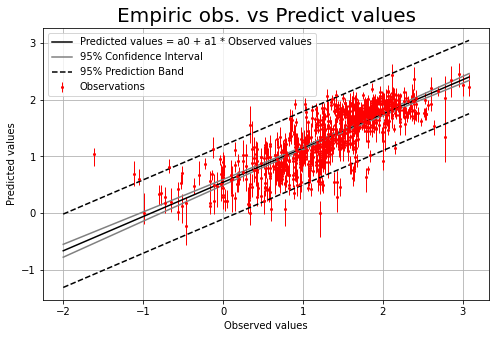

In [22]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(-2, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [23]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [24]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: BA_sq_m_ha: mean - 0.264, median - 0.266, CI - [0.247-0.281]

SHAP-values for: DBH_cm: mean - 0.079, median - 0.079, CI - [0.059-0.099]

SHAP-values for: H_m: mean - 0.139, median - 0.139, CI - [0.118-0.161]

SHAP-values for: Origin_ID: mean - 0.064, median - 0.064, CI - [0.056-0.073]

SHAP-values for: Species_ID: mean - 0.232, median - 0.232, CI - [0.223-0.243]



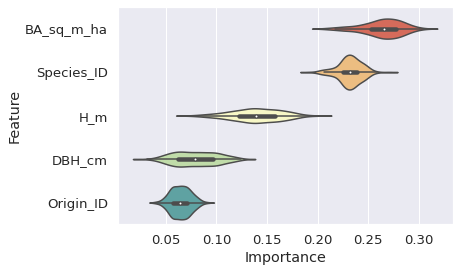

In [25]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['BA_sq_m_ha', 'Species_ID', 'H_m', 'DBH_cm', 'Origin_ID'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [26]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [27]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 54.465, median: 46.0,
 pred. interval (P(0.025)-P(0.975)): 11.975-174.075, 
 conf. interval (p-value=0.95): 22.588-83.731 
***
Aggregate bias statistic: 
 mean: -0.003, median: 0.002,
 pred. interval (P(0.025)-P(0.975)): -0.079-0.066, 
 conf. interval (p-value=0.95): -0.042-0.032 
***
Aggregate RMSE statistic: 
 mean: 0.422, median: 0.422, pred. interval (P(0.025)-P(0.975)): 0.362-0.485, 
 conf. interval (p-value=0.95): 0.392-0.452 
***
Aggregate MSE statistic: 
 mean: 0.179, median: 0.178, pred. interval (P(0.025)-P(0.975)): 0.131-0.235, 
 conf. interval (p-value=0.95): 0.154-0.204 
***
Aggregate R^2 statistic: 
 mean: 0.597, median: 0.598, pred. interval (P(0.025)-P(0.975)): 0.496-0.697, 
 conf. interval (p-value=0.95): 0.549-0.645 
***
Aggregate bias(%) statistic: 
 mean: -0.166, median: 0.123, pred. interval (P(0.025)-P(0.975)): -5.47-5.024, 
 conf. interval (p-value=0.95): -3.0

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

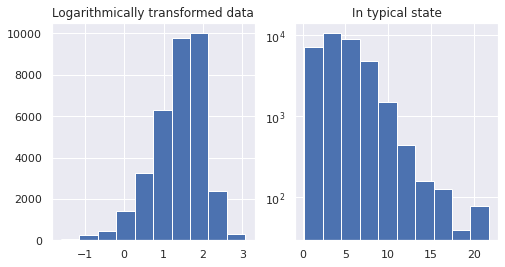

In [28]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [37]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [-1, 0, 1, 2, 3.4])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 5, 10, 15, 20, 25])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

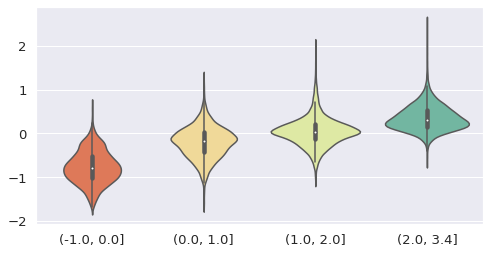

In [38]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [ ]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

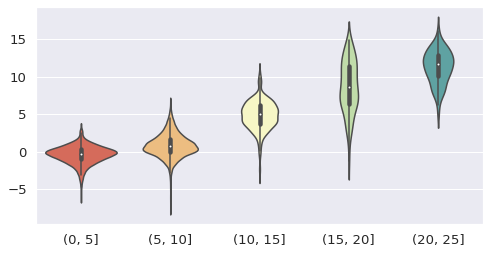

In [32]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

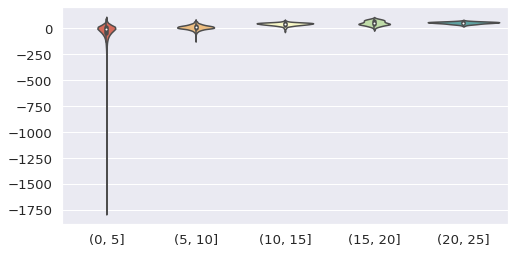

In [33]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [39]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [40]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [41]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:0.86536
[1]	validation_0-rmse:0.73088
[2]	validation_0-rmse:0.62140
[3]	validation_0-rmse:0.54470
[4]	validation_0-rmse:0.49127
[5]	validation_0-rmse:0.45696
[6]	validation_0-rmse:0.42882
[7]	validation_0-rmse:0.41355
[8]	validation_0-rmse:0.39490
[9]	validation_0-rmse:0.38401


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.37339
[11]	validation_0-rmse:0.36800
[12]	validation_0-rmse:0.36120
[13]	validation_0-rmse:0.35601
[14]	validation_0-rmse:0.34739
[15]	validation_0-rmse:0.34374
[16]	validation_0-rmse:0.34124
[17]	validation_0-rmse:0.33899
[18]	validation_0-rmse:0.33534
[19]	validation_0-rmse:0.33078
[20]	validation_0-rmse:0.32696
[21]	validation_0-rmse:0.32410
[22]	validation_0-rmse:0.32242
[23]	validation_0-rmse:0.31665
[24]	validation_0-rmse:0.31511
[25]	validation_0-rmse:0.31335
[26]	validation_0-rmse:0.31193
[27]	validation_0-rmse:0.30847
[28]	validation_0-rmse:0.30764
[29]	validation_0-rmse:0.30644
[30]	validation_0-rmse:0.30283
[31]	validation_0-rmse:0.29986
[32]	validation_0-rmse:0.29724
[33]	validation_0-rmse:0.29547
[34]	validation_0-rmse:0.29270
[35]	validation_0-rmse:0.29110
[36]	validation_0-rmse:0.28813
[37]	validation_0-rmse:0.28675
[38]	validation_0-rmse:0.28469
[39]	validation_0-rmse:0.28307
[40]	validation_0-rmse:0.27905
[41]	validation_0-rmse:0.27831
[42]	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [42]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 195


In [43]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

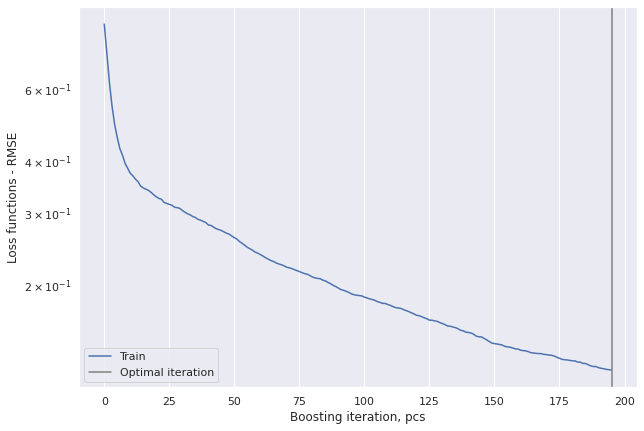

In [44]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [45]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -0.11
RMSE: 0.1
Relative RMSE(%):  9.030
MSE: 0.0
R square: 96.6%


In [46]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.968
Uncertainty
a0: 0.103+/-0.009
a1: 0.924+/-0.006


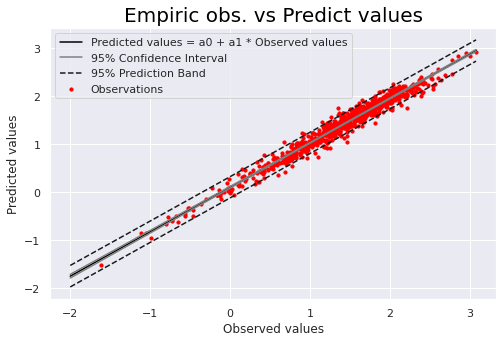

In [47]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-2, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

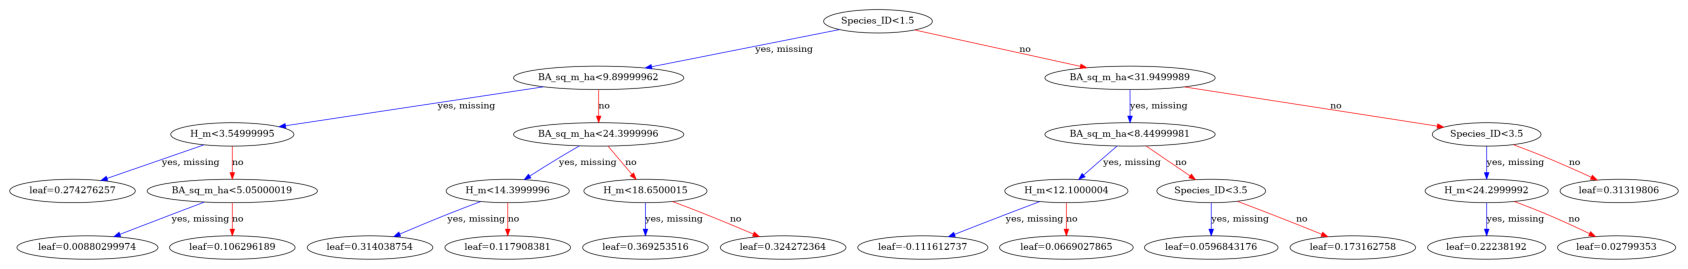

In [50]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

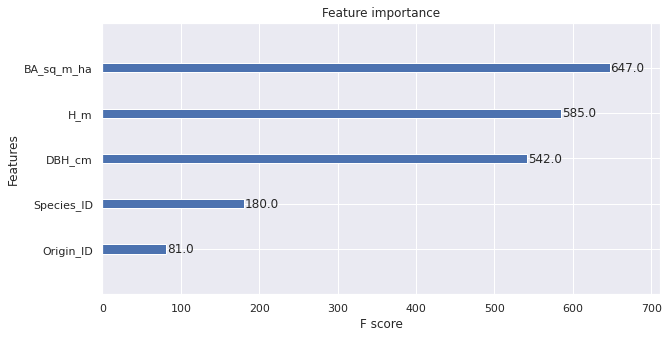

In [52]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

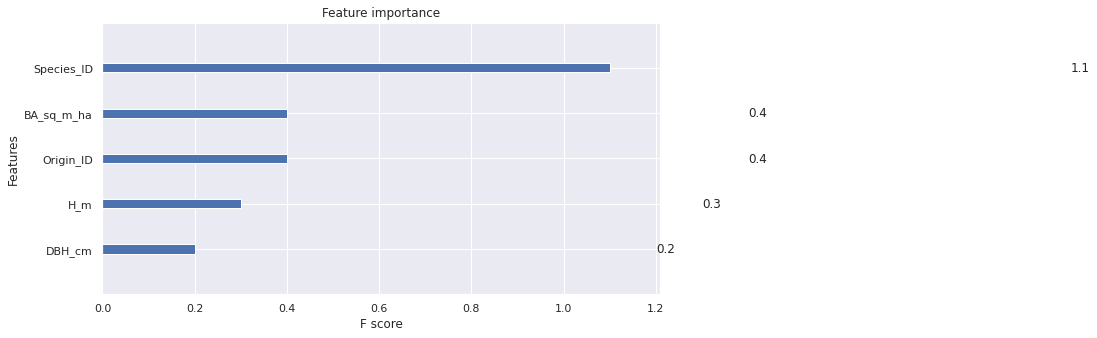

In [53]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

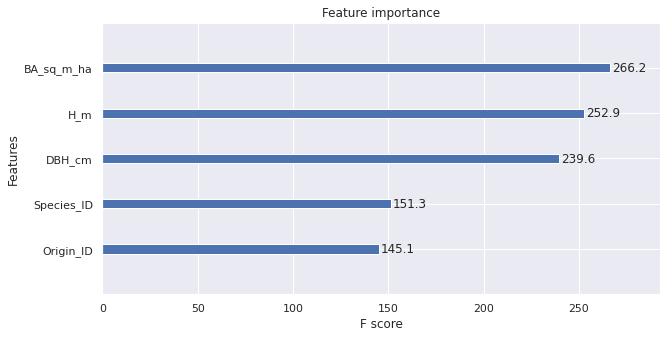

In [54]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [55]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


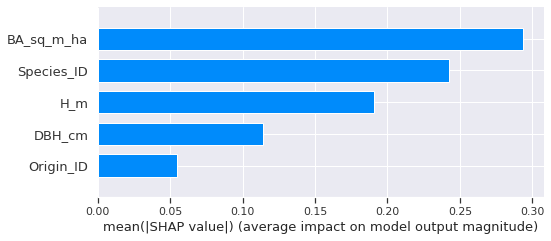

In [56]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

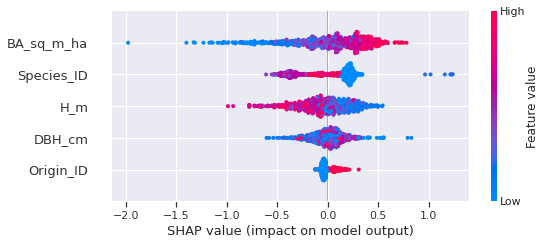

In [57]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

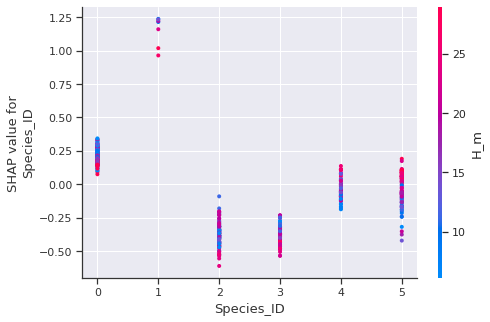

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


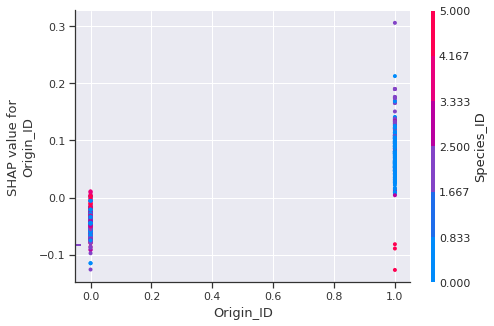

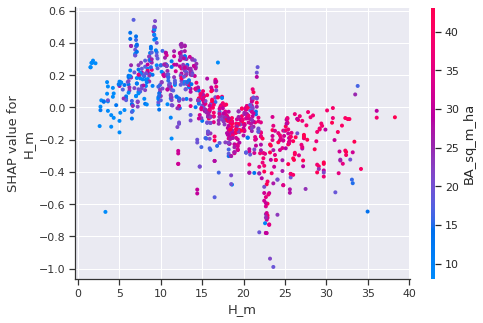

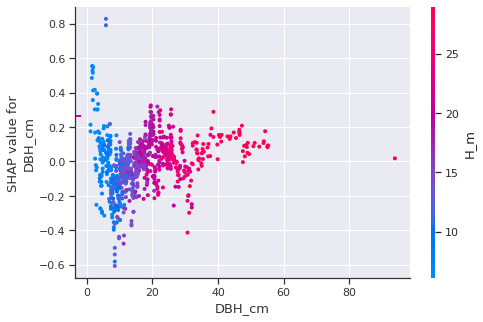

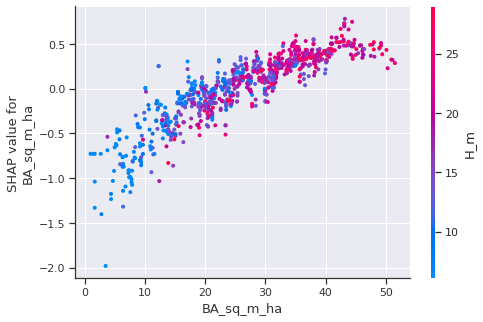

In [58]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [59]:
# Save to JSON
f_xgb_model.save_model("../01_output_data/XGBoost_models/05_LN_M_foliage_other_authors_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../01_output_data/XGBoost_models/05_LN_M_foliage_other_authors_XGB_model.txt")